In [2]:
#Import

import numpy as np
import matplotlib.pyplot as plt 

from biasmodels import * 

#Set current directory
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'xtick.direction': 'out',  
          'ytick.direction': 'out',  
          'xtick.minor.visible': True,  
          'ytick.minor.visible': True,
          'xtick.major.size': 9,
          'xtick.minor.size': 4.5,
          'ytick.major.size': 9,
          'ytick.minor.size': 4.5,
          'lines.linewidth': 1.75}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/danielsb/Documents/GitHub


# Test module

In [2]:
myFluxes = FluxSolver(n_split=2.)
myFluxes_ = FluxSolver(n_split=10/3)

zbins = np.linspace(0.15, 1.95, 19)

zbins

array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15,
       1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95])

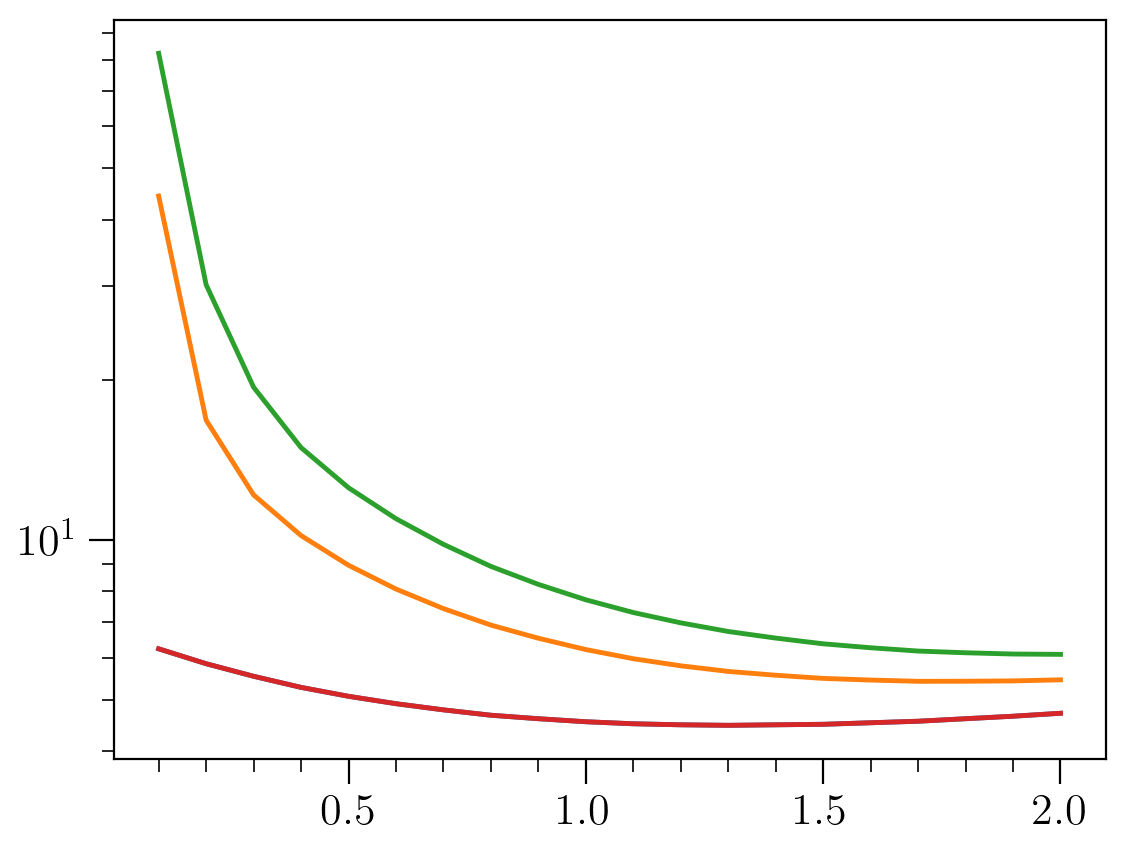

In [3]:
plt.plot(myFluxes.z_data, myFluxes.Sc_data)
plt.plot(myFluxes.z_data, myFluxes.Sc_bright)
plt.plot(myFluxes_.z_data, myFluxes_.Sc_bright)
plt.plot(myFluxes_.z_data, myFluxes_.Sc_data)

plt.yscale('log')

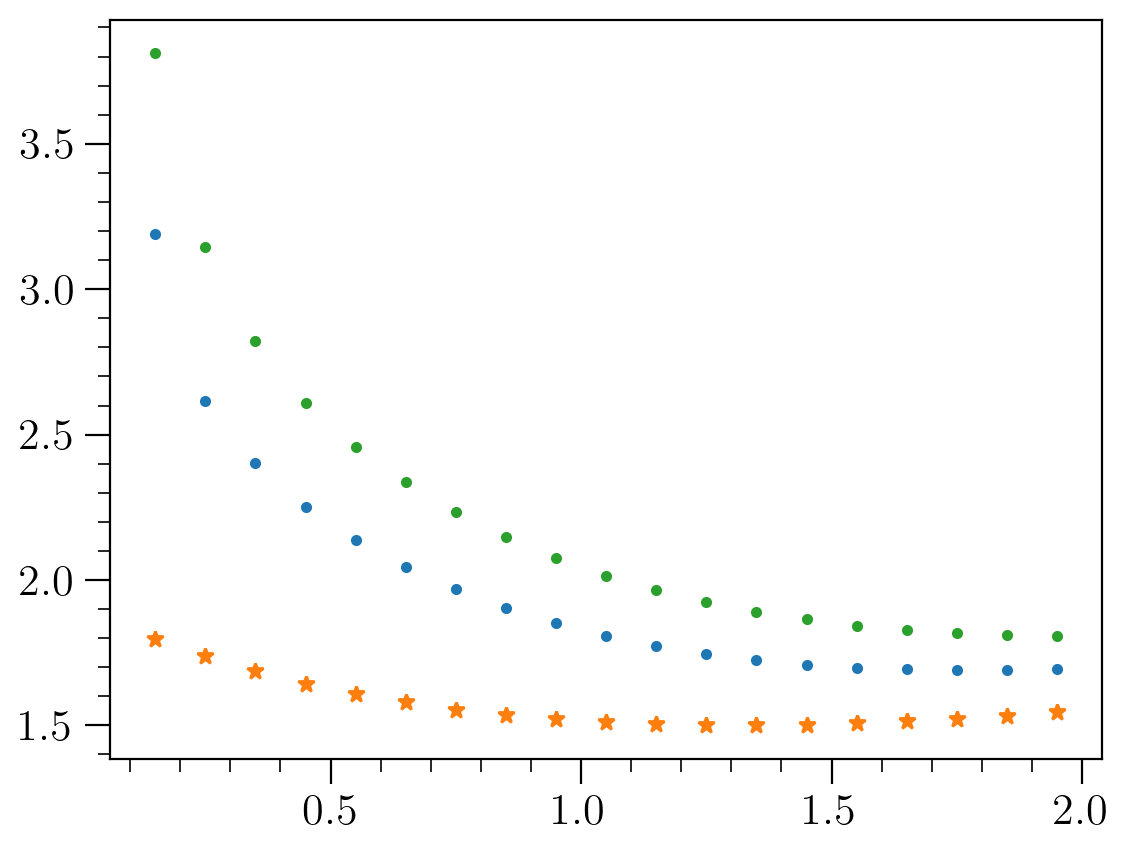

In [4]:
plt.plot(zbins, myFluxes.LogFcut(zbins), '.')
plt.plot(zbins, myFluxes.LogFstar(zbins), '*')
plt.plot(zbins, myFluxes_.LogFcut(zbins), '.')

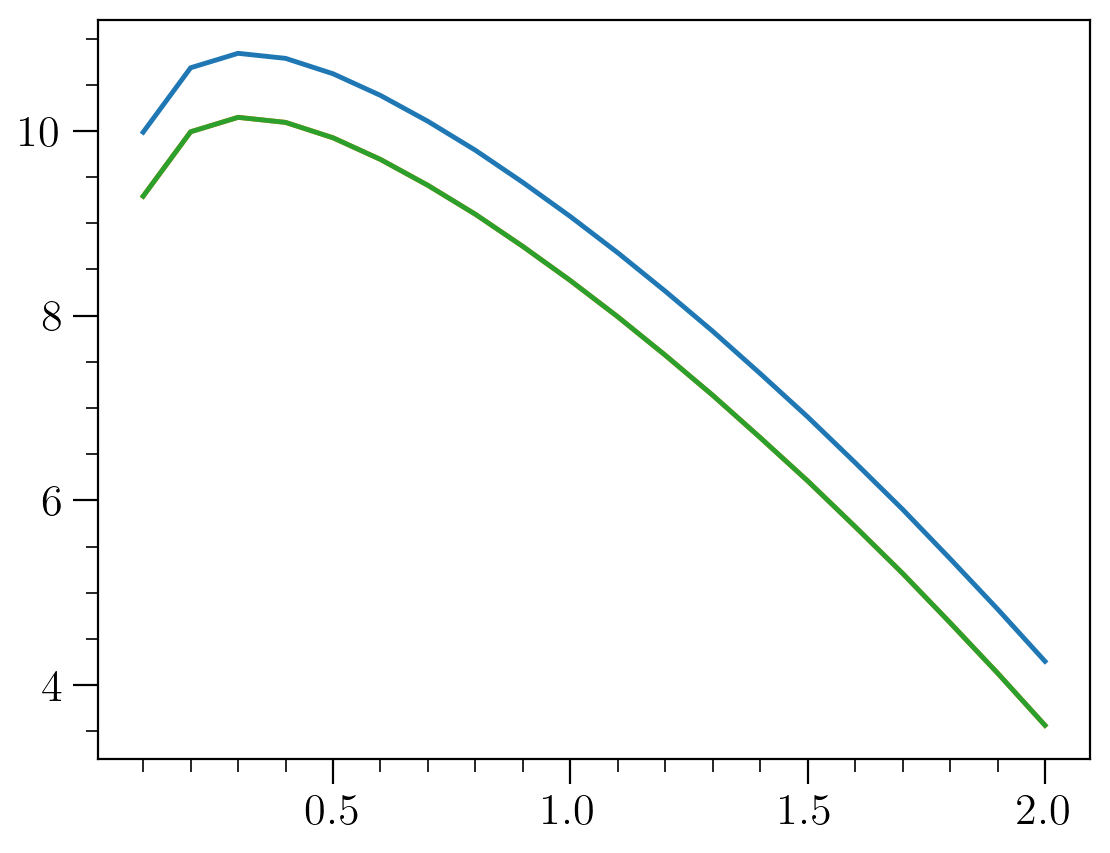

In [5]:
plt.plot(myFluxes.z_data, myFluxes.LogN_z(myFluxes.z_data))
plt.plot(myFluxes.z_data, myFluxes.LogNB_z(myFluxes.z_data))
plt.plot(myFluxes.z_data, myFluxes.LogNF_z(myFluxes.z_data))

In [6]:
myMagBias = MagnificationBias(n_split=2.)

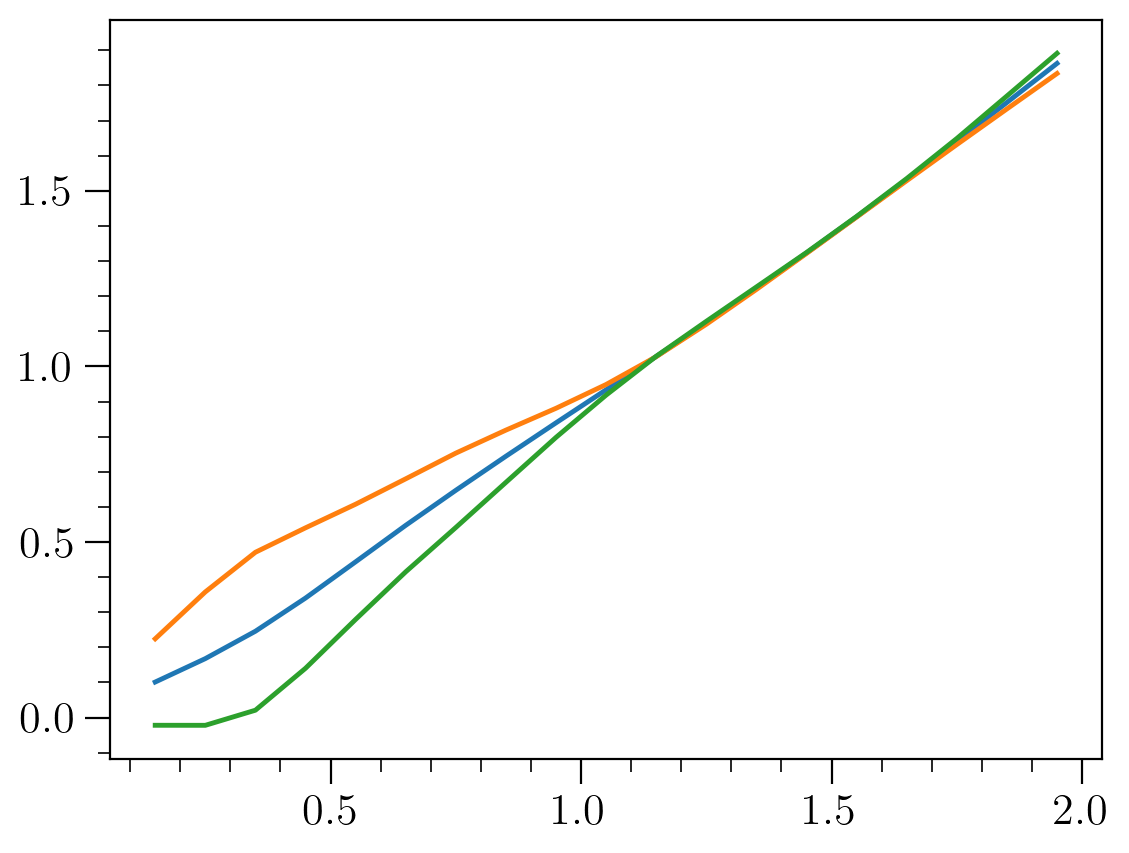

In [7]:
plt.plot(zbins, myMagBias.s_model(zbins))
plt.plot(zbins, myMagBias.s_bright(zbins))
plt.plot(zbins, myMagBias.s_faint(zbins))

In [8]:
myFevol = EvolutionBias(n_split=2.)

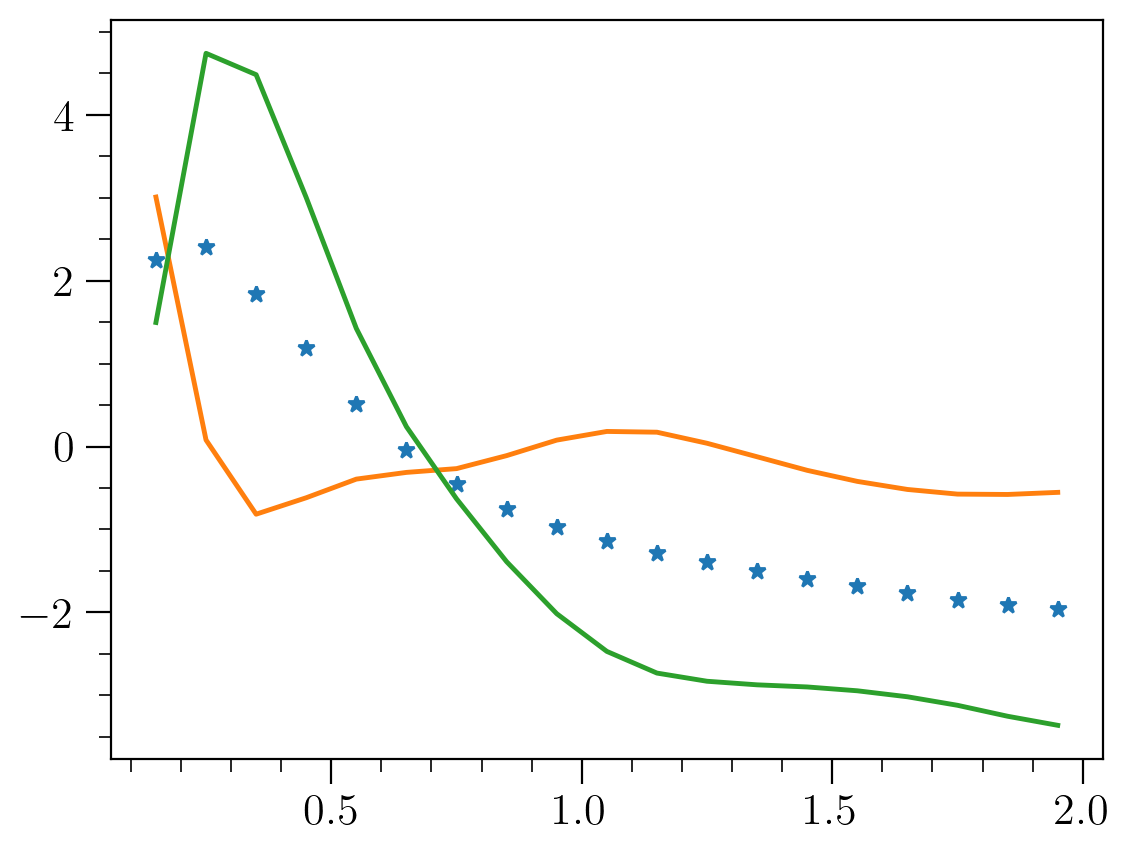

In [9]:
plt.plot(zbins, myFevol.fevol_total(zbins), '*')
plt.plot(zbins, myFevol.fevol_bright(zbins))
plt.plot(zbins, myFevol.fevol_faint(zbins))

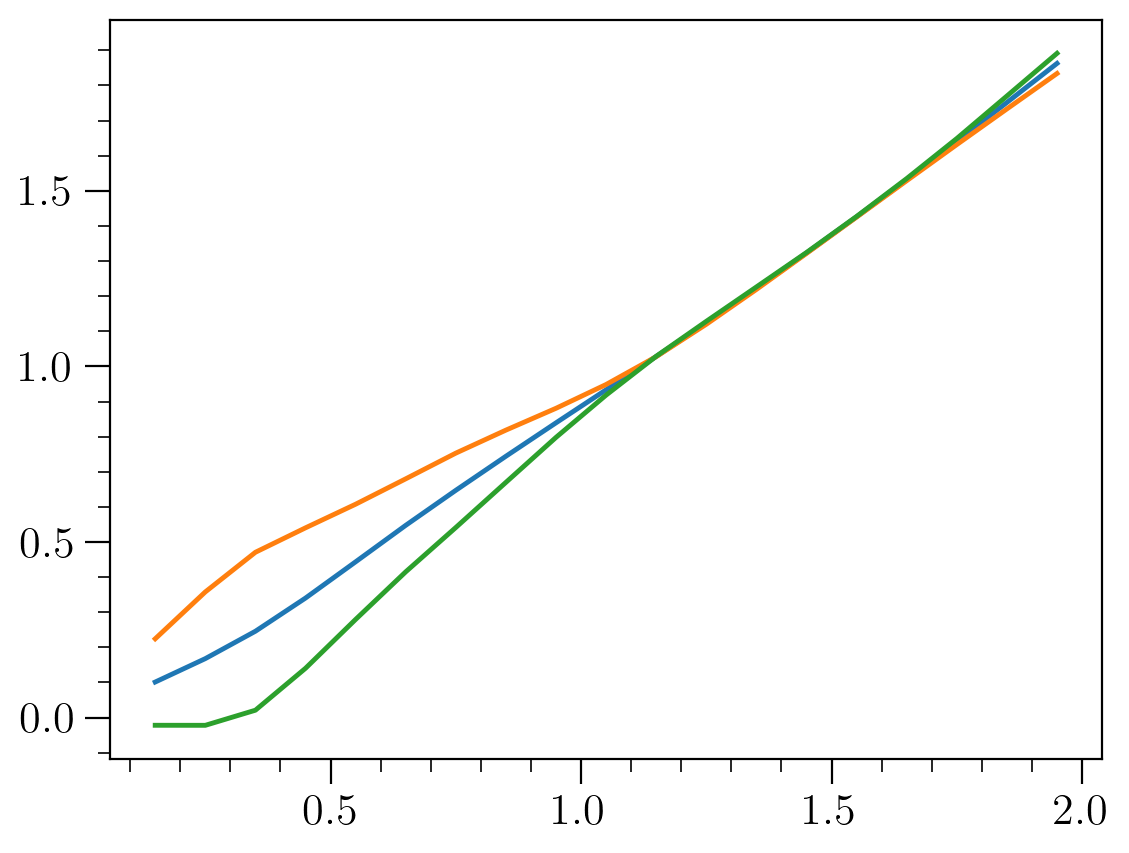

In [10]:
plt.plot(zbins, myFevol.s_model(zbins))
plt.plot(zbins, myFevol.s_bright(zbins))
plt.plot(zbins, myFevol.s_faint(zbins))

# Fitting models

## Magnification bias

In [11]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c):
    return a + b * x + c * x**2

def poly_linlog(x, a, b, c):
    return c + a * x + b * np.log(x)

def poly_linlog2(x, a, b, c, d):
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

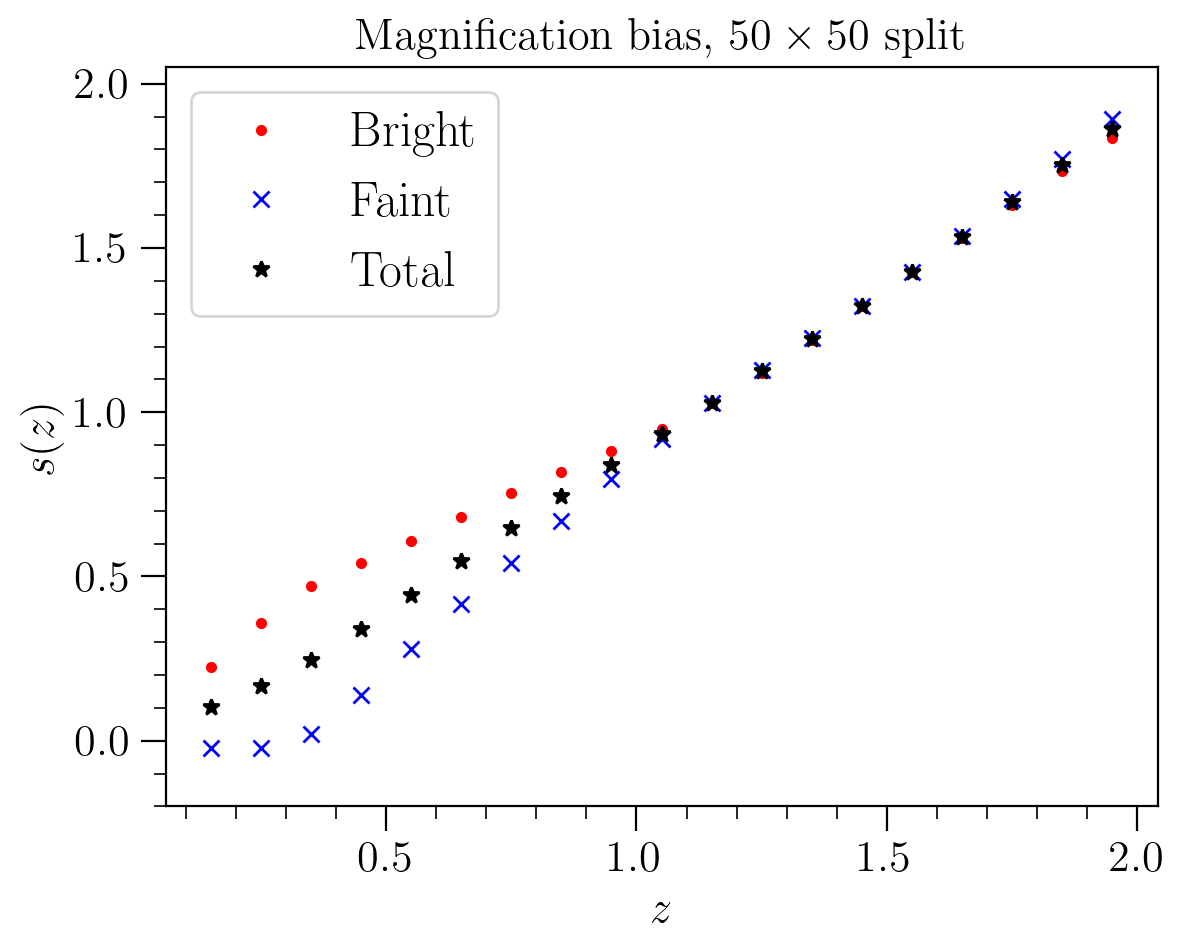

In [12]:
zbins = np.linspace(0.15, 1.95, 19)

myBiases = MagnificationBias(n_split=2.0)

sB = myBiases.s_bright(zbins)
sF = myBiases.s_faint(zbins)
smodel = myBiases.s_model(zbins)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'bx', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Total')

plt.ylim([-0.2,2.05])

plt.xlabel(r'$z$')
plt.ylabel(r'$s(z)$')
plt.legend(loc='best', fontsize = 18);
plt.title(r'Magnification bias, $50\times 50$ split');

plt.savefig('plots/magbias_prediction_50x50.pdf', bbox_inches='tight', format='pdf')


In [13]:
smodel

array([0.10126775, 0.16794581, 0.24591785, 0.34042118, 0.44359672,
       0.54749941, 0.64724732, 0.74425817, 0.83940737, 0.93348225,
       1.02841809, 1.12429914, 1.2228487 , 1.3231631 , 1.42622787,
       1.53202081, 1.64045919, 1.75174659, 1.86291714])

In [14]:
sB, sF

(array([0.22441708, 0.35788955, 0.47077869, 0.54038551, 0.60761985,
        0.67991981, 0.7531311 , 0.81864417, 0.88081715, 0.94857743,
        1.02785004, 1.12008456, 1.21930805, 1.32187692, 1.42534363,
        1.52897325, 1.63180455, 1.73334715, 1.83420913]),
 array([-0.02188158, -0.02199793,  0.021057  ,  0.14045685,  0.27957359,
         0.41507901,  0.54136354,  0.66987218,  0.79799759,  0.91838706,
         1.02898614,  1.12851371,  1.22638936,  1.32444928,  1.42711212,
         1.53506838,  1.64911384,  1.77014603,  1.89162515]))

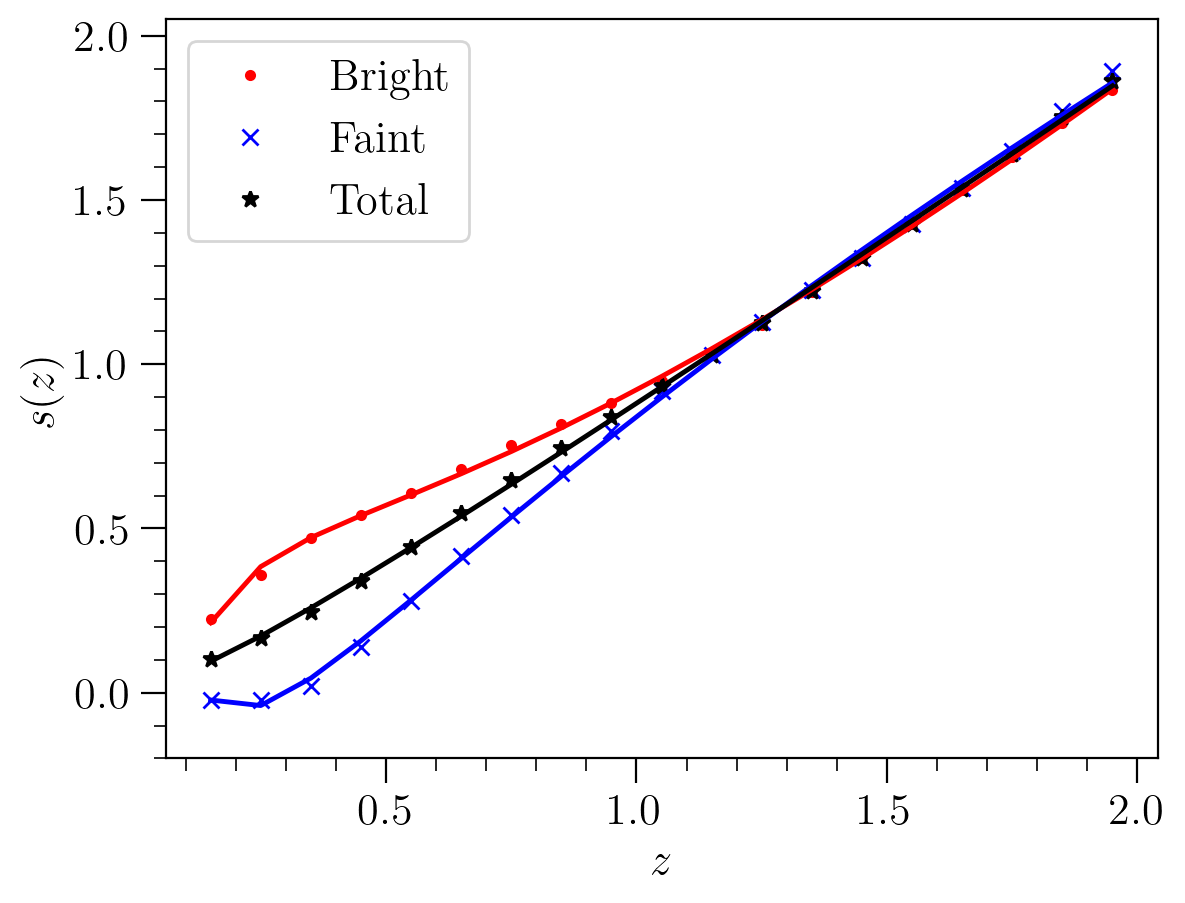

In [15]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, sB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, sF)
popt, pcov = curve_fit(poly_linlog2, zbins, smodel)


sB_predicted = poly_linlog2(np.array(zbins), *poptB)
sF_predicted = poly_linlog2(np.array(zbins), *poptF)
smodel_predictd = poly_linlog2(np.array(zbins), *popt)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'bx', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Total')
plt.plot(zbins, sB_predicted, 'r-')
plt.plot(zbins, sF_predicted, 'b-')
plt.plot(zbins, smodel_predictd, 'k-')

plt.ylim([-0.2,2.05])

plt.xlabel(r'$z$')
plt.ylabel(r'$s(z)$')
#plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);
plt.legend(loc='best')

plt.savefig('plots/magbias_fits_50x50.pdf', format='pdf', bbox_inches='tight')


In [16]:
print(popt), print(poptB), print(poptF)

[-0.19376092  1.07473357 -0.07806244 -0.00558004]
[-0.90110745  1.82300205 -1.01878441 -0.30342325]
[0.51358538 0.32646531 0.86265929 0.29226309]


(None, None, None)

## Evolution bias

In [17]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3

def poly_linlog(x, a0, a, b, c):
    return a0 + a * x + b * np.log(x) + c * np.exp(x)

def poly_linlog2(x, a0, a, b, c, d):
    return a0 + a * x + b * np.log(x) + c * np.exp(x) + d * (np.log(x))**2
    #return a0 + a * x + b * np.log(x) + d * (np.log(x))**2

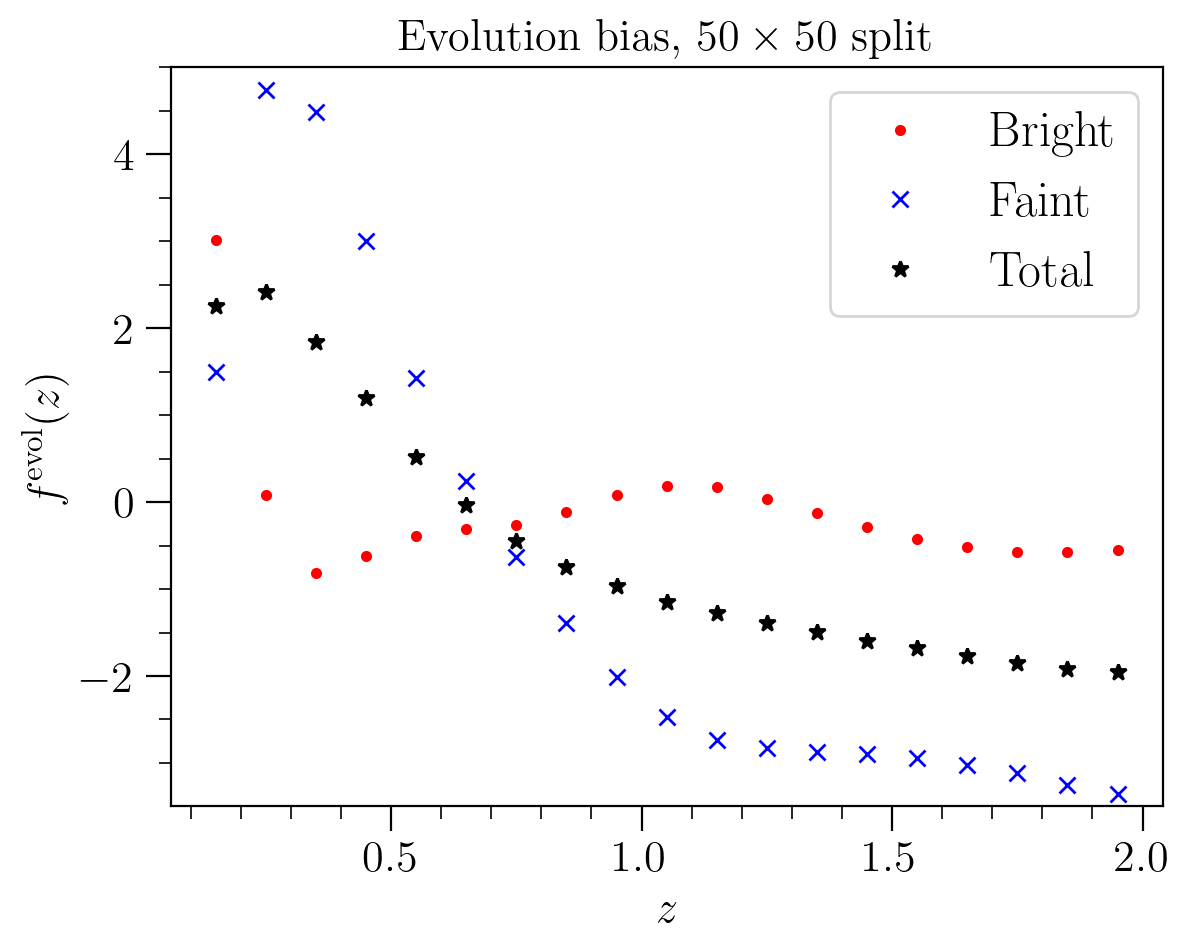

In [18]:
zbins = np.linspace(0.15, 1.95, 19)

myfBiases = EvolutionBias(n_split=2.0)

feB = myfBiases.fevol_bright(zbins)
feF = myfBiases.fevol_faint(zbins)
fe = myfBiases.fevol_total(zbins)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'bx', label='Faint')
plt.plot(zbins, fe, 'k*', label = 'Total')

plt.ylim([-3.5, 5.0])

plt.xlabel(r'$z$')
plt.ylabel(r'$f^\mathrm{evol}(z)$')
plt.legend(loc='best', fontsize = 18);
plt.title(r'Evolution bias, $50\times 50$ split');

plt.savefig('plots/fevol_prediction_50x50.pdf', bbox_inches='tight', format='pdf')

In [19]:
feB, feF

(array([ 3.00956639,  0.07976877, -0.81552783, -0.6173486 , -0.39242556,
        -0.31155665, -0.26595514, -0.1091582 ,  0.07791229,  0.18253319,
         0.17336397,  0.03980399, -0.12308668, -0.28681099, -0.41997146,
        -0.51728093, -0.57341237, -0.57764042, -0.55234844]),
 array([ 1.49669846,  4.74321837,  4.48561914,  3.00325909,  1.42466759,
         0.23953114, -0.63019961, -1.38888192, -2.01572455, -2.47043394,
        -2.7319998 , -2.83059041, -2.87381247, -2.89939059, -2.94565432,
        -3.01777315, -3.12068025, -3.25274921, -3.36209773]))

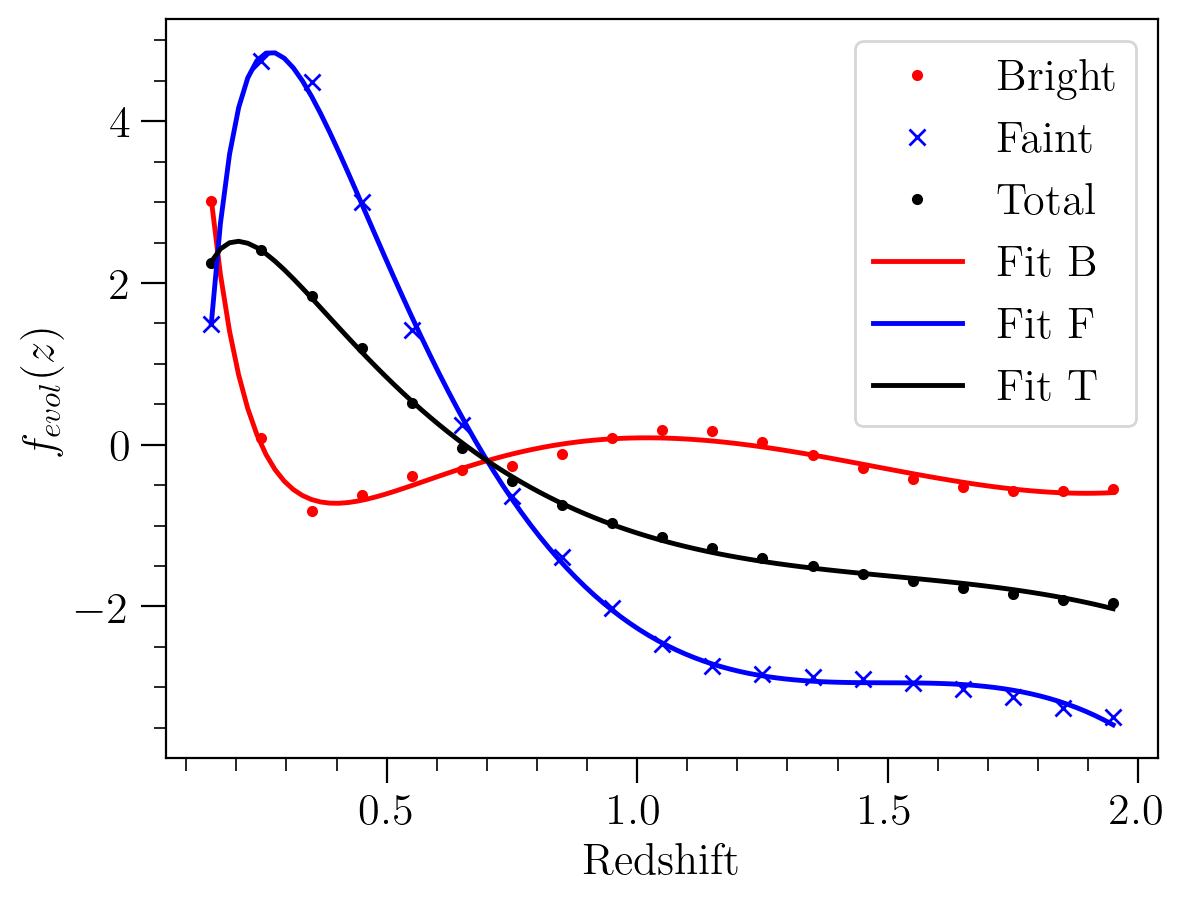

In [20]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, feB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, feF)
popt, pcov = curve_fit(poly_linlog2, zbins, fe)

zbins_ = np.linspace(0.15, 1.95, 100)


feB_predicted = poly_linlog2(np.array(zbins_), *poptB)
feF_predicted = poly_linlog2(np.array(zbins_), *poptF)
fe_predicted = poly_linlog2(np.array(zbins_), *popt)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'bx', label='Faint')
plt.plot(zbins, fe, 'k.', label='Total')
plt.plot(zbins_, feB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, feF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, fe_predicted, 'k-', label='Fit T')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$f_{evol}(z)$')
#plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);
plt.legend(loc='best')

#plt.savefig('plots/fig_evolbias_1-2.pdf', format='pdf', bbox_inches='tight')

In [21]:
print(popt), print(poptB), print(poptF)

[-16.73322399  18.88860736 -17.61467342  -1.19486859  -4.40827881]
[ 25.56132354 -30.05542071  25.57464177   1.68434314   7.92907755]
[-59.02777091  67.8326346  -60.80398802  -4.07408023 -16.74563503]


(None, None, None)

## Number density

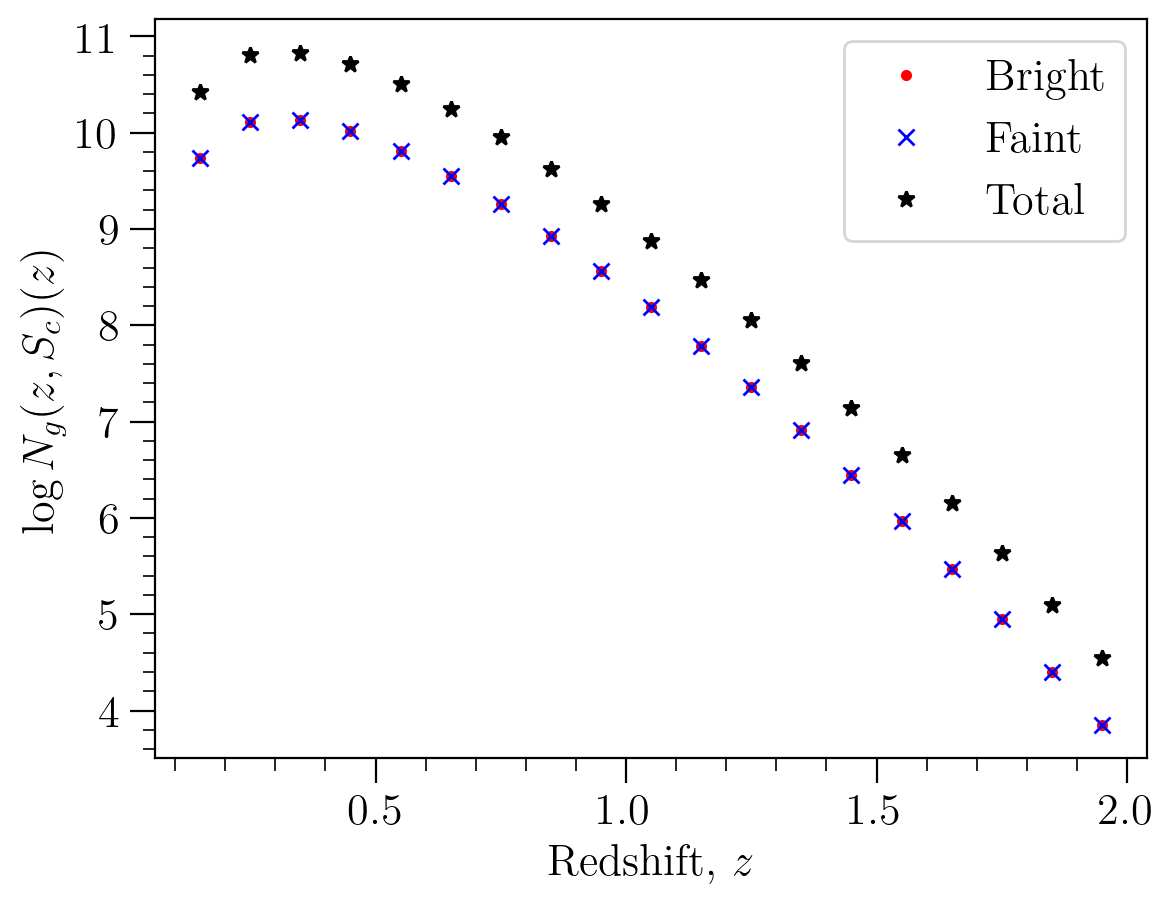

In [22]:
zbins = np.linspace(0.15, 1.95, 19)

LogN_bright = myFluxes.LogNB_z(zbins)
LogN_faint = myFluxes.LogNF_z(zbins)
LogN = myFluxes.LogN_z(zbins)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'bx', label='Faint')
plt.plot(zbins, LogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

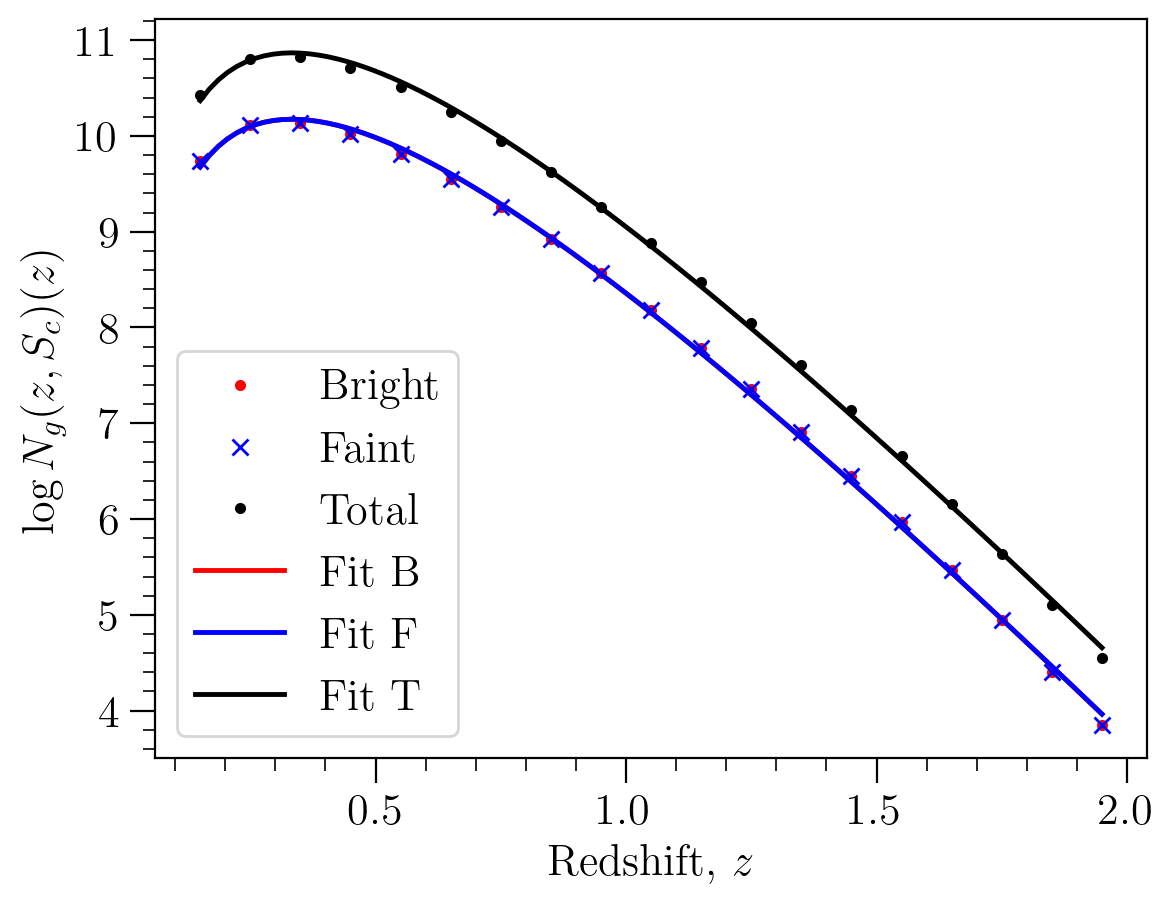

In [23]:
def poly_linlog(x, a, b, c):
    return a + b * x + c * np.log(x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, LogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, LogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, LogN)

zbins_ = np.linspace(0.15, 1.95, 100)


LogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
LogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
LogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'bx', label='Faint')
plt.plot(zbins, LogN, 'k.', label='Total')
plt.plot(zbins_, LogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, LogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, LogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
#plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);
plt.legend(loc='best')

#plt.savefig('plots/fig_numberevol_1-2.pdf', format='pdf')

In [24]:
print(popt), print(poptB), print(poptF)

[15.09117829 -6.04009428  2.01187384]
[14.3980311  -6.04009427  2.01187382]
[14.39803111 -6.04009428  2.01187384]


(None, None, None)

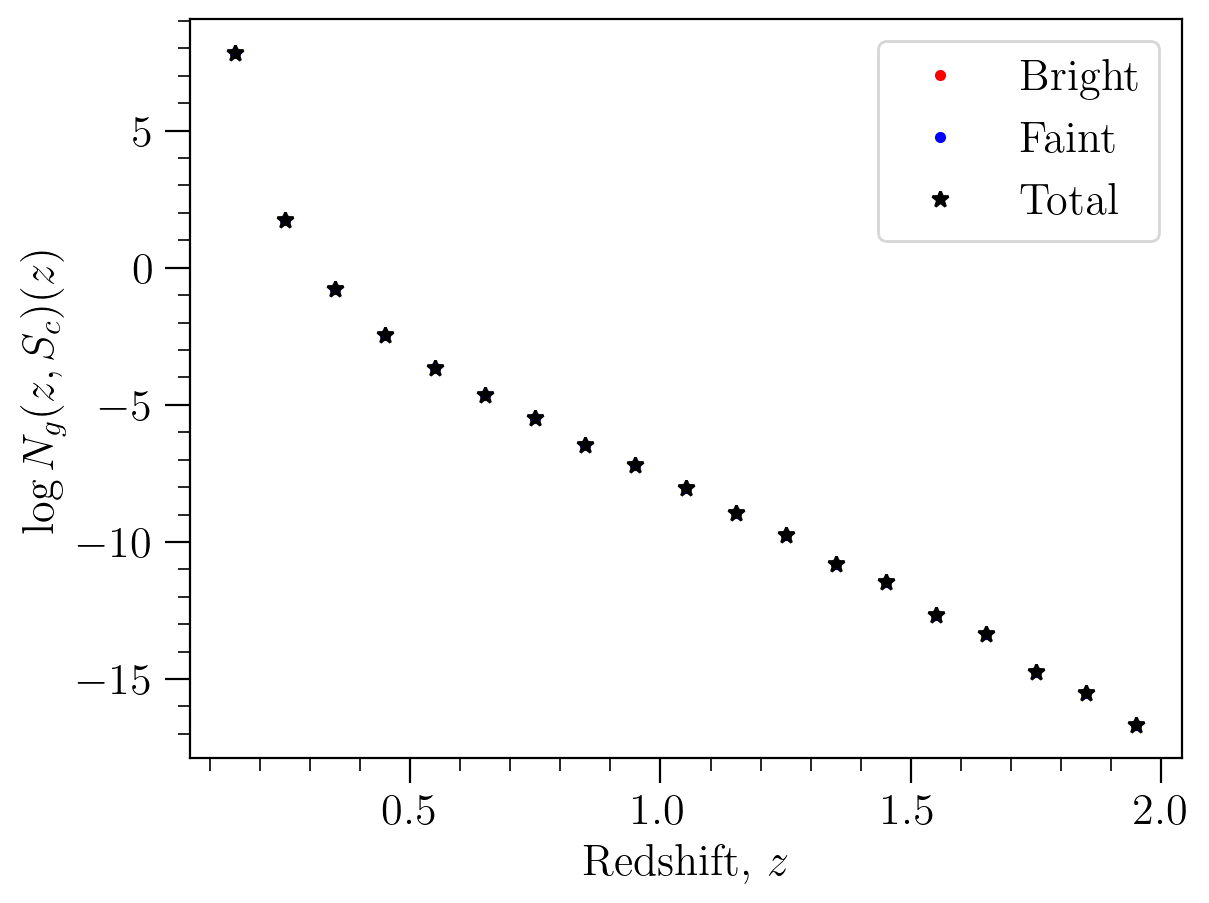

In [25]:
zbins = np.linspace(0.15, 1.95, 19)

dLogN_bright = myFluxes.dLogNB(zbins)
dLogN_faint = myFluxes.dLogNF(zbins)
dLogN = myFluxes.dLogN(zbins)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

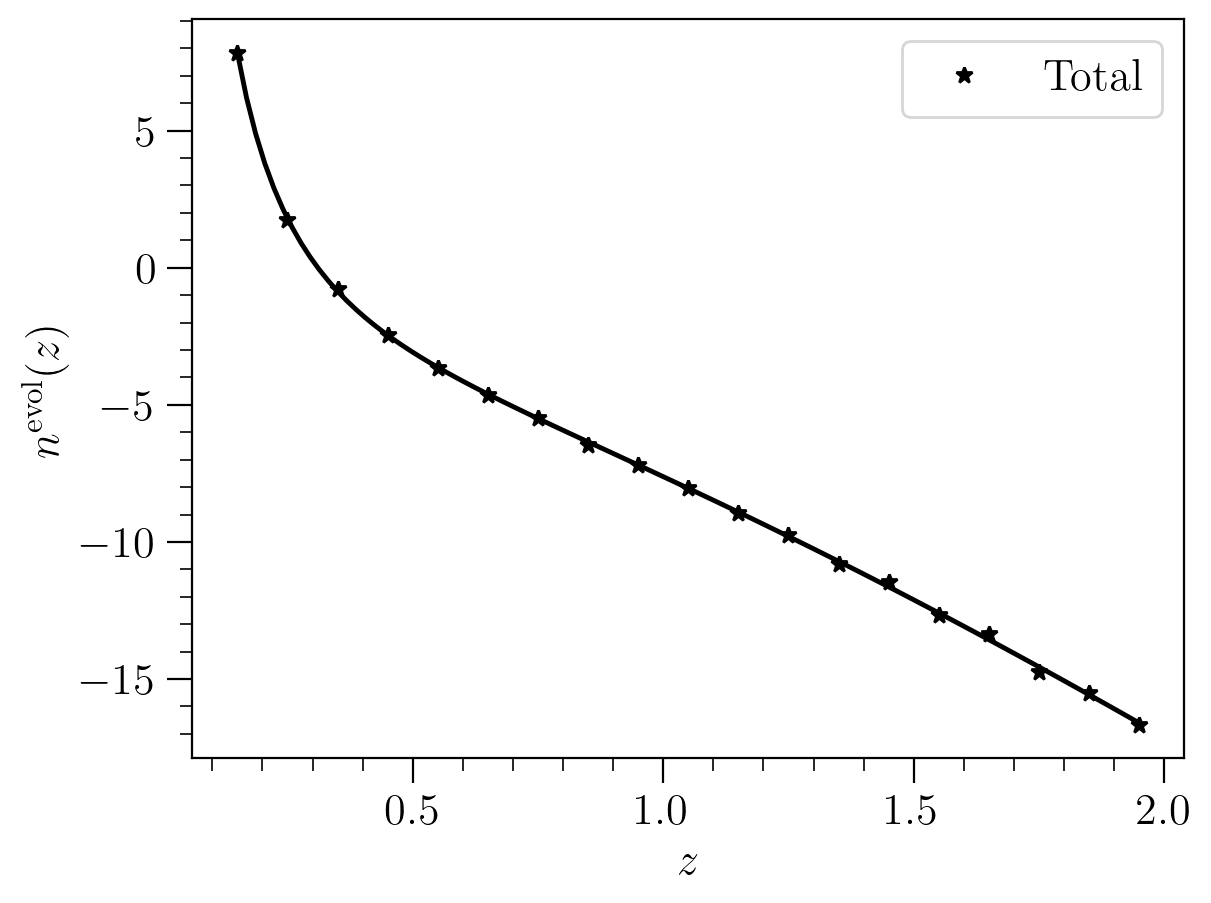

In [26]:
def poly_linlog(x, a, b, c, d):
    return a + b * x + c * (1/x) + d * np.exp(-x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, dLogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, dLogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, dLogN)

zbins_ = np.linspace(0.15, 1.95, 100)


dLogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
dLogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
dLogN_predicted = poly_linlog(np.array(zbins_), *popt)

#plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
#plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k*', label='Total')
#plt.plot(zbins_, dLogNB_predicted, 'r-', label='Fit B')
#plt.plot(zbins_, dLogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, dLogN_predicted, 'k-')

plt.xlabel(r'$z$')
plt.ylabel(r'$n^{\mathrm{evol}}(z)$')
#plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);
plt.legend(loc = 'best')

plt.savefig('plots/nevol_fit_50x50.pdf', format='pdf', bbox_inches='tight')

In [27]:
print(popt), print(poptB), print(poptF)

[  7.94599872 -12.03752386   2.29927261 -15.83887364]
[  7.94599879 -12.03752389   2.29927261 -15.83887374]
[  7.9459987  -12.03752385   2.29927261 -15.8388736 ]


(None, None, None)

In [28]:
pcov

array([[ 0.38992531, -0.17746371,  0.02525267, -0.59857259],
       [-0.17746371,  0.08155191, -0.0110888 ,  0.26950797],
       [ 0.02525267, -0.0110888 ,  0.0027264 , -0.044107  ],
       [-0.59857259,  0.26950797, -0.044107  ,  0.94925232]])

In [29]:
# Calculate R-squared
residuals = dLogN - poly_linlog(zbins, *popt)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((dLogN - np.mean(dLogN))**2)
r_squared = 1 - (ss_residuals / ss_total)

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

# Calculate AIC and BIC
n = len(dLogN)
k = len(popt)
aic = n * np.log(ss_residuals / n) + 2 * k
bic = n * np.log(ss_residuals / n) + k * np.log(n)

print("R-squared:", r_squared)
print("RMSE:", rmse)
print("AIC:", aic)
print("BIC:", bic)

R-squared: 0.9997613534739476
RMSE: 0.09480115707689908
AIC: -81.52699924503875
BIC: -77.74924332837298


### Fitting models

$$ a + b\,x + c/x + d\,\log{x}$$

- R-squared: 0.9996199058272313
- RMSE: 0.11964145484109232
- AIC: -72.68372363524726
- BIC: -68.90596771858151

$$ a + b\,x + c/x + d\,e^{x}$$

- R-squared: 0.9995457600648447
- RMSE: 0.13079126380131775
- AIC: -69.29780004257823
- BIC: -65.52004412591248

$$ a + b\,x + c/x + d\,e^{-x}$$

- R-squared: 0.9997613534739476
- RMSE: 0.09480115707689908
- AIC: -81.52699924503875
- BIC: -77.74924332837298


# Splitting the populations

We analyse the effect that a different population split makes in the different contributions. 

Recall that $n_{split} > 1.0$  (strictly). In the previous examples, we took $n_{split} = 2.0$ which means $N_B = N_F = N_g / 2$. Also, $n_{split}$ is defined such that it determines the fraction of **BRIGHT** galaxies with respect to the total, being

$$ N_B = \frac{N_g}{n_{split}}$$

## Case with $n_{split} = 10/7$

In this case, bright galaxies are $70\%$ of the total. 

### Magnification bias

In [108]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c):
    return a + b * x + c * x**2

def poly_linlog(x, a, b, c):
    return c + a * x + b * np.log(x)

def poly_linlog2(x, a, b, c, d):
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

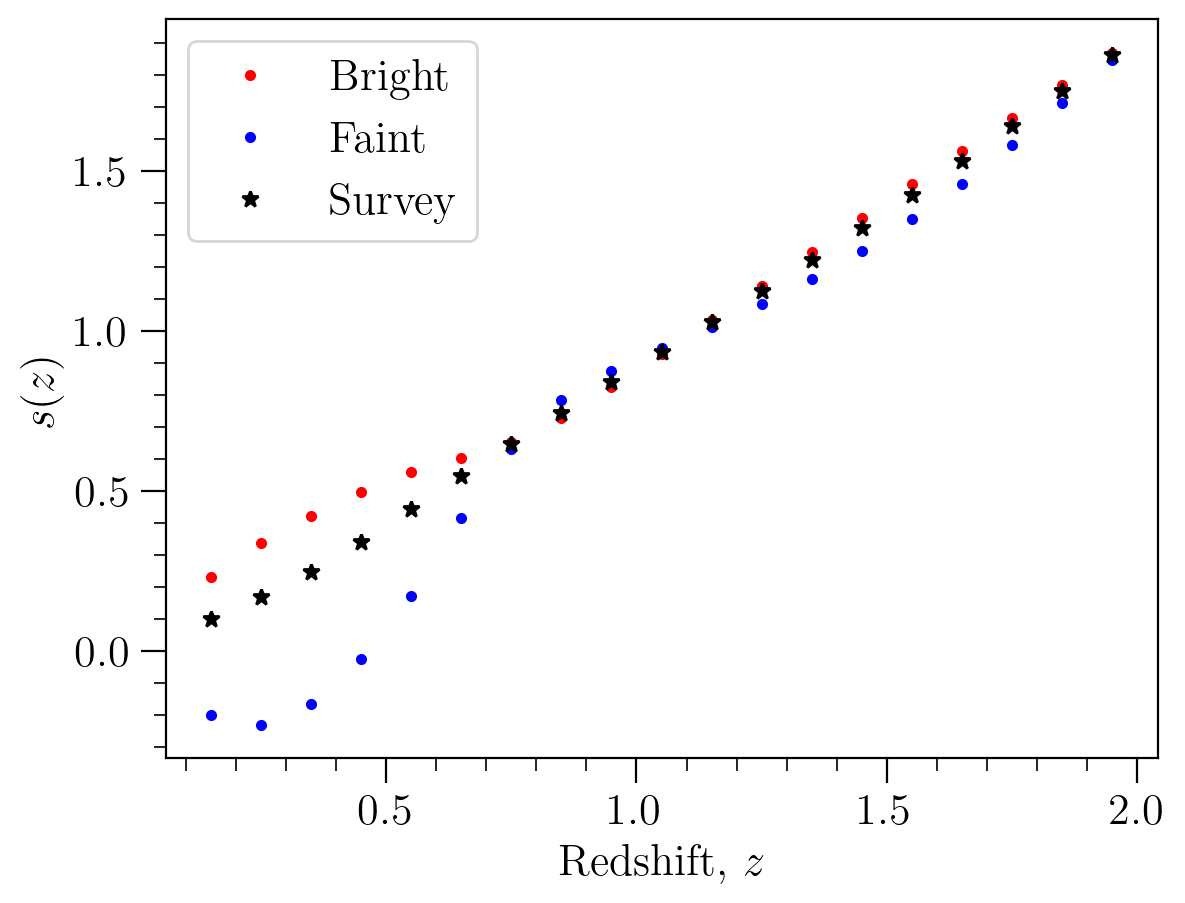

In [109]:
zbins = np.linspace(0.15, 1.95, 19)

myBiases = MagnificationBias(n_split=10/7)

sB = myBiases.s_bright(zbins)
sF = myBiases.s_faint(zbins)
smodel = myBiases.s_model(zbins)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$s(z)$')
plt.legend();


In [110]:
smodel, sB, sF

(array([0.10126775, 0.16794581, 0.24591785, 0.34042118, 0.44359672,
        0.54749941, 0.64724732, 0.74425817, 0.83940737, 0.93348225,
        1.02841809, 1.12429914, 1.2228487 , 1.3231631 , 1.42622787,
        1.53202081, 1.64045919, 1.75174659, 1.86291714]),
 array([0.23092495, 0.33891824, 0.42179897, 0.49729887, 0.55974349,
        0.60437846, 0.65341957, 0.72717735, 0.82383668, 0.92773427,
        1.03454971, 1.14181863, 1.24827165, 1.35407972, 1.45894099,
        1.56296605, 1.6661472 , 1.7681241 , 1.86971955]),
 array([-0.20126572, -0.23098986, -0.16447144, -0.02562678,  0.17258759,
         0.41478163,  0.63284539,  0.78411342,  0.87573898,  0.9468942 ,
         1.01411097,  1.08342032,  1.16352849,  1.25102431,  1.34989727,
         1.45981526,  1.58052052,  1.7135324 ,  1.84704487]))

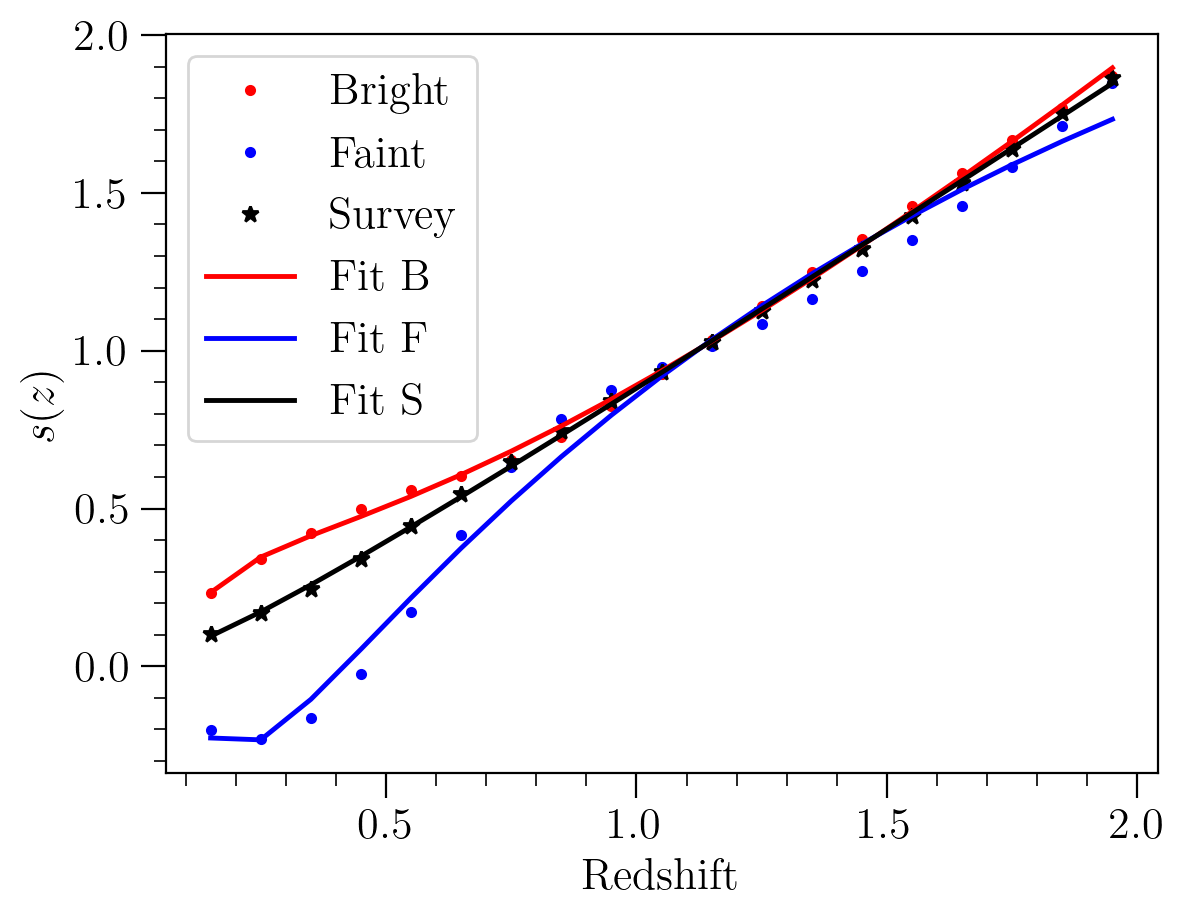

In [111]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, sB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, sF)
popt, pcov = curve_fit(poly_linlog2, zbins, smodel)


sB_predicted = poly_linlog2(np.array(zbins), *poptB)
sF_predicted = poly_linlog2(np.array(zbins), *poptF)
smodel_predictd = poly_linlog2(np.array(zbins), *popt)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')
plt.plot(zbins, sB_predicted, 'r-', label='Fit B')
plt.plot(zbins, sF_predicted, 'b-', label='Fit F')
plt.plot(zbins, smodel_predictd, 'k-', label='Fit S')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$s(z)$')
#plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);
plt.legend(loc='best')


plt.savefig('plots/fig_magbias_7-10.pdf', format='pdf', bbox_inches='tight')


In [112]:
print(popt), print(poptB), print(poptF)

[-0.19376092  1.07473357 -0.07806244 -0.00558004]
[-0.93372809  1.82432411 -0.92835543 -0.24102824]
[ 1.53282885 -0.67431075  1.90595423  0.543799  ]


(None, None, None)

### Evolution bias

In [113]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3

def poly_linlog(x, a0, a, b, c):
    return a0 + a * x + b * np.log(x) + c * np.exp(x)

def poly_linlog2(x, a0, a, b, c, d):
    return a0 + a * x + b * np.log(x) + c * np.exp(x) + d * (np.log(x))**2
    #return a0 + a * x + b * np.log(x) + d * (np.log(x))**2

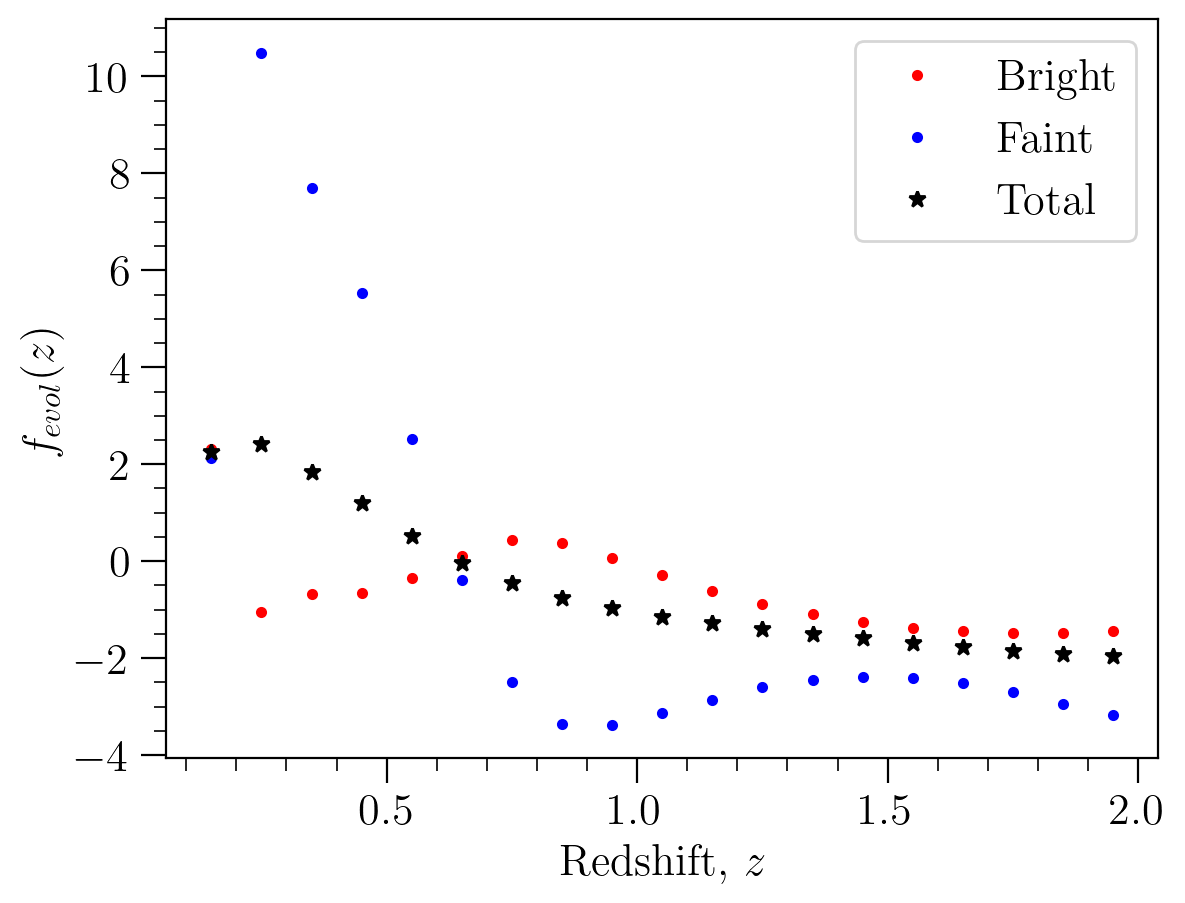

In [114]:
zbins = np.linspace(0.15, 1.95, 19)

myfBiases = EvolutionBias(n_split=10/7)

feB = myfBiases.fevol_bright(zbins)
feF = myfBiases.fevol_faint(zbins)
fe = myfBiases.fevol_total(zbins)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$f_{evol}(z)$')
plt.legend();

In [115]:
feB, feF

(array([ 2.30477429, -1.04874158, -0.67796927, -0.66294643, -0.34399838,
         0.11218844,  0.42949383,  0.37159525,  0.06233465, -0.28992148,
        -0.60506652, -0.87795657, -1.08670387, -1.2532168 , -1.37215364,
        -1.44791514, -1.48462593, -1.47256817, -1.4354558 ]),
 array([ 2.13263474, 10.48537558,  7.69874714,  5.52339249,  2.52306627,
        -0.38181554, -2.49574352, -3.36378913, -3.37513461, -3.13668448,
        -2.85257116, -2.60274536, -2.45918956, -2.38616343, -2.40768448,
        -2.51328814, -2.69269385, -2.94799033, -3.17468009]))

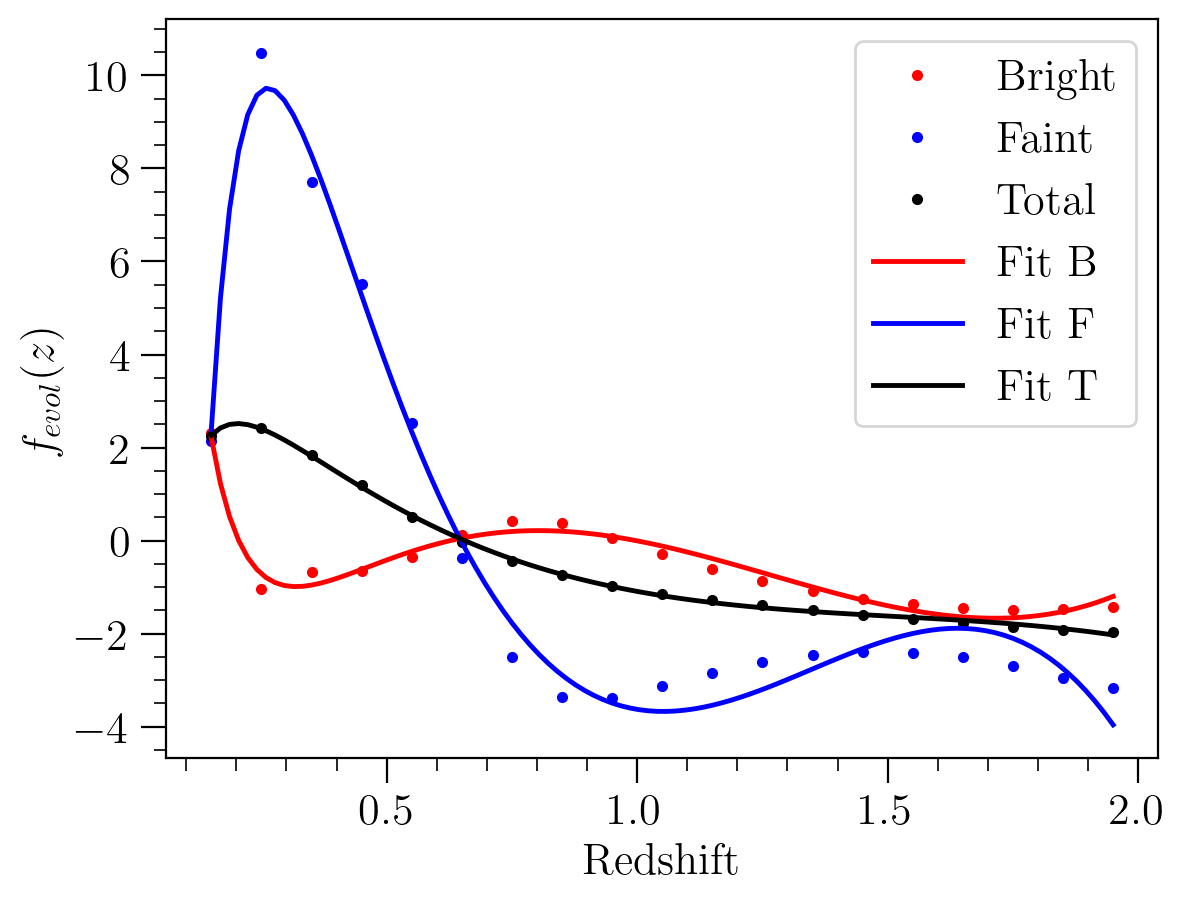

In [116]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, feB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, feF)
popt, pcov = curve_fit(poly_linlog2, zbins, fe)

zbins_ = np.linspace(0.15, 1.95, 100)


feB_predicted = poly_linlog2(np.array(zbins_), *poptB)
feF_predicted = poly_linlog2(np.array(zbins_), *poptF)
fe_predicted = poly_linlog2(np.array(zbins_), *popt)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k.', label='Total')
plt.plot(zbins_, feB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, feF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, fe_predicted, 'k-', label='Fit T')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$f_{evol}(z)$')
#plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);
plt.legend(loc='best')

plt.savefig('plots/fig_evolbias_7-10.pdf', format='pdf', bbox_inches='tight')

In [117]:
print(popt), print(poptB), print(poptF)

[-16.73322399  18.88860736 -17.61467342  -1.19486859  -4.40827881]
[ 46.52607547 -58.98479753  44.46548767   4.58123123  12.10486638]
[-164.33824866  200.59320882 -162.46837562  -14.67243386  -42.93894916]


(None, None, None)

### Number density

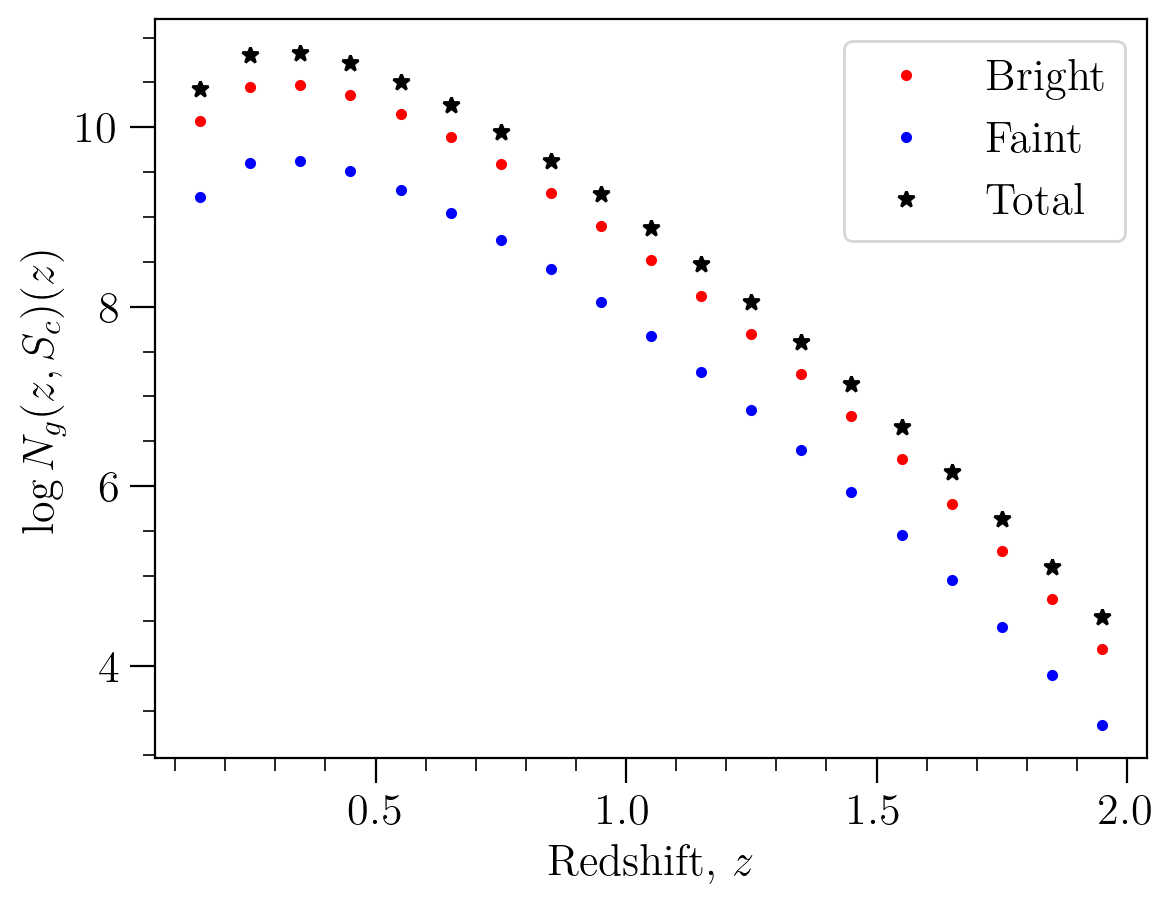

In [118]:
myFluxes = FluxSolver(n_split=10/7)

zbins = np.linspace(0.15, 1.95, 19)

LogN_bright = myFluxes.LogNB_z(zbins)
LogN_faint = myFluxes.LogNF_z(zbins)
LogN = myFluxes.LogN_z(zbins)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

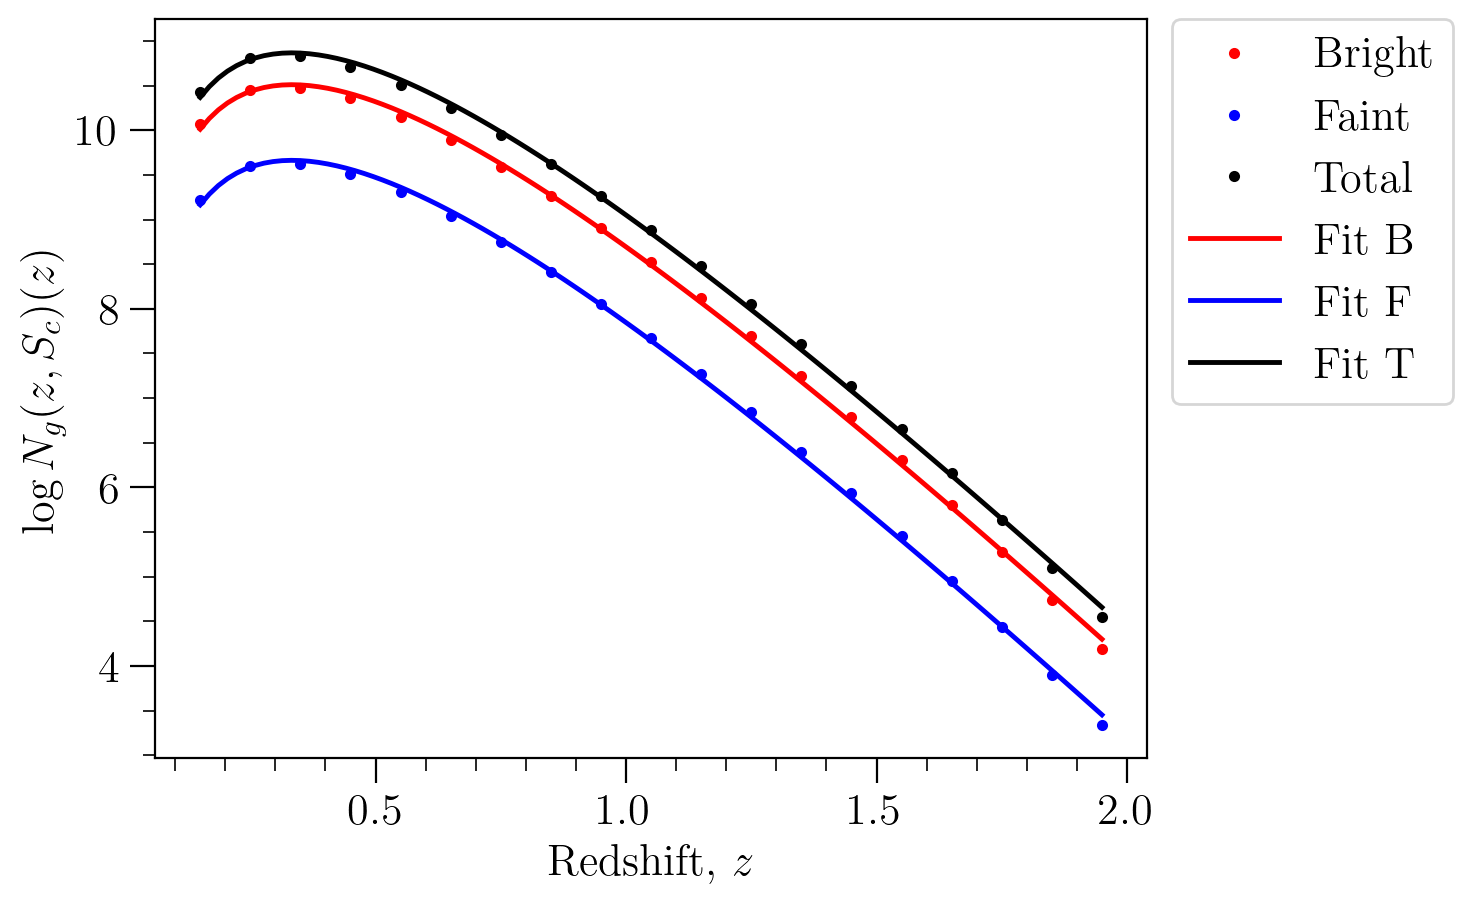

In [119]:
def poly_linlog(x, a, b, c):
    return a + b * x + c * np.log(x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, LogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, LogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, LogN)

zbins_ = np.linspace(0.15, 1.95, 100)


LogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
LogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
LogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k.', label='Total')
plt.plot(zbins_, LogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, LogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, LogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [120]:
print(popt), print(poptB), print(poptF)

[15.09117829 -6.04009428  2.01187384]
[14.73450334 -6.04009427  2.01187383]
[13.88720548 -6.04009427  2.01187383]


(None, None, None)

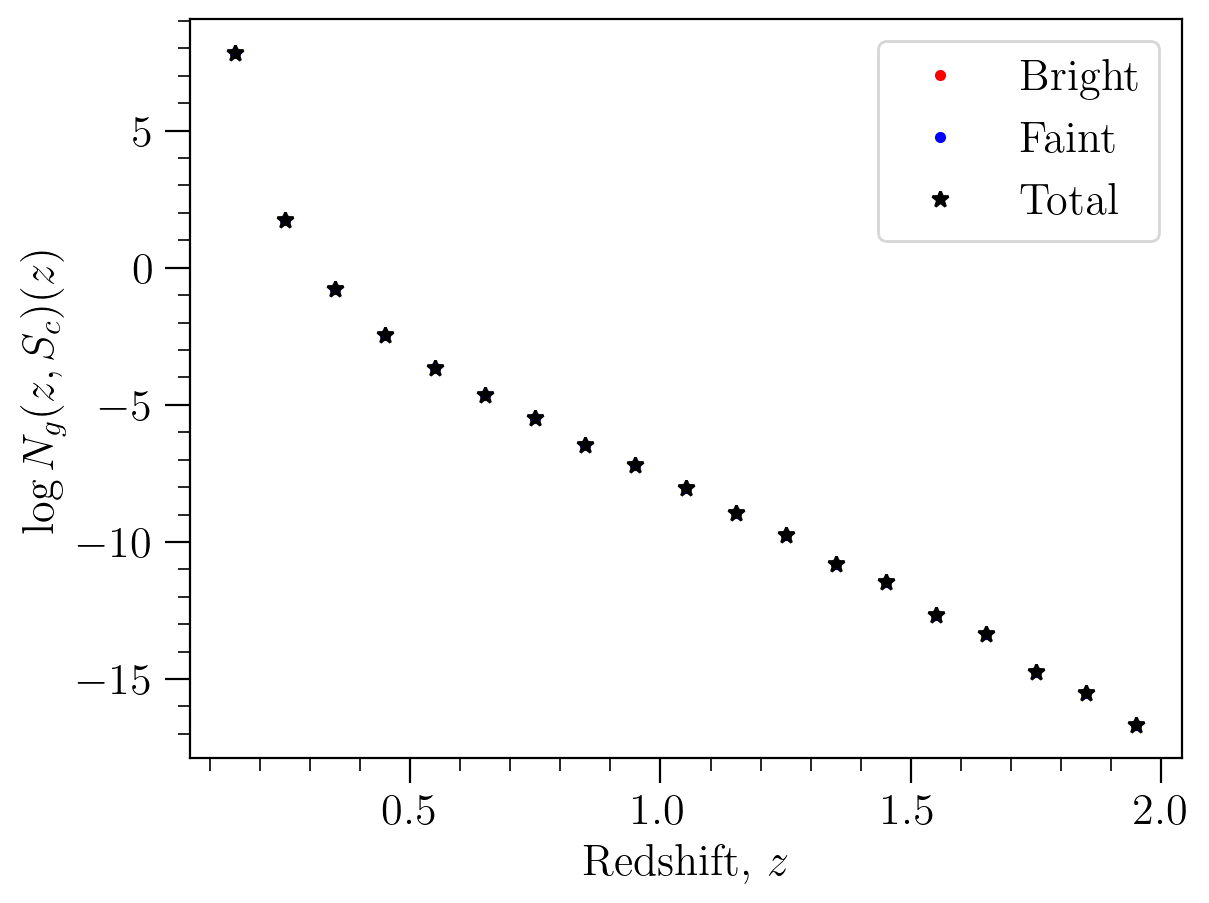

In [121]:
zbins = np.linspace(0.15, 1.95, 19)

dLogN_bright = myFluxes.dLogNB(zbins)
dLogN_faint = myFluxes.dLogNF(zbins)
dLogN = myFluxes.dLogN(zbins)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

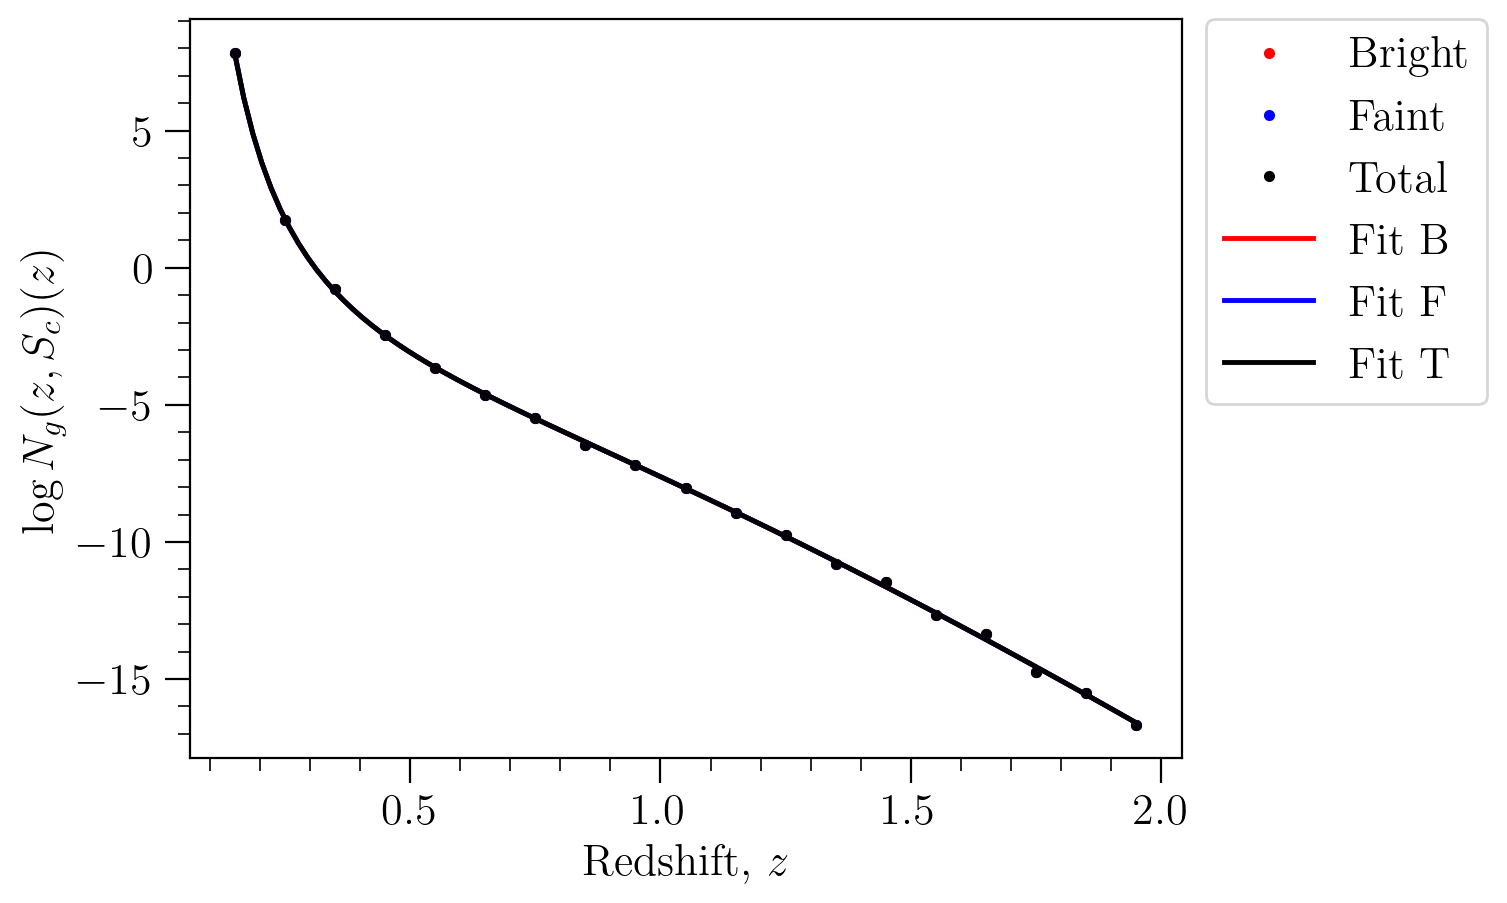

In [122]:
def poly_linlog(x, a, b, c, d):
    return a + b * x + c * (1/x) + d * np.exp(-x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, dLogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, dLogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, dLogN)

zbins_ = np.linspace(0.15, 1.95, 100)


dLogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
dLogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
dLogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k.', label='Total')
plt.plot(zbins_, dLogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, dLogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, dLogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [123]:
print(popt), print(poptB), print(poptF)

[  7.94599872 -12.03752386   2.29927261 -15.83887364]
[  7.94599891 -12.03752395   2.29927262 -15.83887394]
[  7.94599875 -12.03752387   2.29927261 -15.83887368]


(None, None, None)

In [124]:
pcov

array([[ 0.38992531, -0.17746371,  0.02525267, -0.59857259],
       [-0.17746371,  0.08155191, -0.0110888 ,  0.26950797],
       [ 0.02525267, -0.0110888 ,  0.0027264 , -0.044107  ],
       [-0.59857259,  0.26950797, -0.044107  ,  0.94925232]])

## Case with $n_{split} = 10/3$

In this case, bright galaxies are $30\%$ of the total. 

### Magnification bias

In [53]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c):
    return a + b * x + c * x**2

def poly_linlog(x, a, b, c):
    return c + a * x + b * np.log(x)

def poly_linlog2(x, a, b, c, d):
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

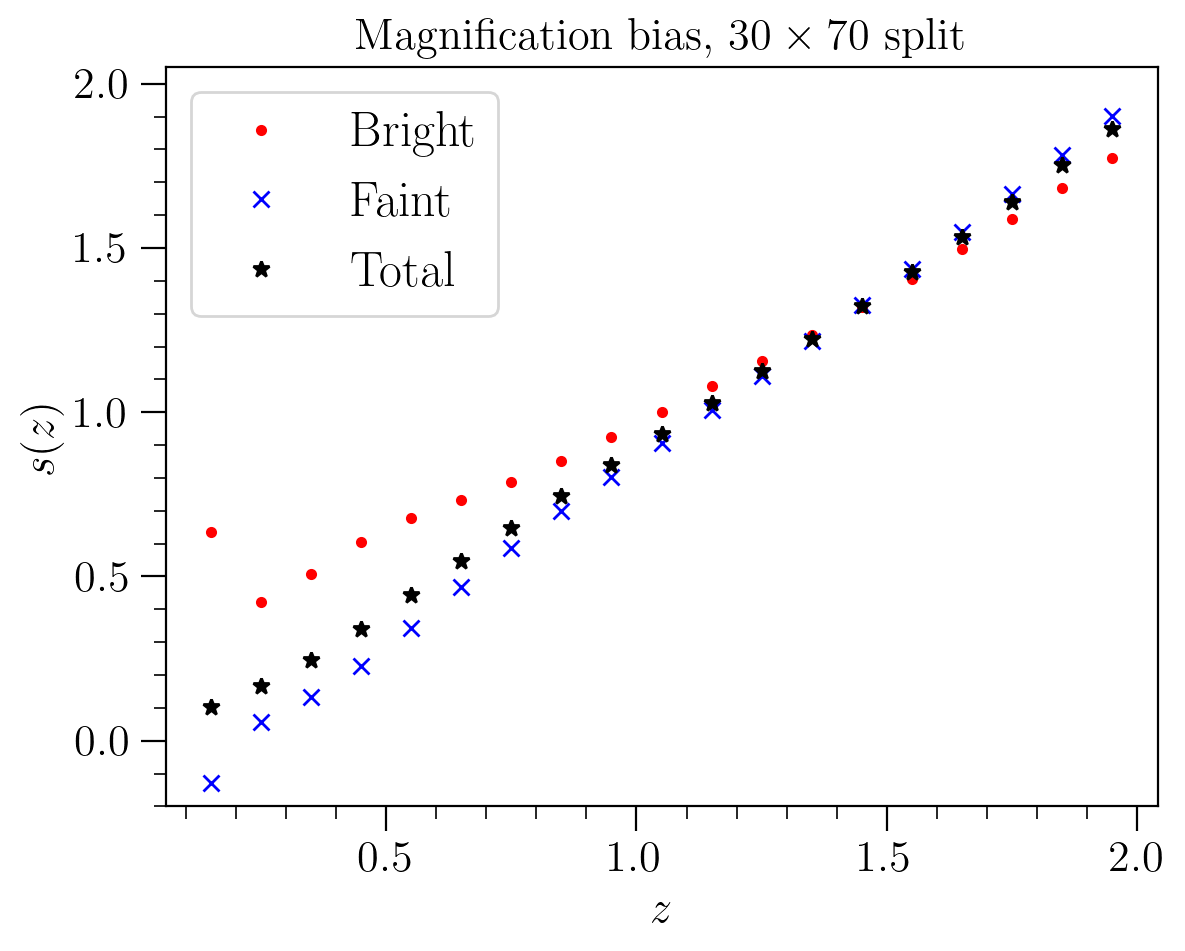

In [54]:
zbins = np.linspace(0.15, 1.95, 19)

myBiases = MagnificationBias(n_split=10/3)

sB = myBiases.s_bright(zbins)
sF = myBiases.s_faint(zbins)
smodel = myBiases.s_model(zbins)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'bx', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Total')

plt.ylim([-0.2,2.05])

plt.xlabel(r'$z$')
plt.ylabel(r'$s(z)$')
plt.legend(loc='best', fontsize = 18);
plt.title(r'Magnification bias, $30\times 70$ split');

plt.savefig('plots/magbias_prediction_30x70.pdf', bbox_inches='tight', format='pdf')

In [55]:
smodel, sB, sF

(array([0.10126775, 0.16794581, 0.24591785, 0.34042118, 0.44359672,
        0.54749941, 0.64724732, 0.74425817, 0.83940737, 0.93348225,
        1.02841809, 1.12429914, 1.2228487 , 1.3231631 , 1.42622787,
        1.53202081, 1.64045919, 1.75174659, 1.86291714]),
 array([0.63665525, 0.42367658, 0.50881959, 0.60522562, 0.67778459,
        0.73405886, 0.78698648, 0.85067709, 0.92313678, 1.00034598,
        1.07877756, 1.15621473, 1.23564294, 1.31904933, 1.40610202,
        1.49646092, 1.58855833, 1.68141612, 1.77443344]),
 array([-0.12818404,  0.05834691,  0.13324567,  0.22693356,  0.3432305 ,
         0.46754536,  0.58735911,  0.69865006,  0.80352334,  0.90482636,
         1.00683546,  1.11062102,  1.21736546,  1.32492614,  1.43485324,
         1.54726077,  1.66270242,  1.78188822,  1.90083873]))

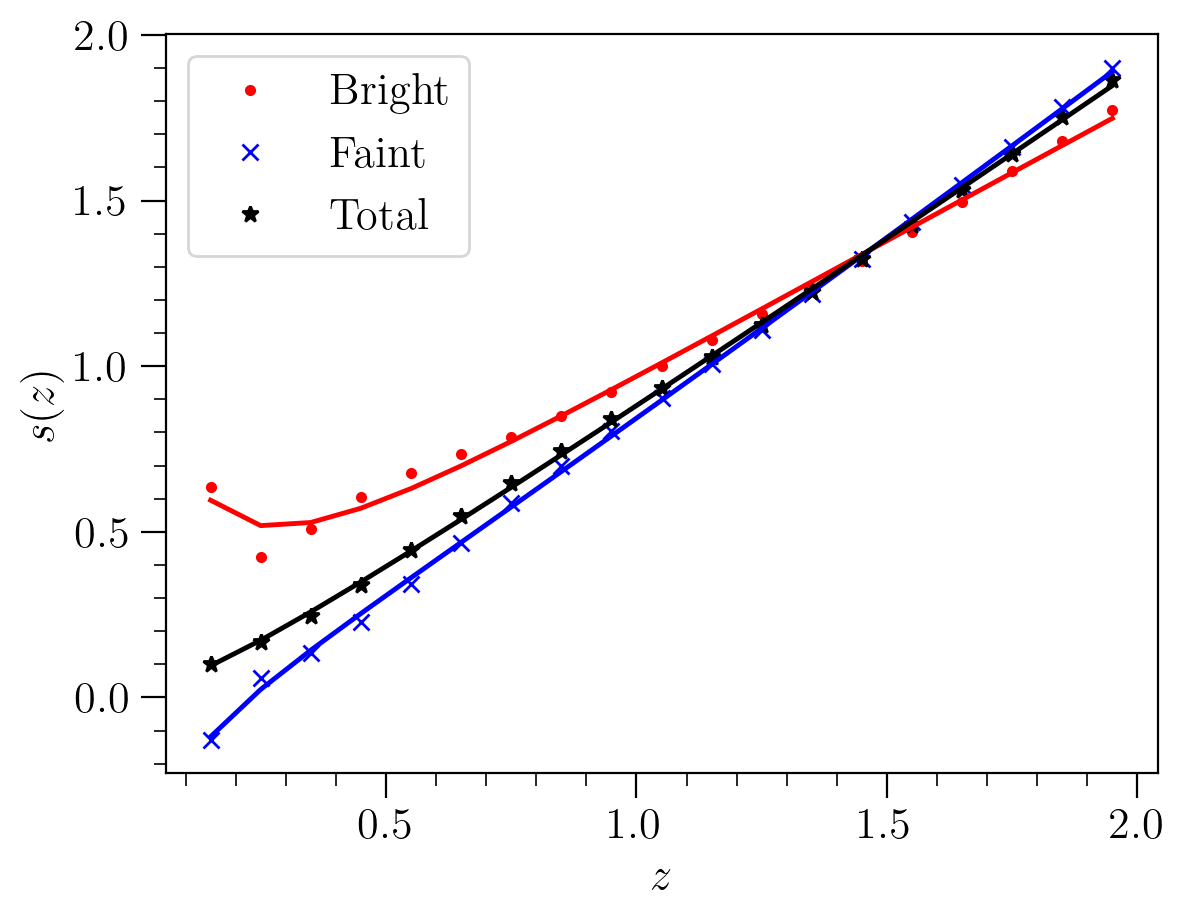

In [57]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, sB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, sF)
popt, pcov = curve_fit(poly_linlog2, zbins, smodel)


sB_predicted = poly_linlog2(np.array(zbins), *poptB)
sF_predicted = poly_linlog2(np.array(zbins), *poptF)
smodel_predictd = poly_linlog2(np.array(zbins), *popt)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'bx', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Total')
plt.plot(zbins, sB_predicted, 'r-')
plt.plot(zbins, sF_predicted, 'b-')
plt.plot(zbins, smodel_predictd, 'k-')

plt.xlabel(r'$z$')
plt.ylabel(r'$s(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

plt.legend(loc='best')

plt.savefig('plots/magbias_fits_30x70.pdf', format='pdf', bbox_inches='tight')

In [58]:
print(popt), print(poptB), print(poptF)

[-0.19376092  1.07473357 -0.07806244 -0.00558004]
[0.32517608 0.64417726 0.16141884 0.13330365]
[-0.41616259  1.2592578  -0.18069738 -0.06510165]


(None, None, None)

### Evolution bias

In [59]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3

def poly_linlog(x, a0, a, b, c):
    return a0 + a * x + b * np.log(x) + c * np.exp(x)

def poly_linlog2(x, a0, a, b, c, d):
    return a0 + a * x + b * np.log(x) + c * np.exp(x) + d * (np.log(x))**2
    #return a0 + a * x + b * np.log(x) + d * (np.log(x))**2

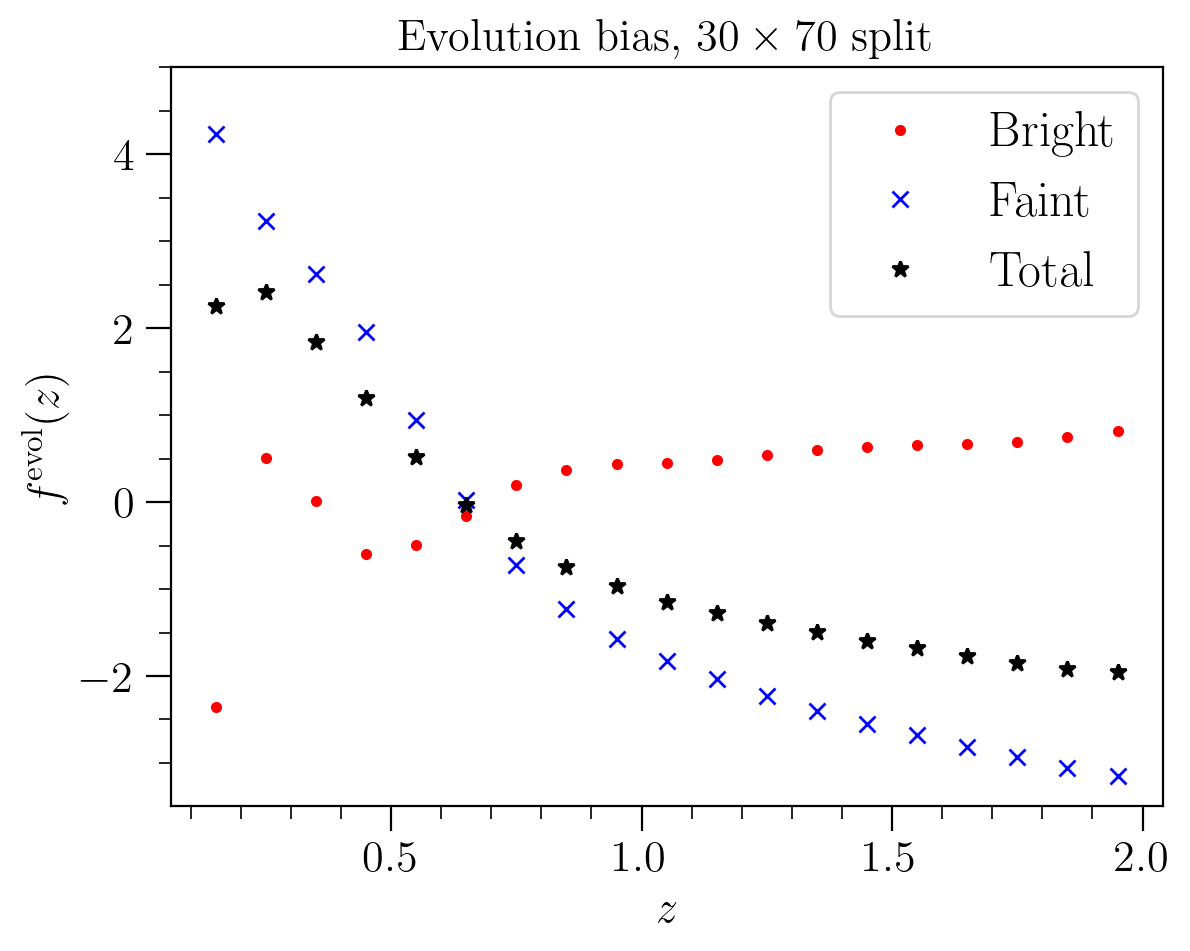

In [60]:
zbins = np.linspace(0.15, 1.95, 19)

myfBiases = EvolutionBias(n_split=10/3)

feB = myfBiases.fevol_bright(zbins)
feF = myfBiases.fevol_faint(zbins)
fe = myfBiases.fevol_total(zbins)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'bx', label='Faint')
plt.plot(zbins, fe, 'k*', label = 'Total')

plt.ylim([-3.5, 5.0])

plt.xlabel(r'$z$')
plt.ylabel(r'$f^\mathrm{evol}(z)$')
plt.legend(loc='best', fontsize = 18);
plt.title(r'Evolution bias, $30\times 70$ split');

plt.savefig('plots/fevol_prediction_30x70.pdf', bbox_inches='tight', format='pdf')

In [61]:
feB, feF

(array([-2.35710791,  0.50267603,  0.00895782, -0.59492009, -0.49505863,
        -0.16404253,  0.19264397,  0.36952203,  0.43853907,  0.45440814,
         0.4833308 ,  0.54007682,  0.59932034,  0.6323595 ,  0.65280044,
         0.66681915,  0.69110994,  0.7429895 ,  0.81482988]),
 array([ 4.22894971,  3.22955823,  2.61765473,  1.95918753,  0.94948372,
         0.01885715, -0.72267224, -1.22839524, -1.57209693, -1.82896117,
        -2.03473879, -2.22488036, -2.39749383, -2.54686948, -2.68379003,
        -2.81081826, -2.93482756, -3.05441667, -3.14524578]))

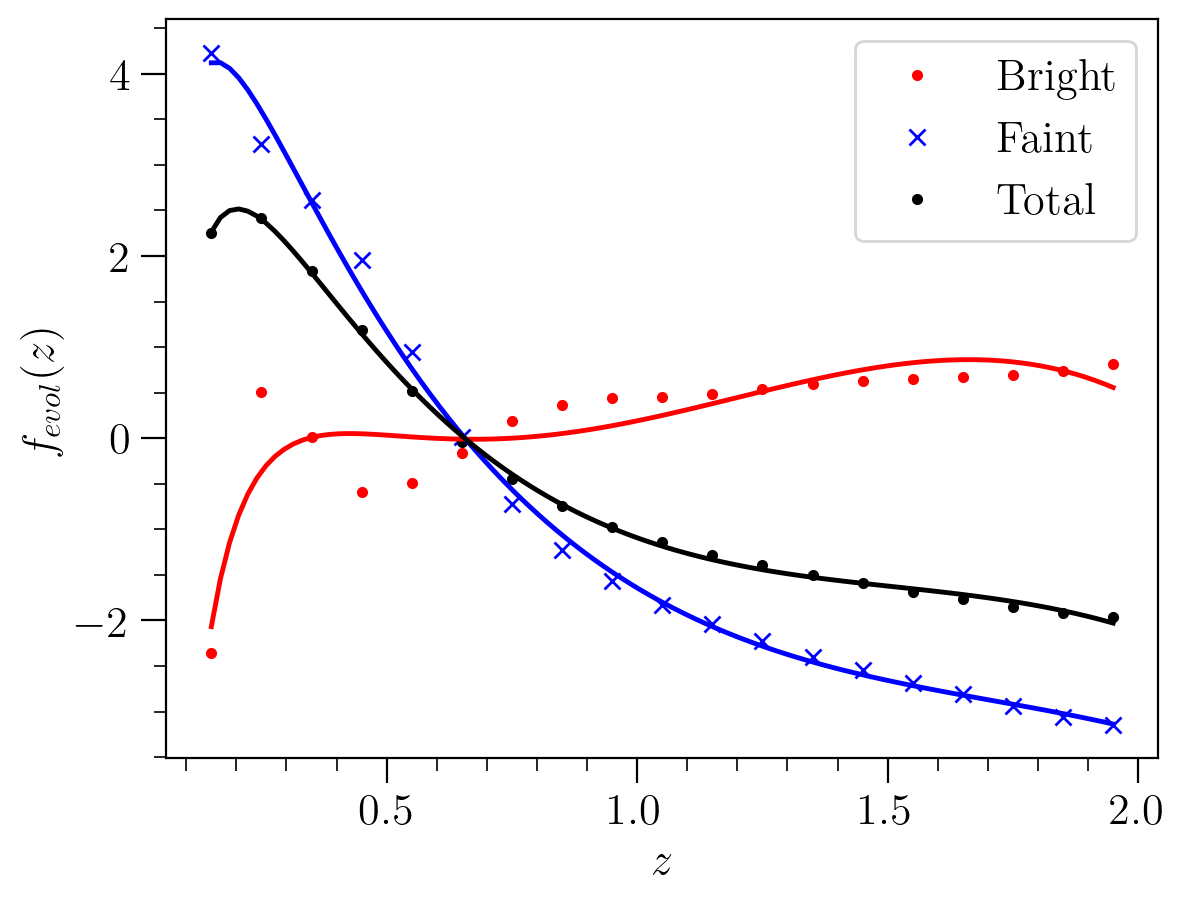

In [62]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, feB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, feF)
popt, pcov = curve_fit(poly_linlog2, zbins, fe)

zbins_ = np.linspace(0.15, 1.95, 100)


feB_predicted = poly_linlog2(np.array(zbins_), *poptB)
feF_predicted = poly_linlog2(np.array(zbins_), *poptF)
fe_predicted = poly_linlog2(np.array(zbins_), *popt)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'bx', label='Faint')
plt.plot(zbins, fe, 'k.', label='Total')
plt.plot(zbins_, feB_predicted, 'r-')
plt.plot(zbins_, feF_predicted, 'b-')
plt.plot(zbins_, fe_predicted, 'k-')

plt.xlabel(r'$z$')
plt.ylabel(r'$f_{evol}(z)$')
#plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

plt.legend(loc='best')

#plt.savefig('plots/fig_evolbias_3-10.pdf', format='pdf', bbox_inches='tight')


In [63]:
print(popt), print(poptB), print(poptF)

[-16.73322399  18.88860736 -17.61467342  -1.19486859  -4.40827881]
[-18.9937385   24.67396259 -18.05218283  -2.01939785  -5.18905777]
[-15.76443639  16.40917513 -17.42717348  -0.84149943  -4.0736603 ]


(None, None, None)

### Number density

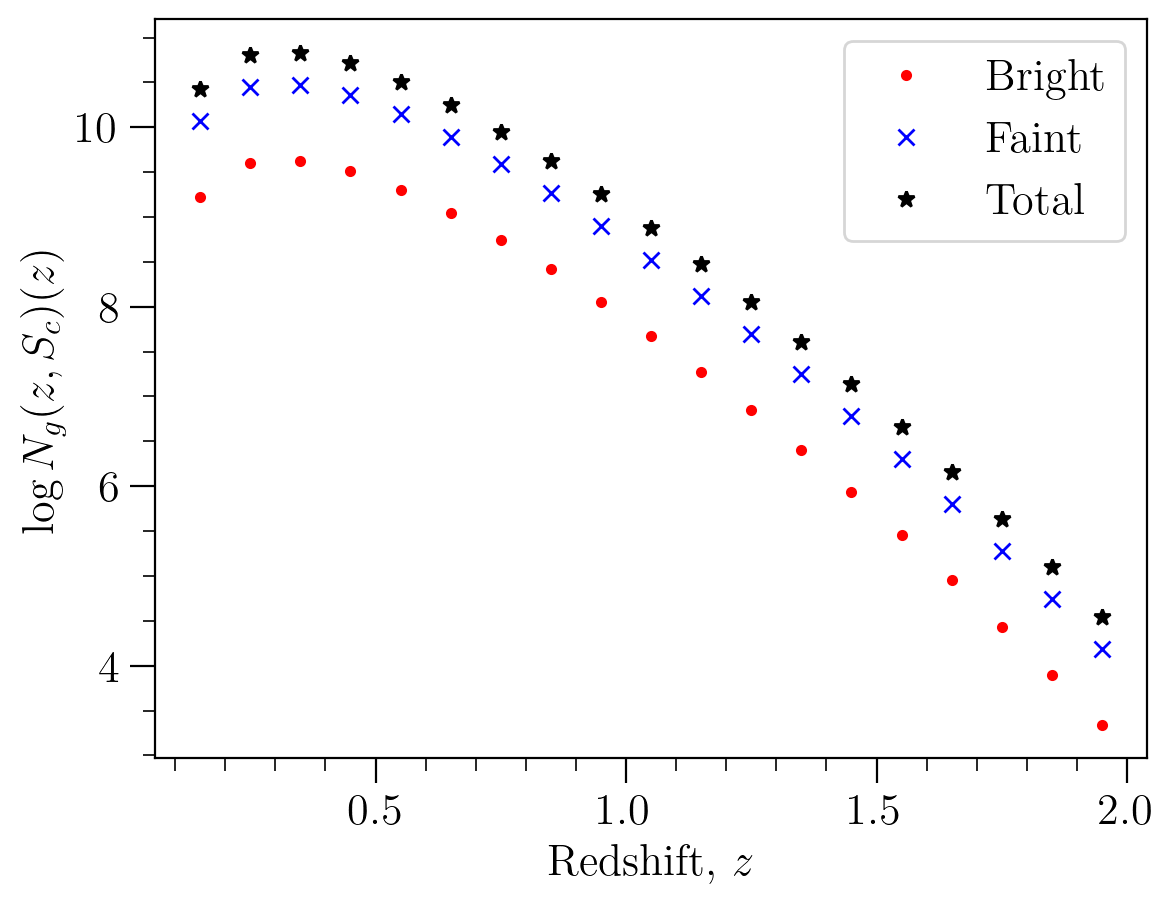

In [64]:
myFluxes = FluxSolver(n_split=10/3)

zbins = np.linspace(0.15, 1.95, 19)

LogN_bright = myFluxes.LogNB_z(zbins)
LogN_faint = myFluxes.LogNF_z(zbins)
LogN = myFluxes.LogN_z(zbins)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'bx', label='Faint')
plt.plot(zbins, LogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

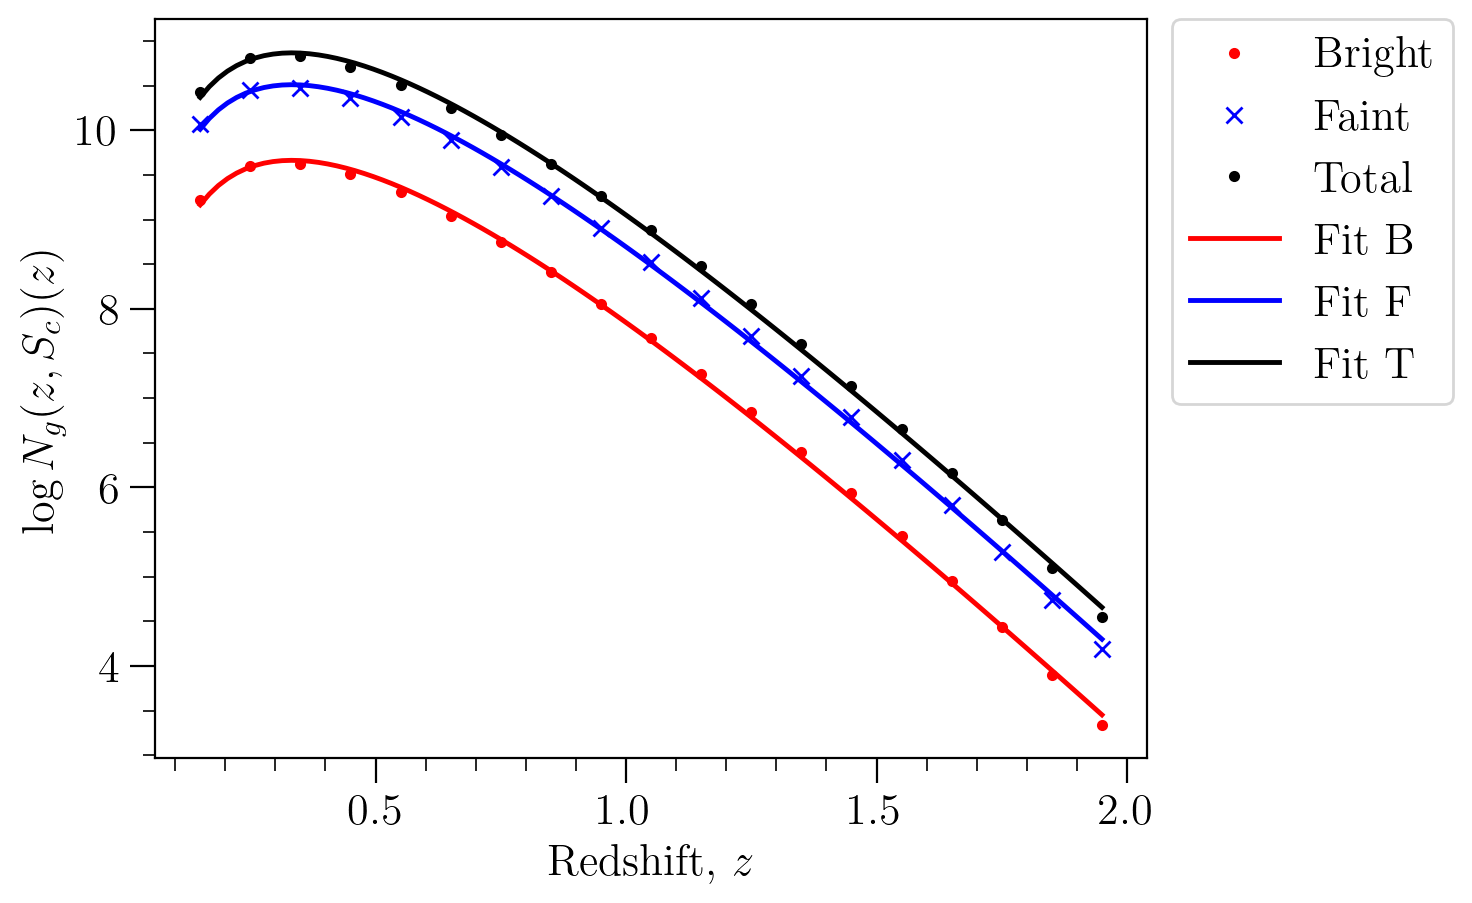

In [65]:
def poly_linlog(x, a, b, c):
    return a + b * x + c * np.log(x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, LogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, LogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, LogN)

zbins_ = np.linspace(0.15, 1.95, 100)


LogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
LogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
LogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'bx', label='Faint')
plt.plot(zbins, LogN, 'k.', label='Total')
plt.plot(zbins_, LogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, LogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, LogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [66]:
print(popt), print(poptB), print(poptF)

[15.09117829 -6.04009428  2.01187384]
[13.88720548 -6.04009427  2.01187383]
[14.73450334 -6.04009427  2.01187383]


(None, None, None)

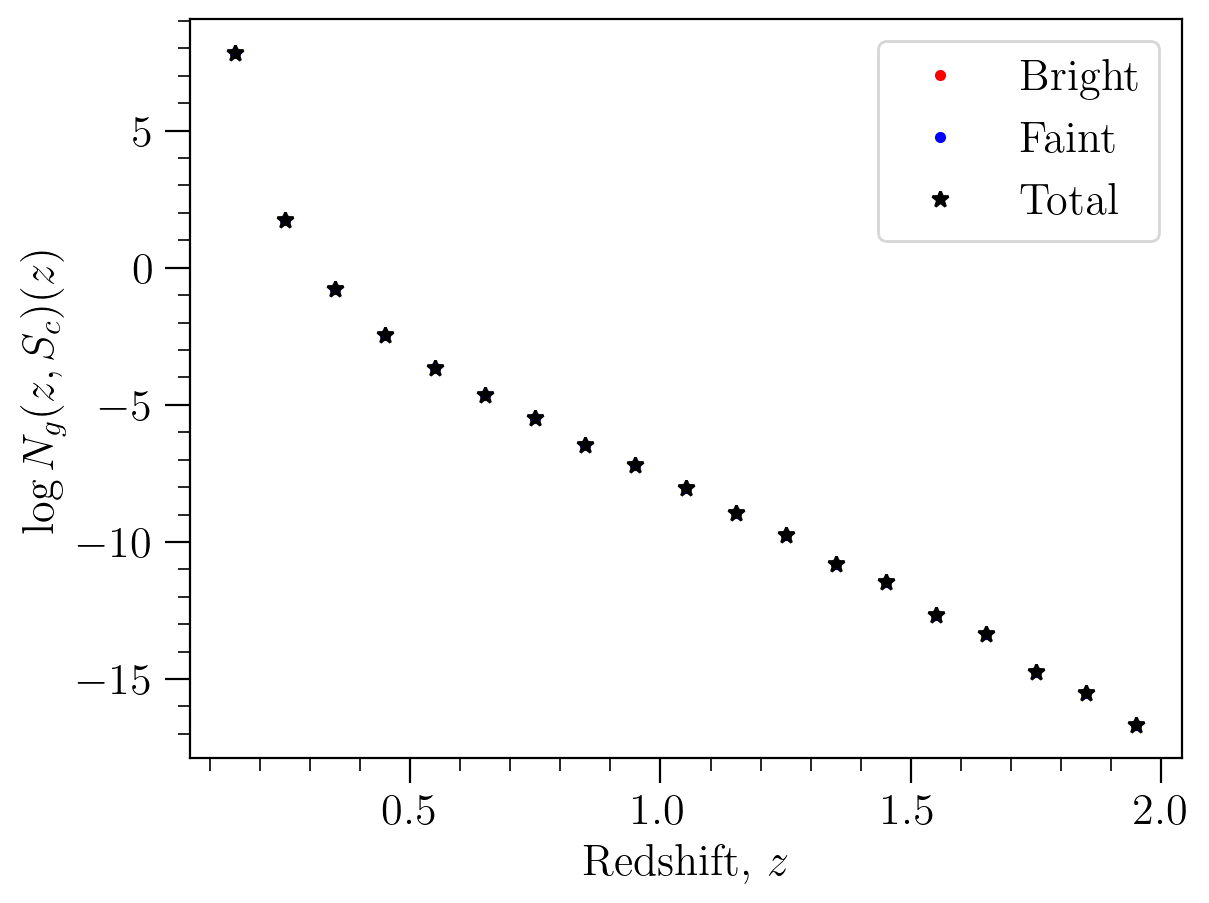

In [67]:
zbins = np.linspace(0.15, 1.95, 19)

dLogN_bright = myFluxes.dLogNB(zbins)
dLogN_faint = myFluxes.dLogNF(zbins)
dLogN = myFluxes.dLogN(zbins)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

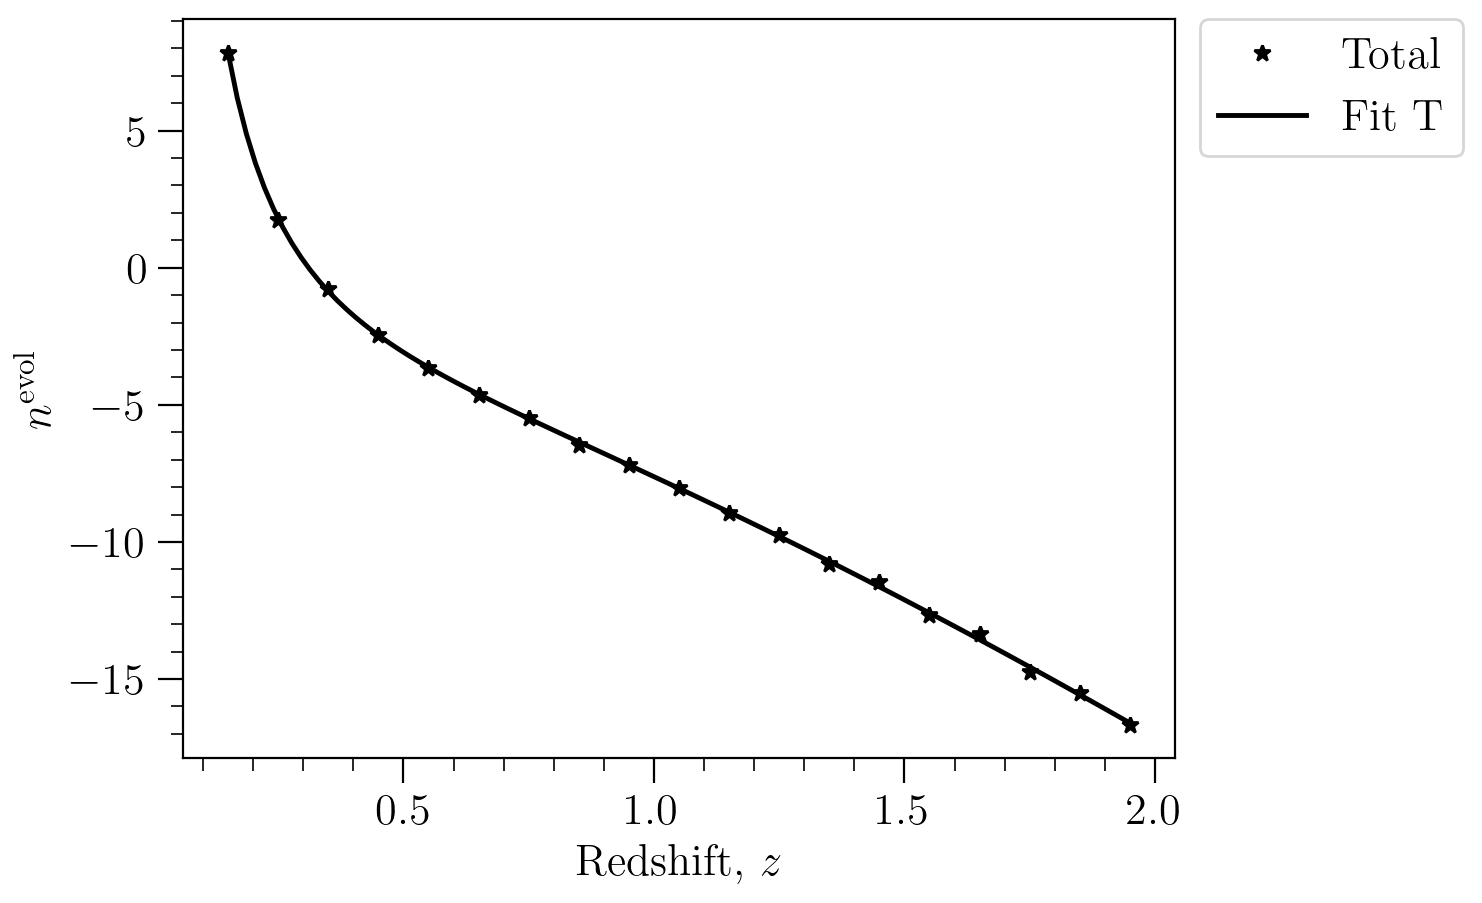

In [69]:
def poly_linlog(x, a, b, c, d):
    return a + b * x + c * (1/x) + d * np.exp(-x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, dLogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, dLogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, dLogN)

zbins_ = np.linspace(0.15, 1.95, 100)


dLogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
dLogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
dLogN_predicted = poly_linlog(np.array(zbins_), *popt)

#plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
#plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k*', label='Total')
#plt.plot(zbins_, dLogNB_predicted, 'r-', label='Fit B')
#plt.plot(zbins_, dLogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, dLogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$n^{\mathrm{evol}}$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [62]:
print(popt), print(poptB), print(poptF)

[  7.94599872 -12.03752386   2.29927261 -15.83887364]
[  7.94599843 -12.03752372   2.29927259 -15.83887318]
[  7.94599885 -12.03752392   2.29927262 -15.83887385]


(None, None, None)

In [63]:
pcov

array([[ 0.38992531, -0.17746371,  0.02525267, -0.59857259],
       [-0.17746371,  0.08155191, -0.0110888 ,  0.26950797],
       [ 0.02525267, -0.0110888 ,  0.0027264 , -0.044107  ],
       [-0.59857259,  0.26950797, -0.044107  ,  0.94925232]])

## Case with $n_{split} = 5$

In this case, bright galaxies are $1/5$ (20 %) of the total. 

### Magnification bias

In [53]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c):
    return a + b * x + c * x**2

def poly_linlog(x, a, b, c):
    return c + a * x + b * np.log(x)

def poly_linlog2(x, a, b, c, d):
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

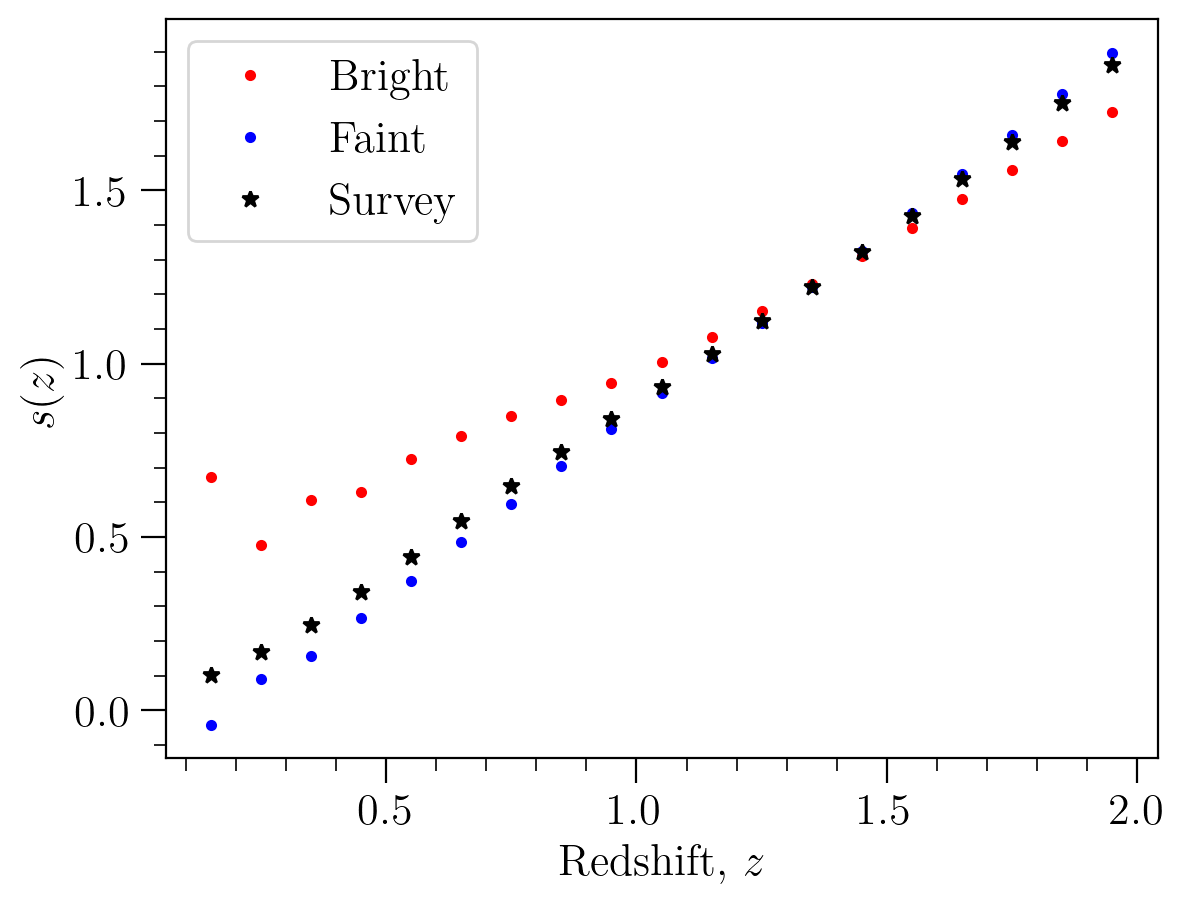

In [54]:
zbins = np.linspace(0.15, 1.95, 19)

myBiases = MagnificationBias(n_split=5)

sB = myBiases.s_bright(zbins)
sF = myBiases.s_faint(zbins)
smodel = myBiases.s_model(zbins)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$s(z)$')
plt.legend();


In [68]:
sB

array([0.67305899, 0.47850262, 0.60568693, 0.63024073, 0.72531868,
       0.79127179, 0.84909062, 0.89625832, 0.94479023, 1.00555245,
       1.07651371, 1.15262299, 1.23144197, 1.31168461, 1.39252626,
       1.47460293, 1.55787663, 1.64185011, 1.72636861])

In [69]:
smodel

array([0.10126775, 0.16794581, 0.24591785, 0.34042118, 0.44359672,
       0.54749941, 0.64724732, 0.74425817, 0.83940737, 0.93348225,
       1.02841809, 1.12429914, 1.2228487 , 1.3231631 , 1.42622787,
       1.53202081, 1.64045919, 1.75174659, 1.86291714])

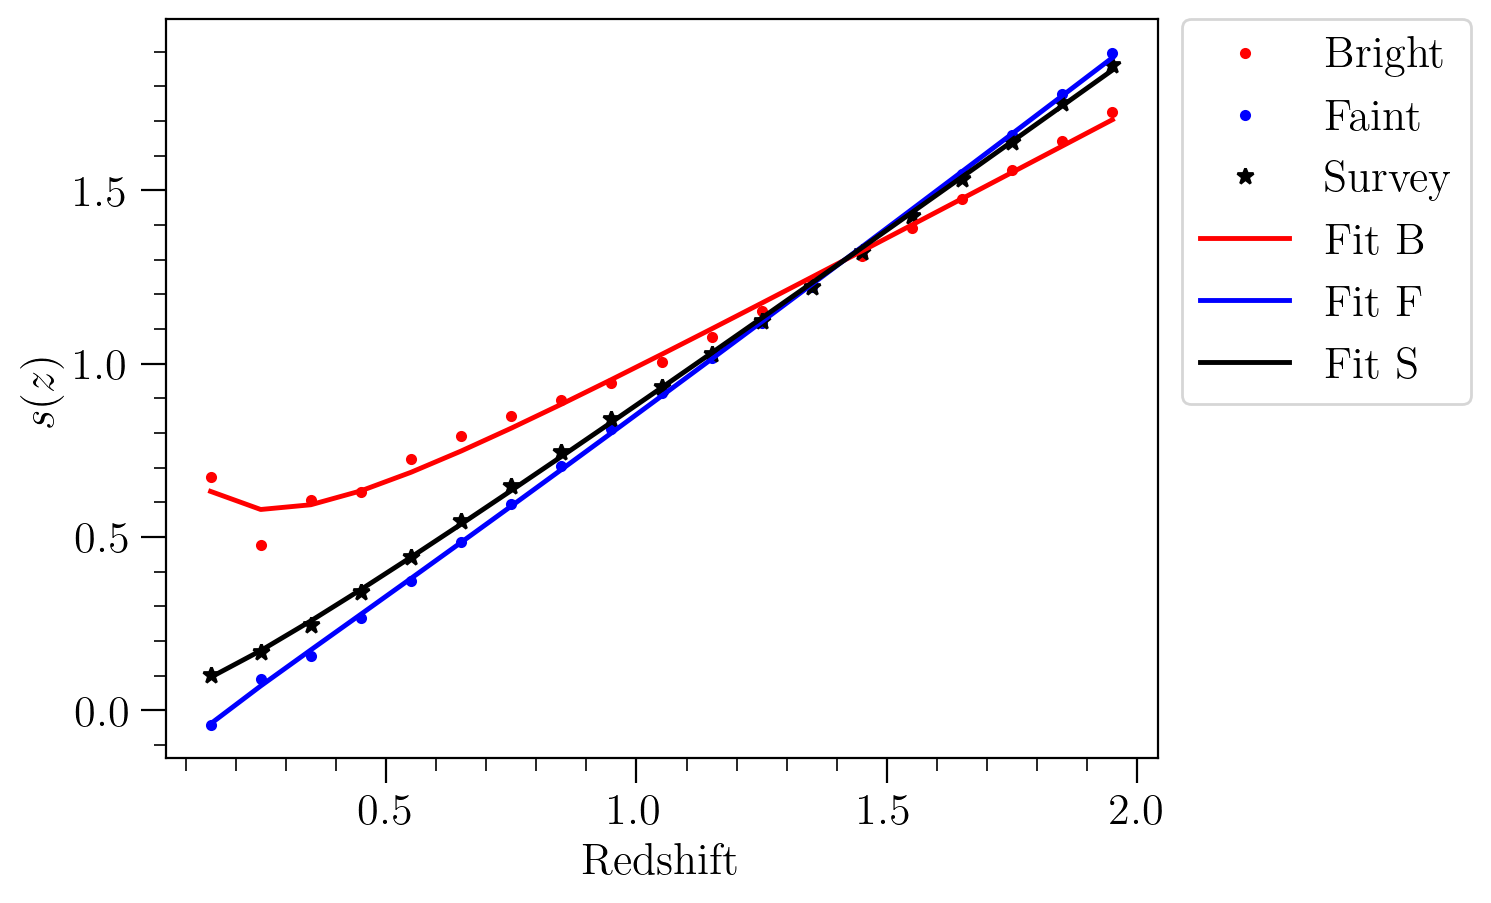

In [55]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, sB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, sF)
popt, pcov = curve_fit(poly_linlog2, zbins, smodel)


sB_predicted = poly_linlog2(np.array(zbins), *poptB)
sF_predicted = poly_linlog2(np.array(zbins), *poptF)
smodel_predictd = poly_linlog2(np.array(zbins), *popt)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')
plt.plot(zbins, sB_predicted, 'r-', label='Fit B')
plt.plot(zbins, sF_predicted, 'b-', label='Fit F')
plt.plot(zbins, smodel_predictd, 'k-', label='Fit S')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$s(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);


In [56]:
print(popt), print(poptB), print(poptF)

[-0.19376092  1.07473357 -0.07806244 -0.00558004]
[0.31957886 0.67098804 0.0553817  0.08799199]
[-0.32209606  1.17567014 -0.11142368 -0.02897311]


(None, None, None)

### Evolution bias

In [57]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3

def poly_linlog(x, a0, a, b, c):
    return a0 + a * x + b * np.log(x) + c * np.exp(x)

def poly_linlog2(x, a0, a, b, c, d):
    return a0 + a * x + b * np.log(x) + c * np.exp(x) + d * (np.log(x))**2
    #return a0 + a * x + b * np.log(x) + d * (np.log(x))**2

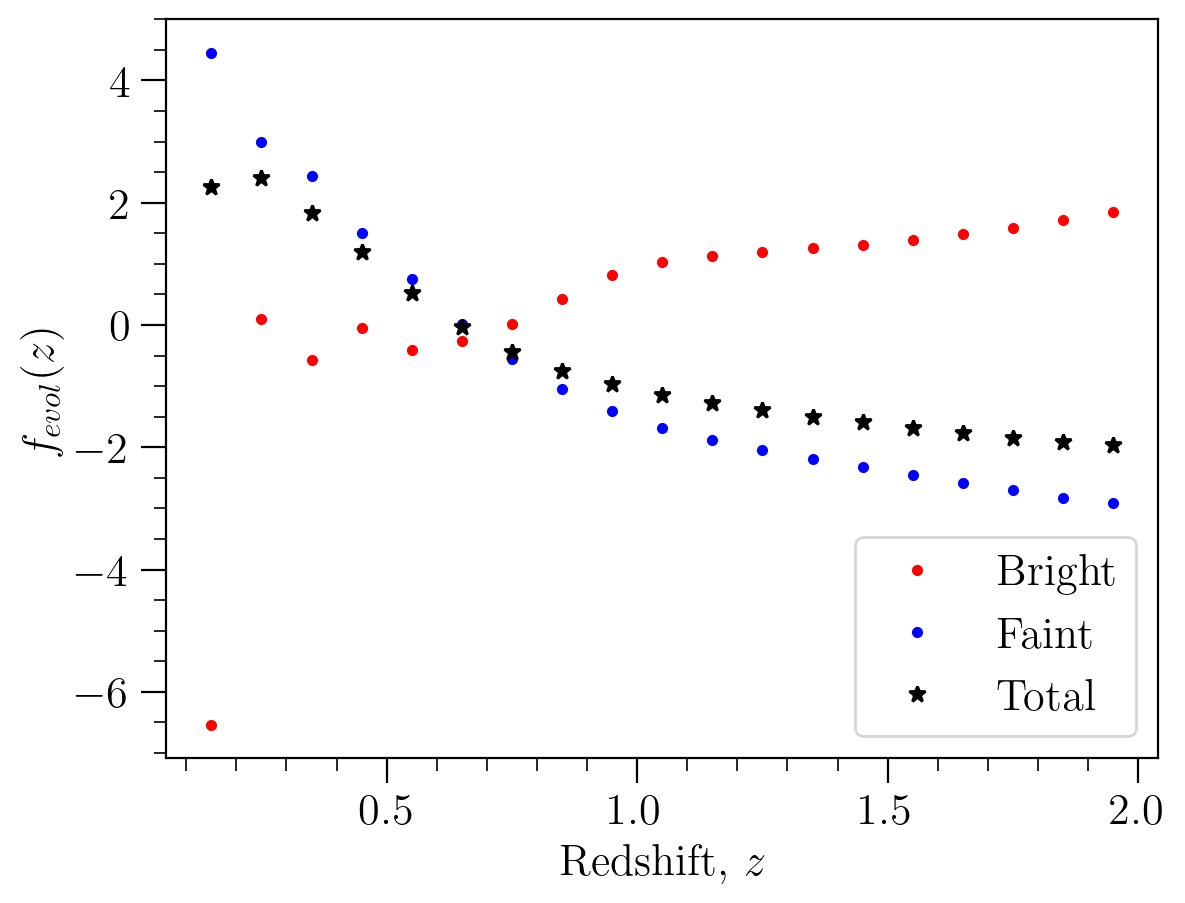

In [58]:
zbins = np.linspace(0.15, 1.95, 19)

myfBiases = EvolutionBias(n_split=5.)

feB = myfBiases.fevol_bright(zbins)
feF = myfBiases.fevol_faint(zbins)
fe = myfBiases.fevol_total(zbins)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$f_{evol}(z)$')
plt.legend();

In [70]:
feB

array([-6.53972086,  0.09057049, -0.5804842 , -0.04639725, -0.41476509,
       -0.26788556,  0.01445244,  0.42731939,  0.81266783,  1.02409595,
        1.1320267 ,  1.19388959,  1.25350597,  1.31588318,  1.39584288,
        1.48600484,  1.58671907,  1.71015017,  1.84649527])

In [71]:
feF

array([ 4.45134575,  2.99172434,  2.43892812,  1.50279337,  0.74884254,
        0.02195544, -0.56370983, -1.04310492, -1.41429962, -1.68596196,
       -1.88215407, -2.04271391, -2.18643846, -2.32034678, -2.45247683,
       -2.58091001, -2.70548765, -2.82153106, -2.90815267])

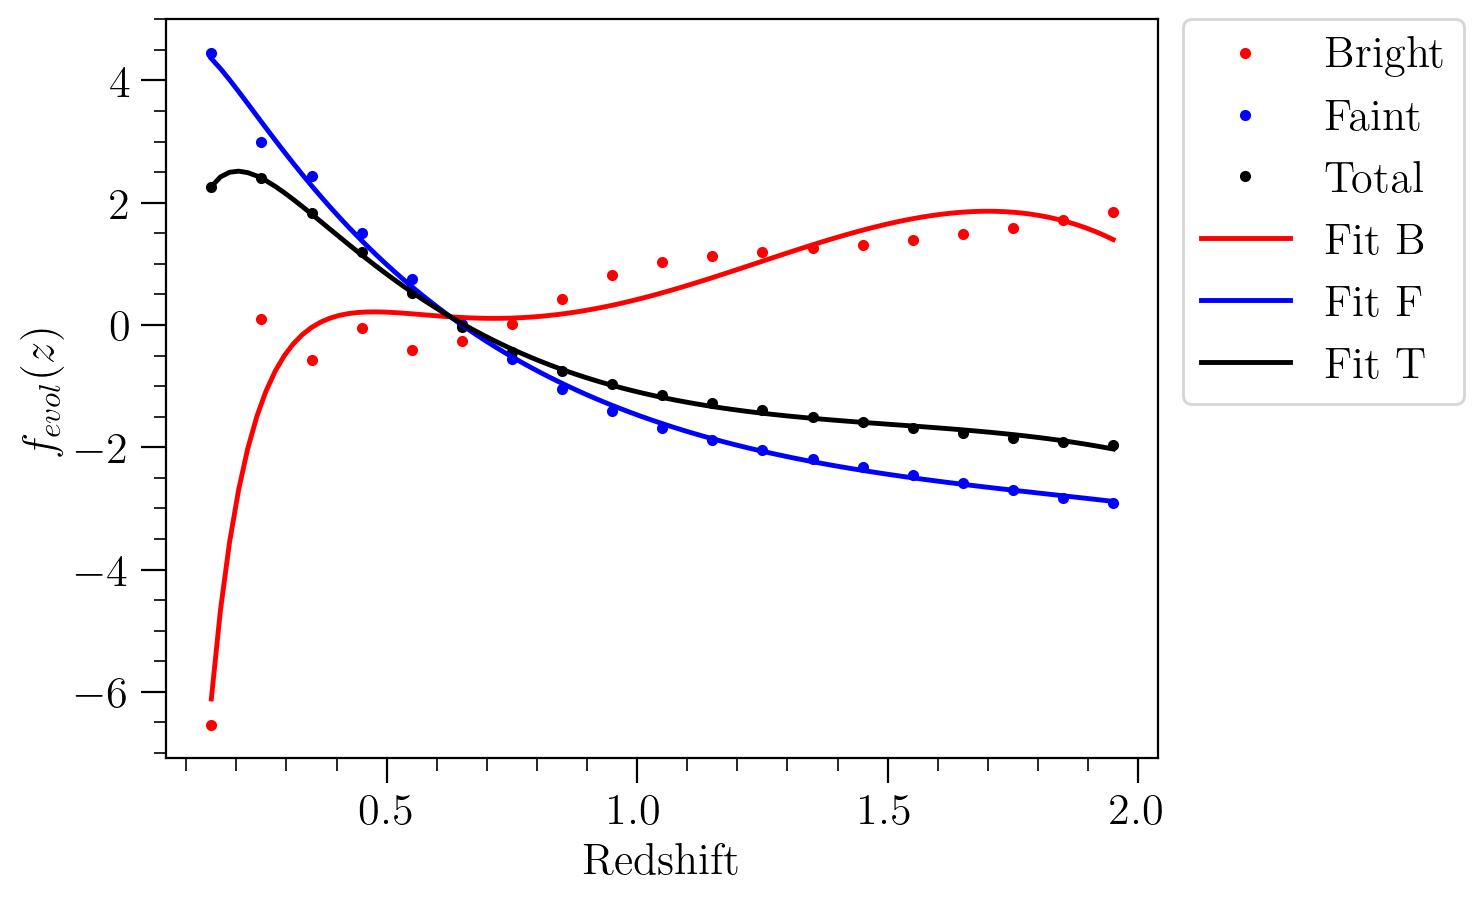

In [59]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, feB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, feF)
popt, pcov = curve_fit(poly_linlog2, zbins, fe)

zbins_ = np.linspace(0.15, 1.95, 100)


feB_predicted = poly_linlog2(np.array(zbins_), *poptB)
feF_predicted = poly_linlog2(np.array(zbins_), *poptF)
fe_predicted = poly_linlog2(np.array(zbins_), *popt)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k.', label='Total')
plt.plot(zbins_, feB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, feF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, fe_predicted, 'k-', label='Fit T')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$f_{evol}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);


In [60]:
print(popt), print(poptB), print(poptF)

[-16.73322399  18.88860736 -17.61467342  -1.19486859  -4.40827881]
[-43.62247766  55.30817749 -41.98868547  -4.14515041 -12.67883993]
[-10.01090763   9.78371098 -11.5211676   -0.45729779  -2.34063781]


(None, None, None)

### Number density

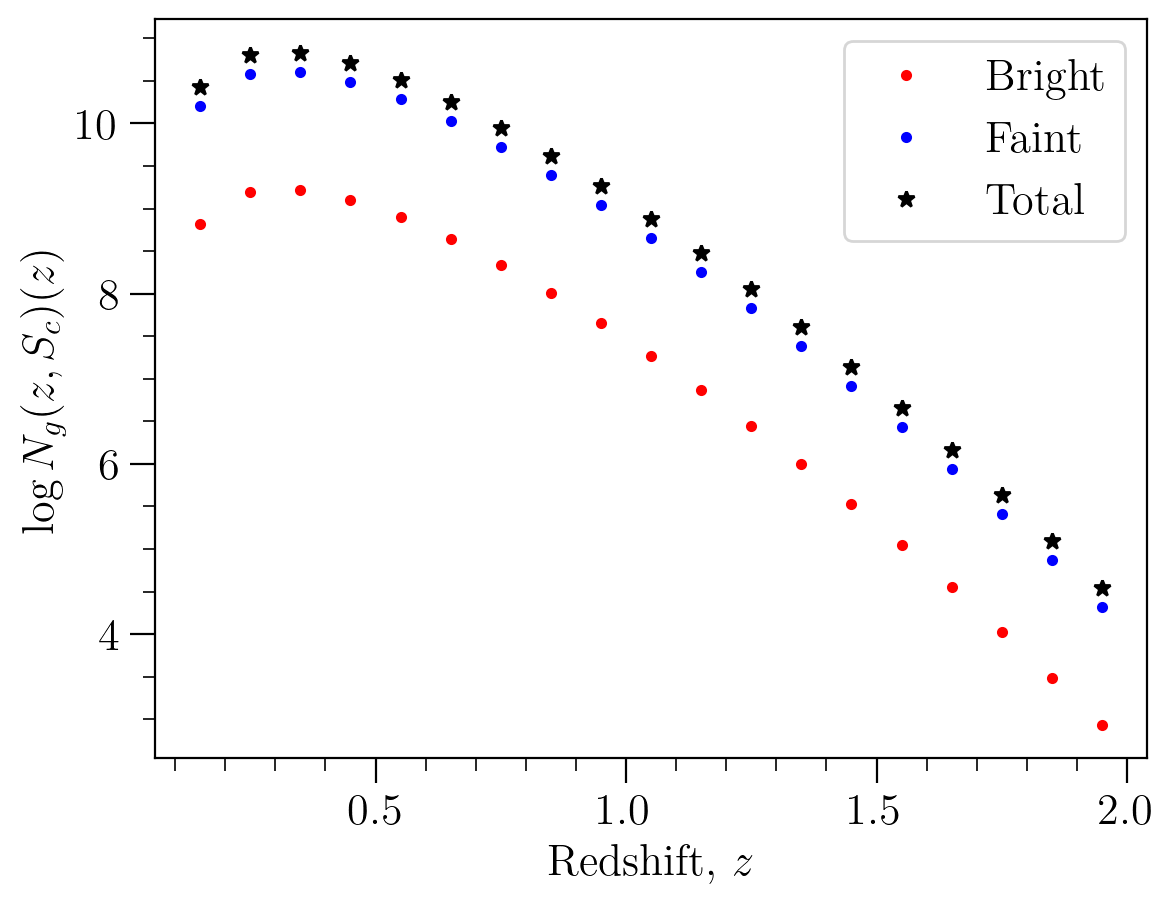

In [61]:
myFluxes = FluxSolver(n_split=5.)

zbins = np.linspace(0.15, 1.95, 19)

LogN_bright = myFluxes.LogNB_z(zbins)
LogN_faint = myFluxes.LogNF_z(zbins)
LogN = myFluxes.LogN_z(zbins)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

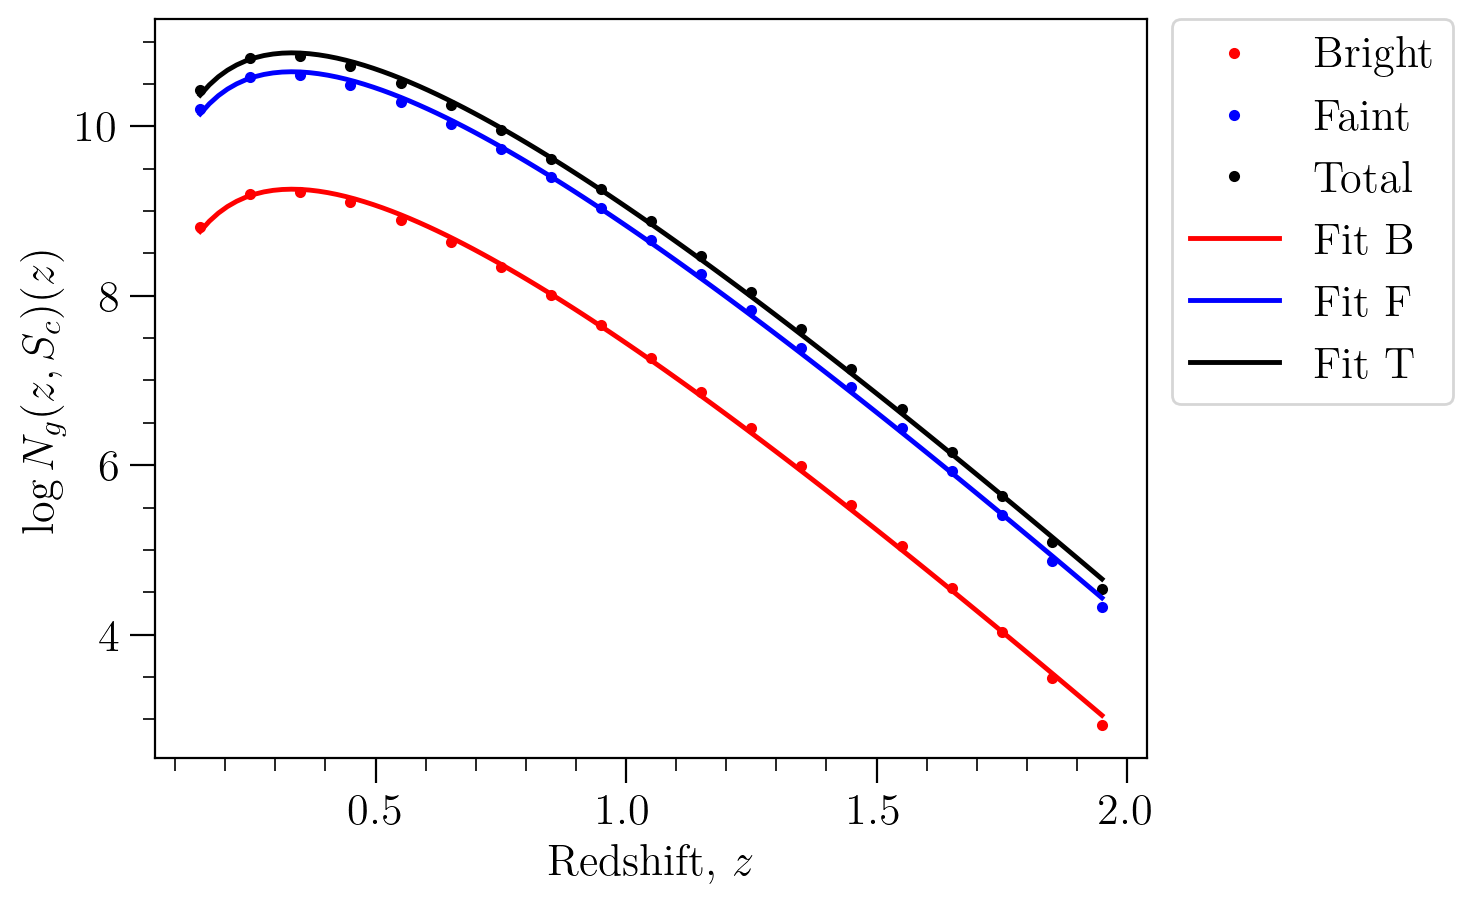

In [62]:
def poly_linlog(x, a, b, c):
    return a + b * x + c * np.log(x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, LogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, LogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, LogN)

zbins_ = np.linspace(0.15, 1.95, 100)


LogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
LogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
LogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k.', label='Total')
plt.plot(zbins_, LogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, LogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, LogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [63]:
print(popt), print(poptB), print(poptF)

[15.09117829 -6.04009428  2.01187384]
[13.48174037 -6.04009427  2.01187383]
[14.86803473 -6.04009427  2.01187383]


(None, None, None)

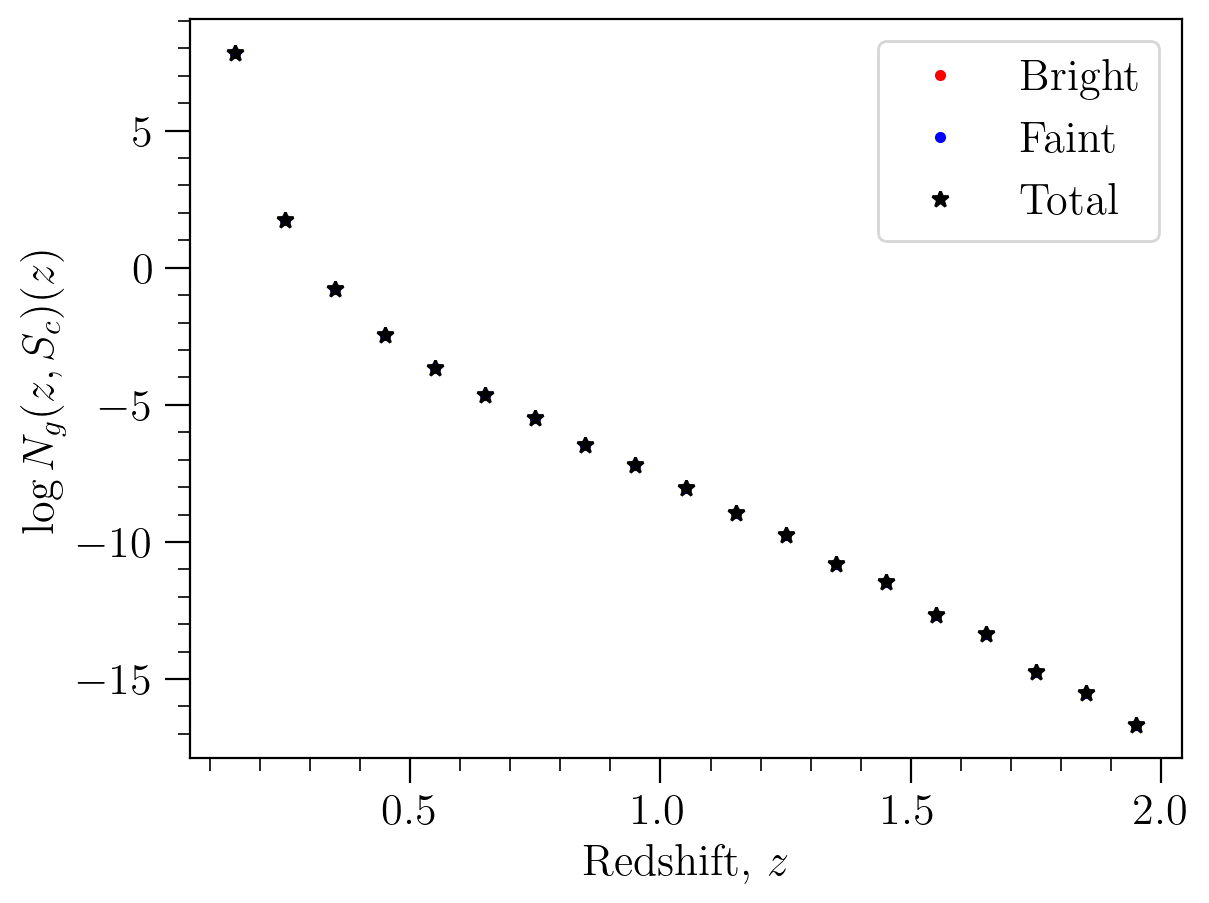

In [64]:
zbins = np.linspace(0.15, 1.95, 19)

dLogN_bright = myFluxes.dLogNB(zbins)
dLogN_faint = myFluxes.dLogNF(zbins)
dLogN = myFluxes.dLogN(zbins)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

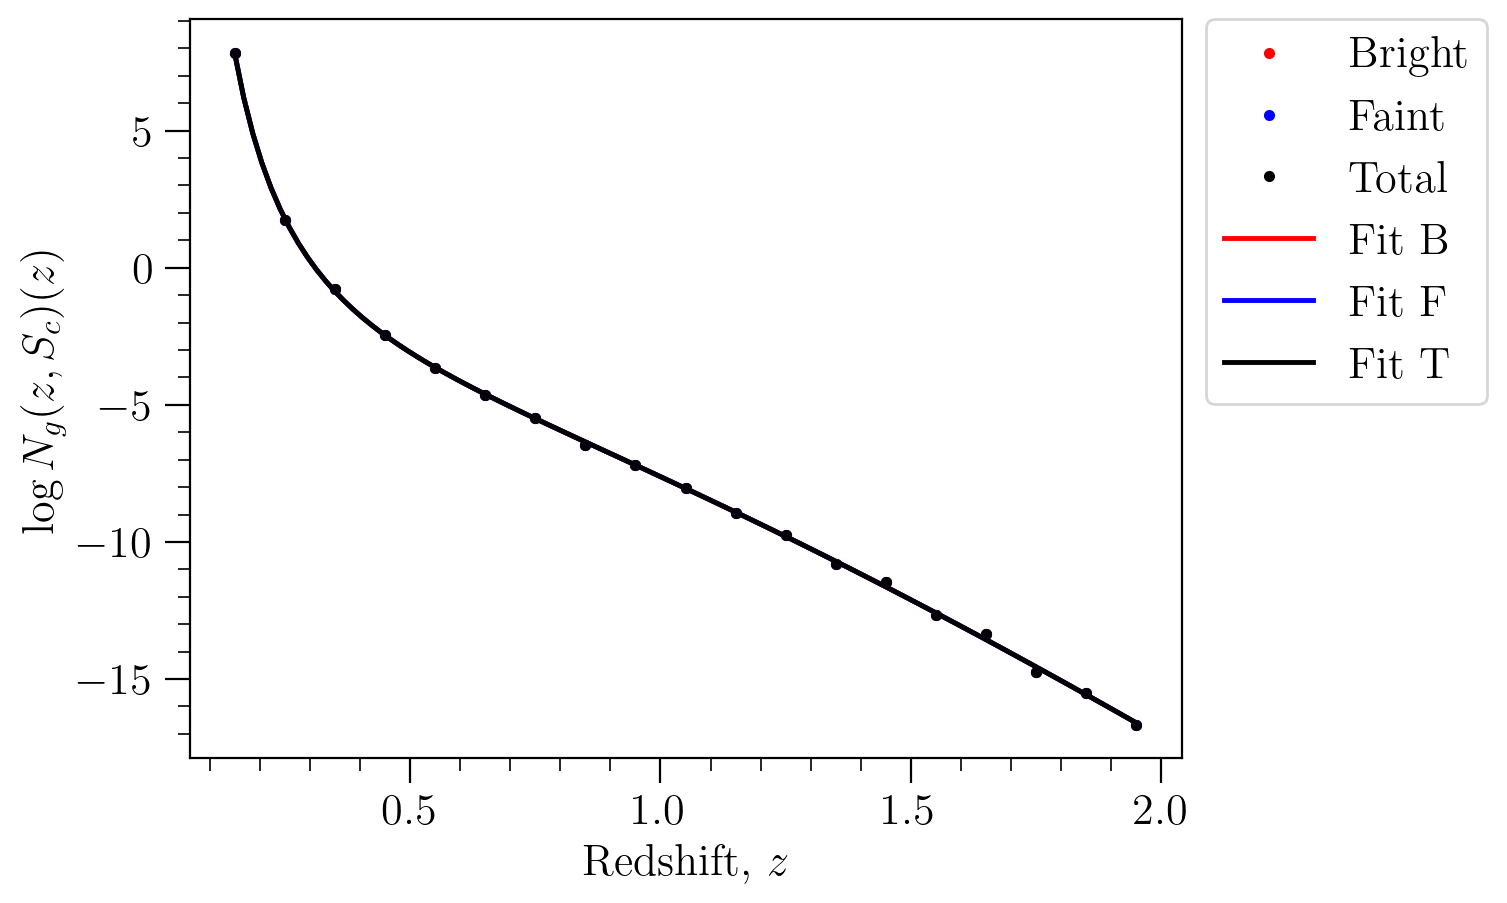

In [65]:
def poly_linlog(x, a, b, c, d):
    return a + b * x + c * (1/x) + d * np.exp(-x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, dLogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, dLogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, dLogN)

zbins_ = np.linspace(0.15, 1.95, 100)


dLogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
dLogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
dLogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k.', label='Total')
plt.plot(zbins_, dLogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, dLogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, dLogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [66]:
print(popt), print(poptB), print(poptF)

[  7.94599872 -12.03752386   2.29927261 -15.83887364]
[  7.94599876 -12.03752388   2.29927261 -15.8388737 ]
[  7.94599882 -12.0375239    2.29927262 -15.83887379]


(None, None, None)

In [67]:
pcov

array([[ 0.38992531, -0.17746371,  0.02525267, -0.59857259],
       [-0.17746371,  0.08155191, -0.0110888 ,  0.26950797],
       [ 0.02525267, -0.0110888 ,  0.0027264 , -0.044107  ],
       [-0.59857259,  0.26950797, -0.044107  ,  0.94925232]])

## Case with $n_{split} = 2.5$

In this case, bright galaxies are $2/5$ (40%) of the total. 

### Magnification bias

In [3]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c):
    return a + b * x + c * x**2

def poly_linlog(x, a, b, c):
    return c + a * x + b * np.log(x)

def poly_linlog2(x, a, b, c, d):
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

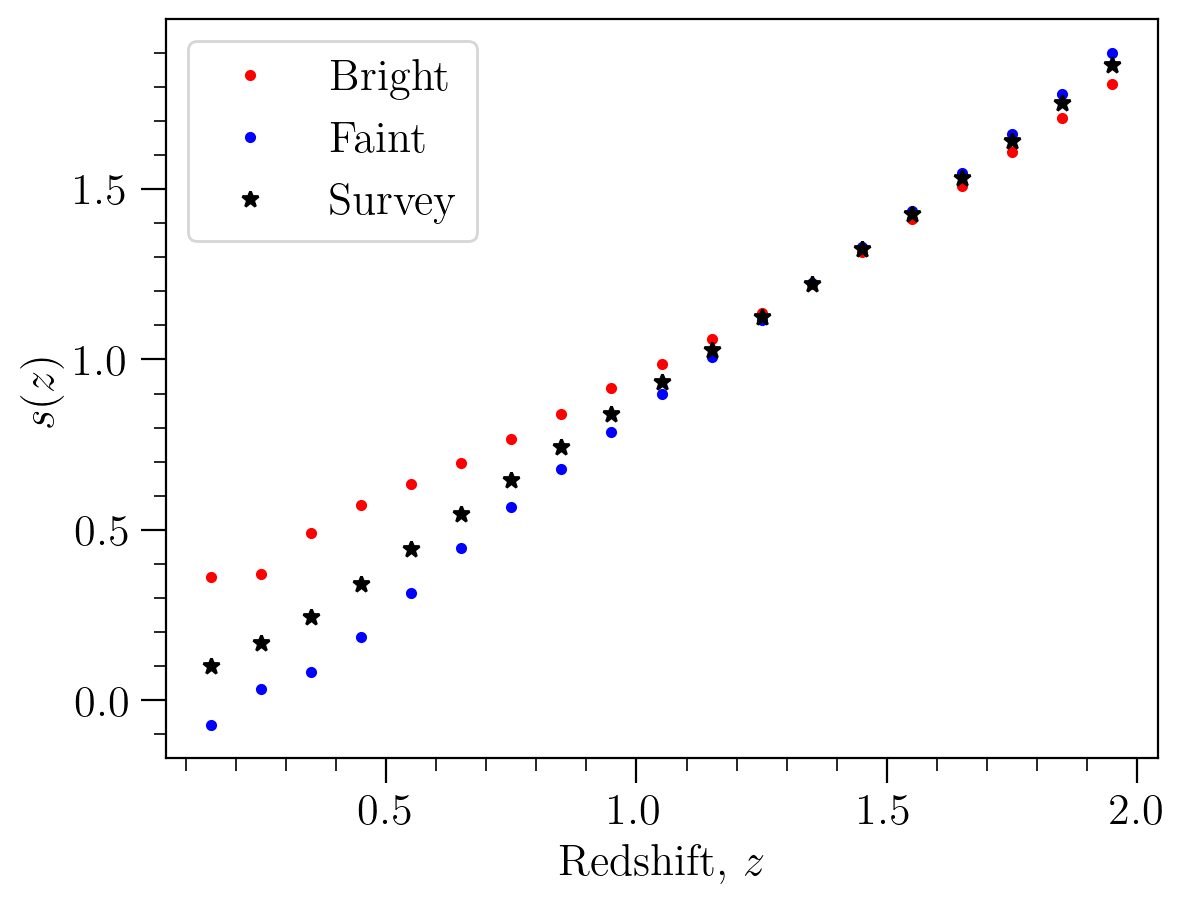

In [4]:
zbins = np.linspace(0.15, 1.95, 19)

myBiases = MagnificationBias(n_split=2.5)

sB = myBiases.s_bright(zbins)
sF = myBiases.s_faint(zbins)
smodel = myBiases.s_model(zbins)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$s(z)$')
plt.legend();


In [7]:
sB

array([0.36074861, 0.37136166, 0.49125934, 0.57258774, 0.63507917,
       0.69611407, 0.76565208, 0.84126453, 0.91598191, 0.98606495,
       1.058817  , 1.13757212, 1.22263581, 1.31424594, 1.41079416,
       1.51020605, 1.61003934, 1.7093556 , 1.80809726])

In [8]:
smodel

array([0.10126775, 0.16794581, 0.24591785, 0.34042118, 0.44359672,
       0.54749941, 0.64724732, 0.74425817, 0.83940737, 0.93348225,
       1.02841809, 1.12429914, 1.2228487 , 1.3231631 , 1.42622787,
       1.53202081, 1.64045919, 1.75174659, 1.86291714])

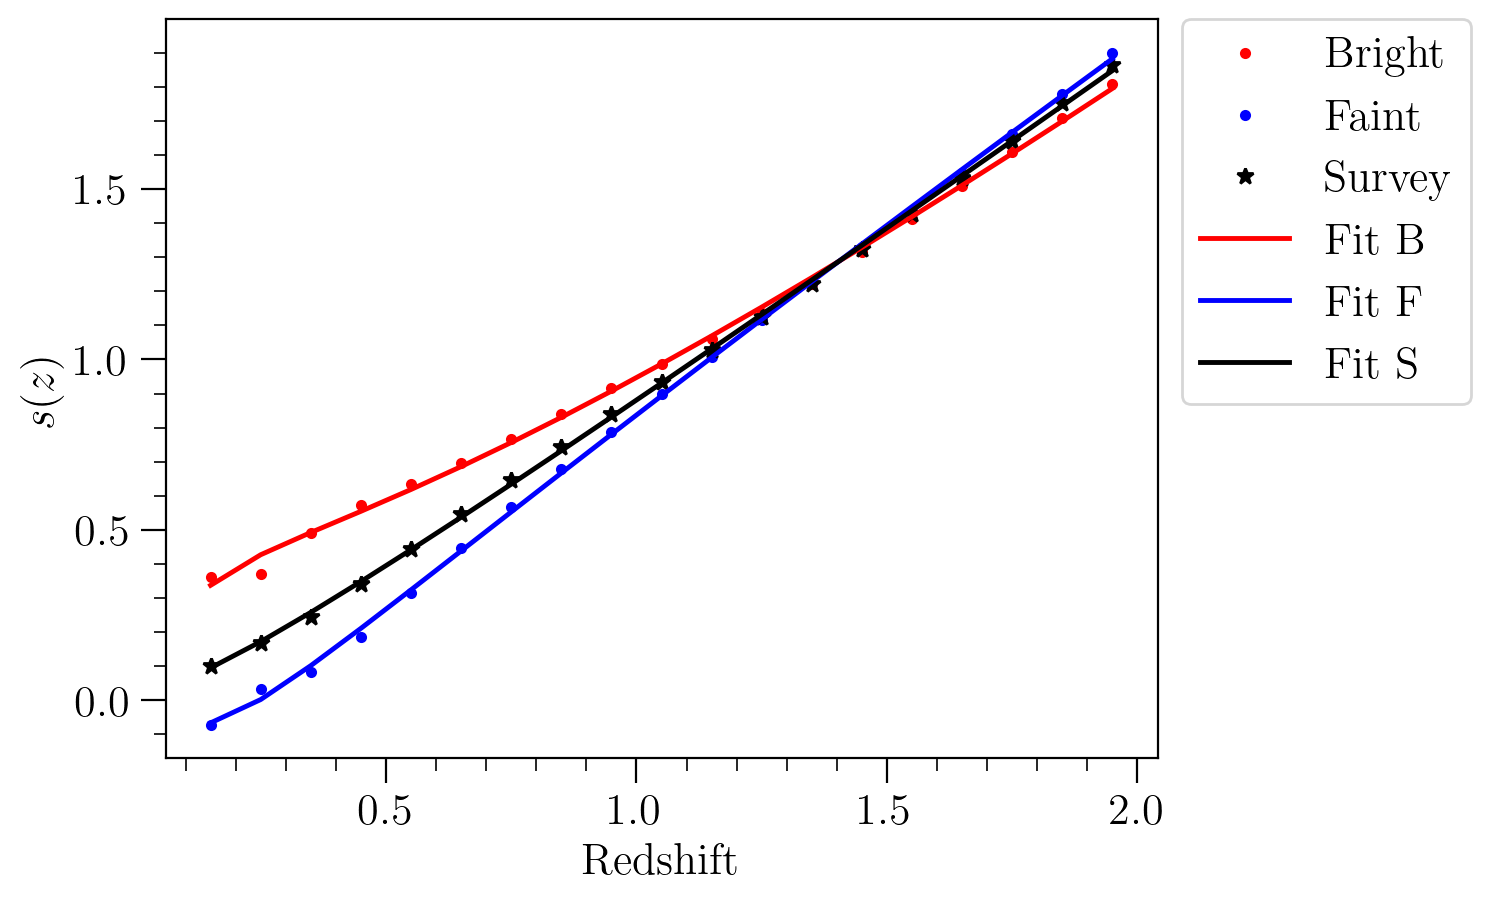

In [5]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, sB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, sF)
popt, pcov = curve_fit(poly_linlog2, zbins, smodel)


sB_predicted = poly_linlog2(np.array(zbins), *poptB)
sF_predicted = poly_linlog2(np.array(zbins), *poptF)
smodel_predictd = poly_linlog2(np.array(zbins), *popt)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')
plt.plot(zbins, sB_predicted, 'r-', label='Fit B')
plt.plot(zbins, sF_predicted, 'b-', label='Fit F')
plt.plot(zbins, smodel_predictd, 'k-', label='Fit S')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$s(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);


In [6]:
print(popt), print(poptB), print(poptF)

[-0.19376092  1.07473357 -0.07806244 -0.00558004]
[-0.39242716  1.33920133 -0.54218865 -0.13878386]
[-0.06131682  0.89842178  0.23135498  0.08322249]


(None, None, None)

### Evolution bias

In [9]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3

def poly_linlog(x, a0, a, b, c):
    return a0 + a * x + b * np.log(x) + c * np.exp(x)

def poly_linlog2(x, a0, a, b, c, d):
    return a0 + a * x + b * np.log(x) + c * np.exp(x) + d * (np.log(x))**2
    #return a0 + a * x + b * np.log(x) + d * (np.log(x))**2

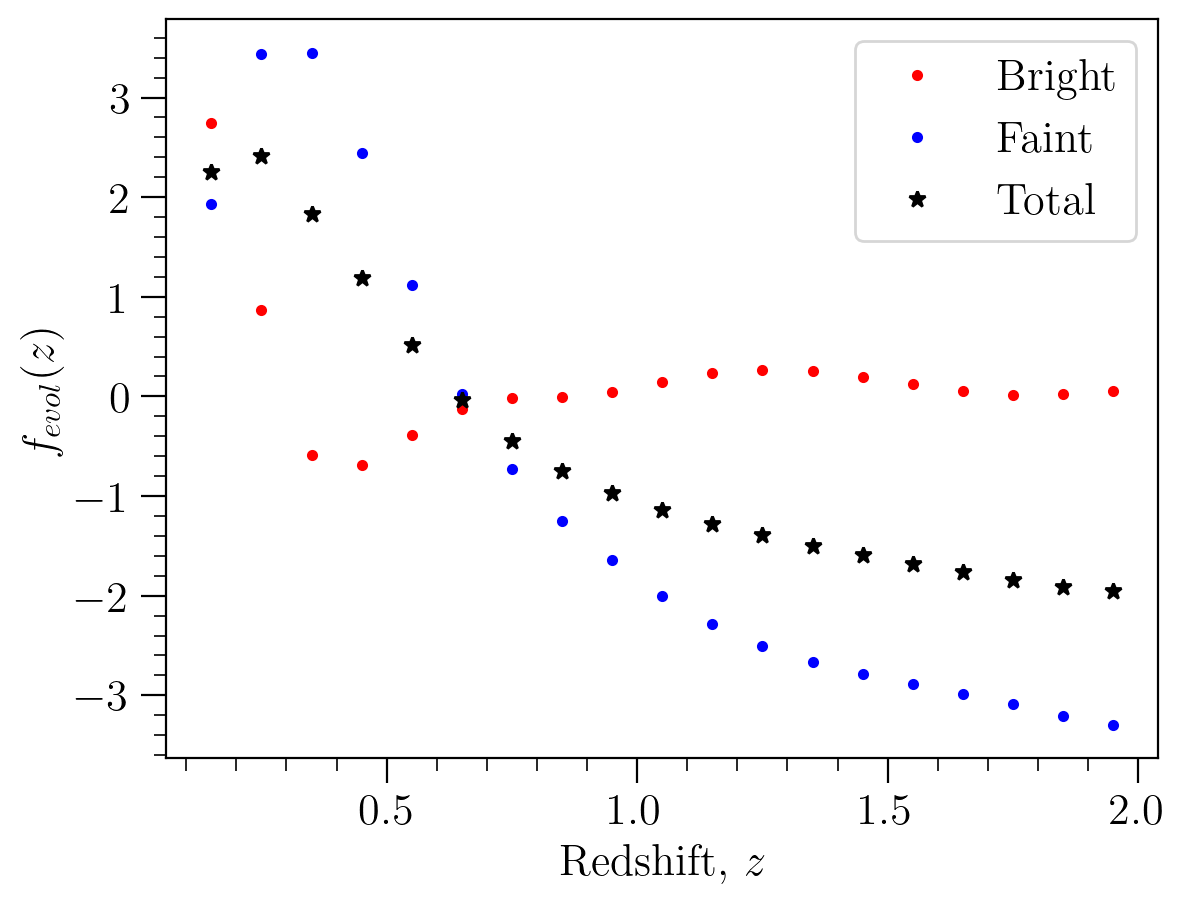

In [10]:
zbins = np.linspace(0.15, 1.95, 19)

myfBiases = EvolutionBias(n_split=2.5)

feB = myfBiases.fevol_bright(zbins)
feF = myfBiases.fevol_faint(zbins)
fe = myfBiases.fevol_total(zbins)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$f_{evol}(z)$')
plt.legend();

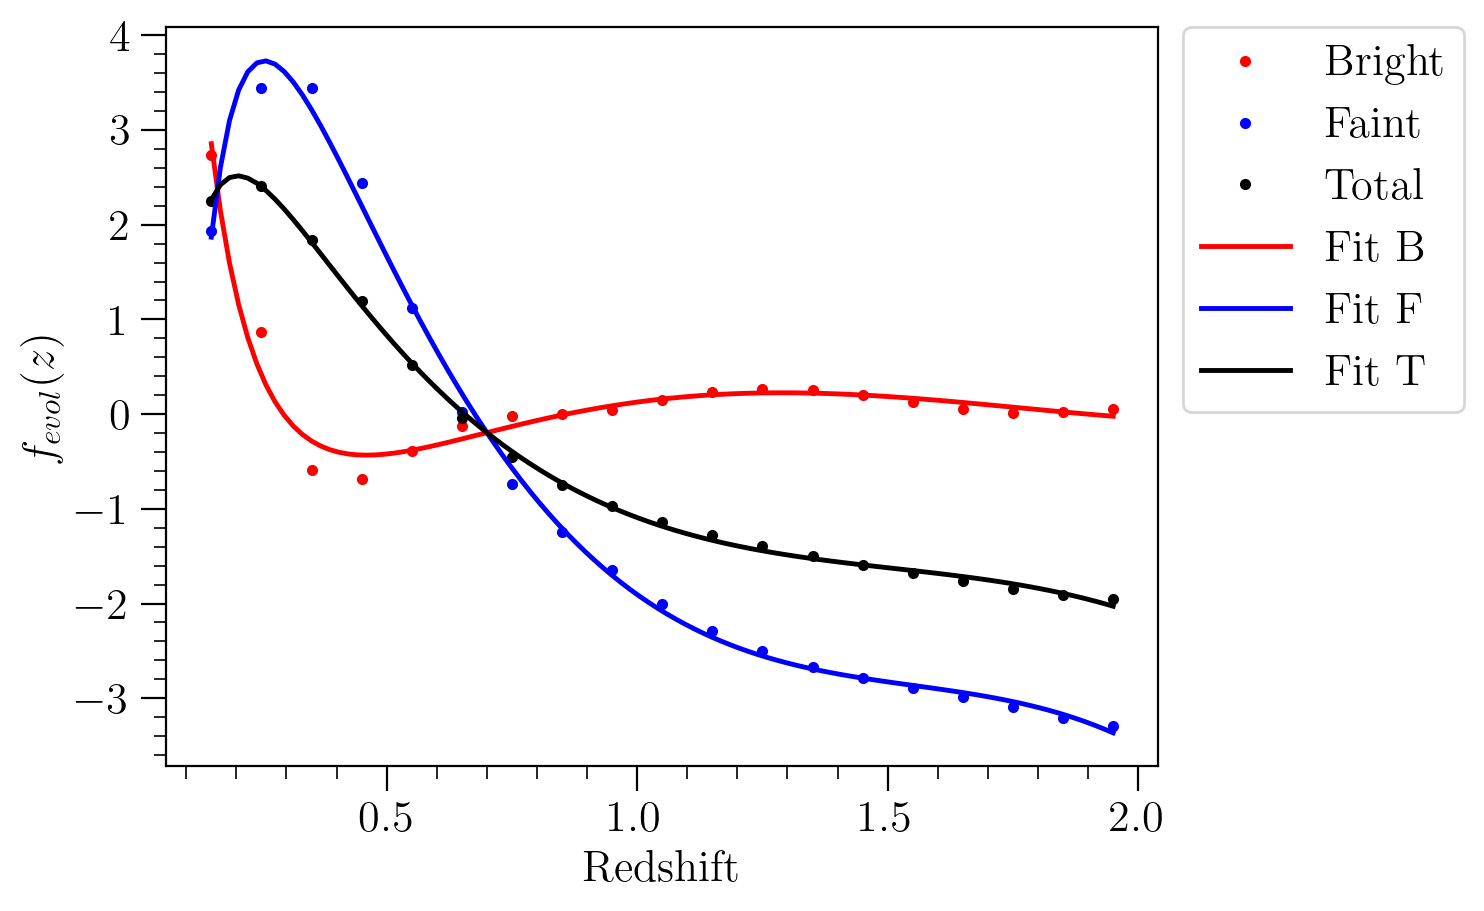

In [11]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, feB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, feF)
popt, pcov = curve_fit(poly_linlog2, zbins, fe)

zbins_ = np.linspace(0.15, 1.95, 100)


feB_predicted = poly_linlog2(np.array(zbins_), *poptB)
feF_predicted = poly_linlog2(np.array(zbins_), *poptF)
fe_predicted = poly_linlog2(np.array(zbins_), *popt)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k.', label='Total')
plt.plot(zbins_, feB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, feF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, fe_predicted, 'k-', label='Fit T')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$f_{evol}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);


In [13]:
feB

array([ 2.73980215e+00,  8.70932861e-01, -5.85333578e-01, -6.85332388e-01,
       -3.84341789e-01, -1.21379095e-01, -2.06484946e-02, -9.69727756e-04,
        4.31695421e-02,  1.47628656e-01,  2.35322893e-01,  2.65225912e-01,
        2.55594283e-01,  1.99337575e-01,  1.25133414e-01,  5.64658853e-02,
        1.61022800e-02,  1.97988195e-02,  5.22506904e-02])

In [16]:
feB_ = np.array([float(np.format_float_positional(feB[i])) for i in np.arange(len(feB))])

# Suppress scientific notation in NumPy
np.set_printoptions(suppress=True)

feB_

array([ 2.73980215,  0.87093286, -0.58533358, -0.68533239, -0.38434179,
       -0.1213791 , -0.02064849, -0.00096973,  0.04316954,  0.14762866,
        0.23532289,  0.26522591,  0.25559428,  0.19933758,  0.12513341,
        0.05646589,  0.01610228,  0.01979882,  0.05225069])

In [14]:
feF

array([ 1.92868594,  3.43853404,  3.44863181,  2.445147  ,  1.11642955,
        0.02089814, -0.73302996, -1.24772028, -1.64362324, -2.00500307,
       -2.28907845, -2.50247262, -2.66781215, -2.7880597 , -2.88811043,
       -2.98352232, -3.08914536, -3.20519057, -3.29687227])

In [12]:
print(popt), print(poptB), print(poptF)

[-16.73322399  18.88860736 -17.61467342  -1.19486859  -4.40827881]
[ 13.24880927 -14.56879194  13.83319658   0.53228972   4.83920563]
[-36.72124586  41.19353981 -38.57991979  -2.34630742 -10.57326836]


(None, None, None)

### Number density

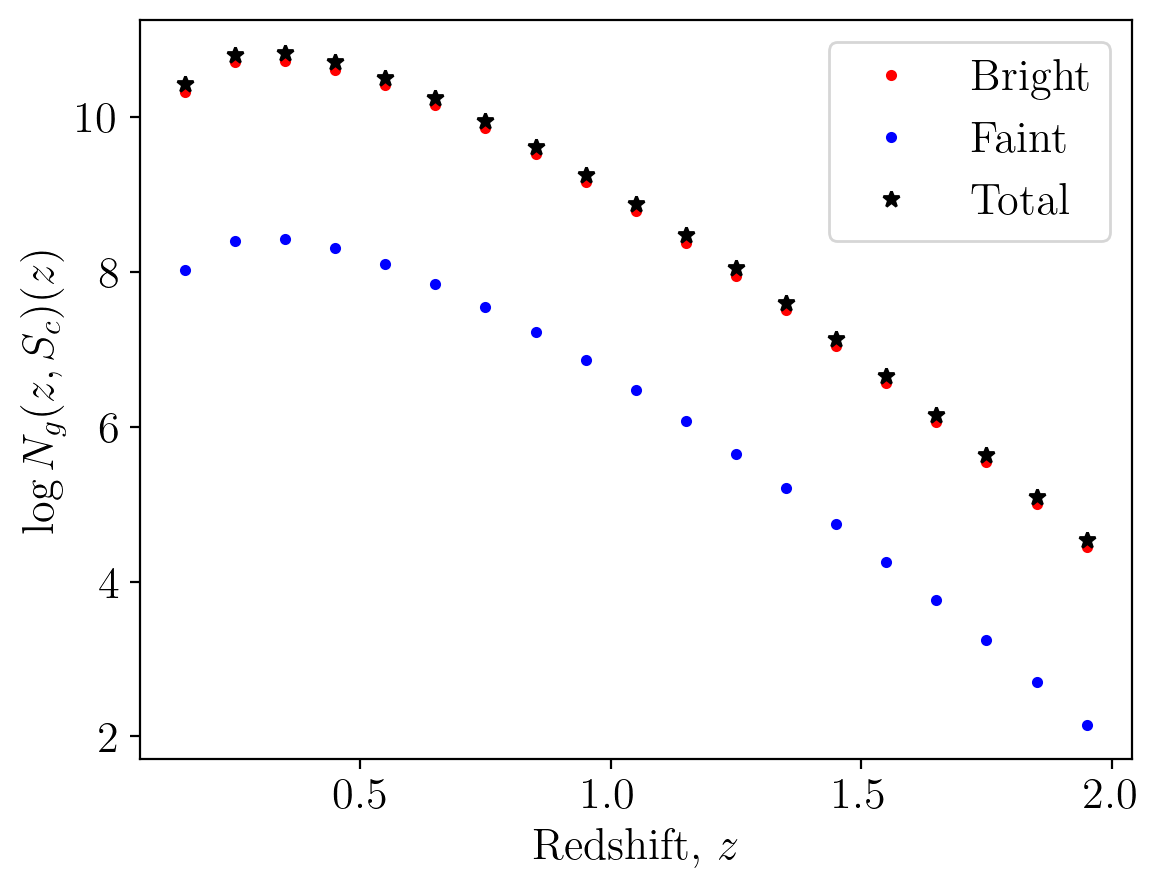

In [87]:
myFluxes = FluxSolver(n_split=1.1)

zbins = np.linspace(0.15, 1.95, 19)

LogN_bright = myFluxes.LogNB_z(zbins)
LogN_faint = myFluxes.LogNF_z(zbins)
LogN = myFluxes.LogN_z(zbins)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

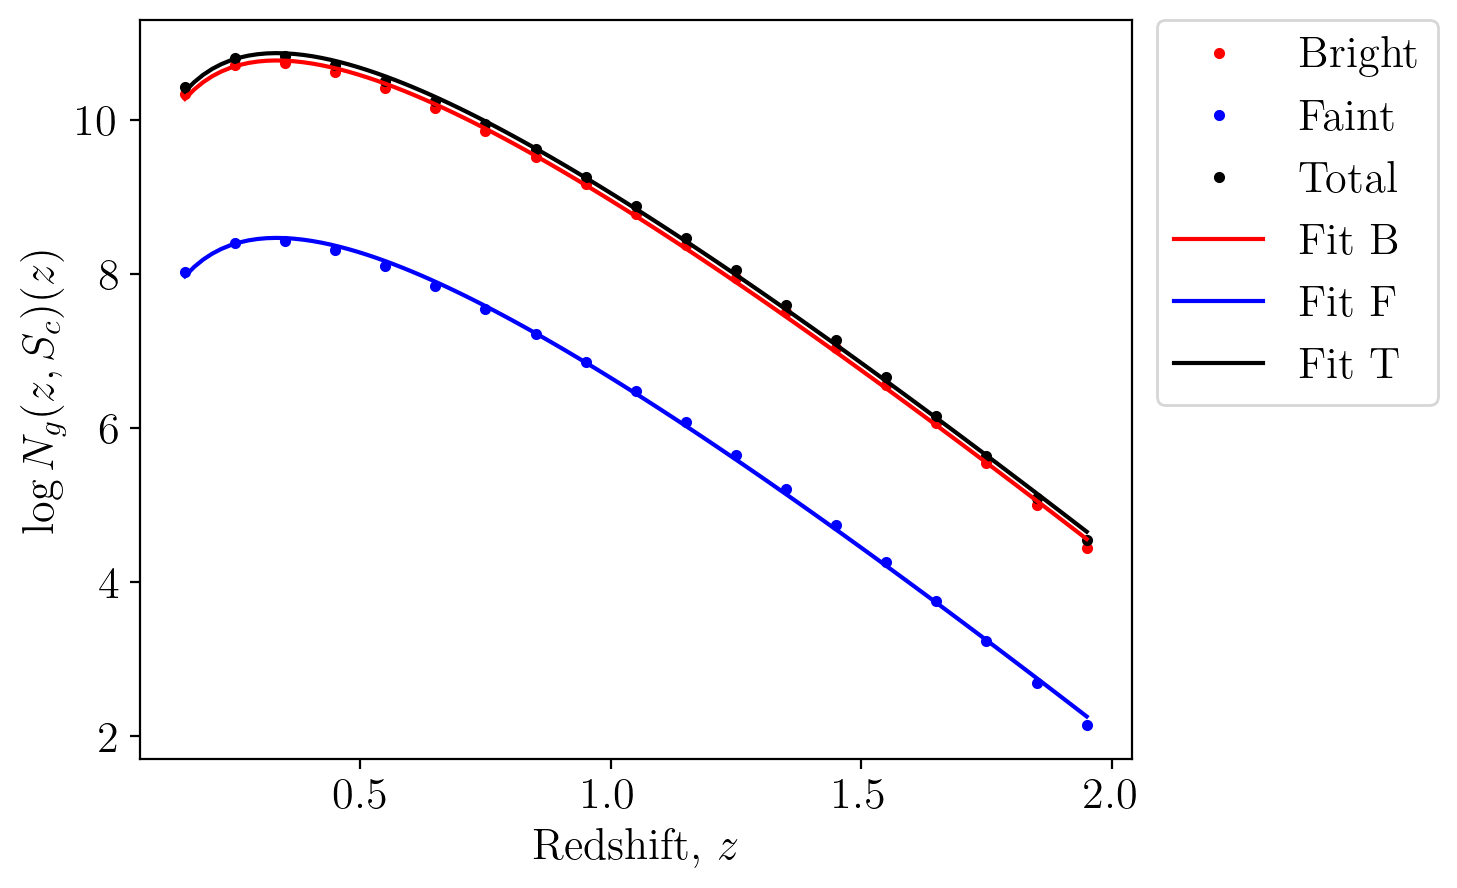

In [88]:
def poly_linlog(x, a, b, c):
    return a + b * x + c * np.log(x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, LogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, LogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, LogN)

zbins_ = np.linspace(0.15, 1.95, 100)


LogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
LogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
LogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k.', label='Total')
plt.plot(zbins_, LogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, LogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, LogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [89]:
print(popt), print(poptB), print(poptF)

[15.09117829 -6.04009428  2.01187384]
[14.99586809 -6.04009426  2.01187382]
[12.69328301 -6.04009428  2.01187383]


(None, None, None)

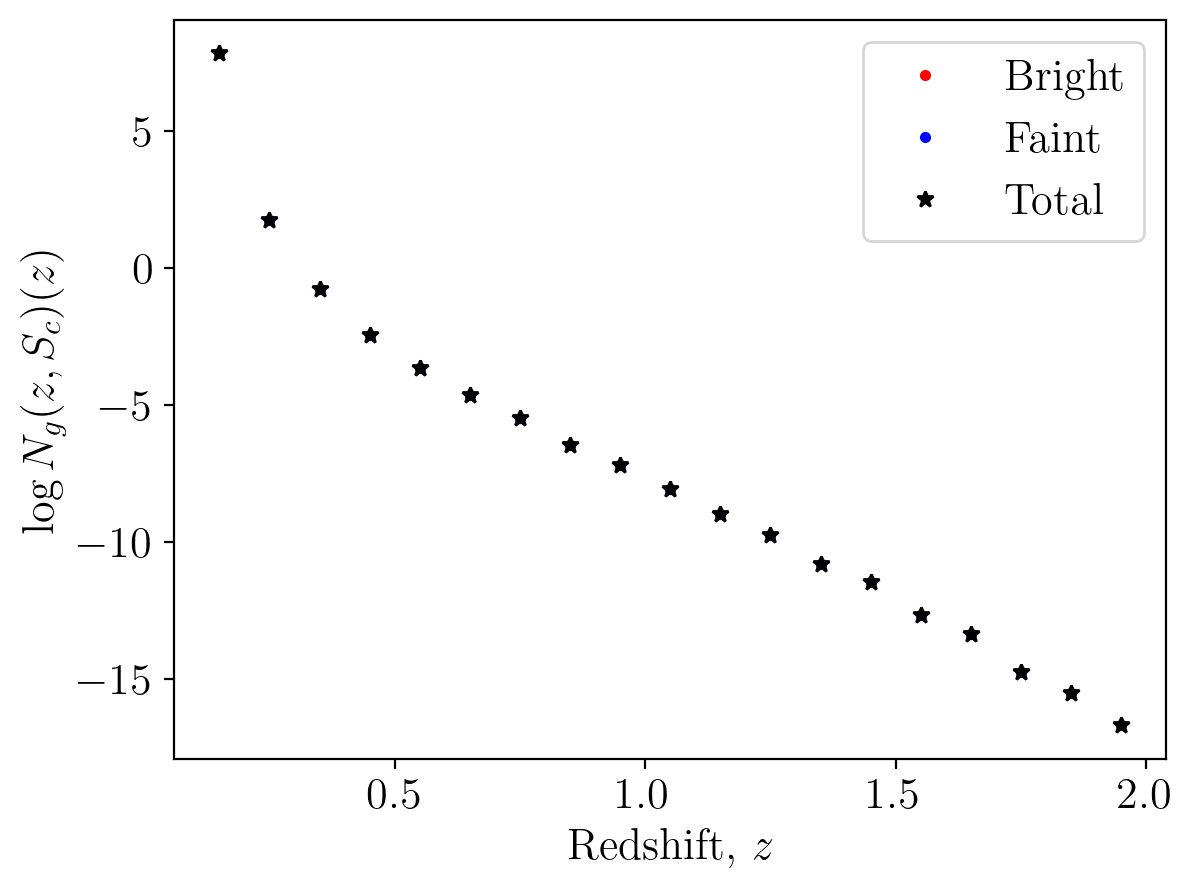

In [90]:
zbins = np.linspace(0.15, 1.95, 19)

dLogN_bright = myFluxes.dLogNB(zbins)
dLogN_faint = myFluxes.dLogNF(zbins)
dLogN = myFluxes.dLogN(zbins)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

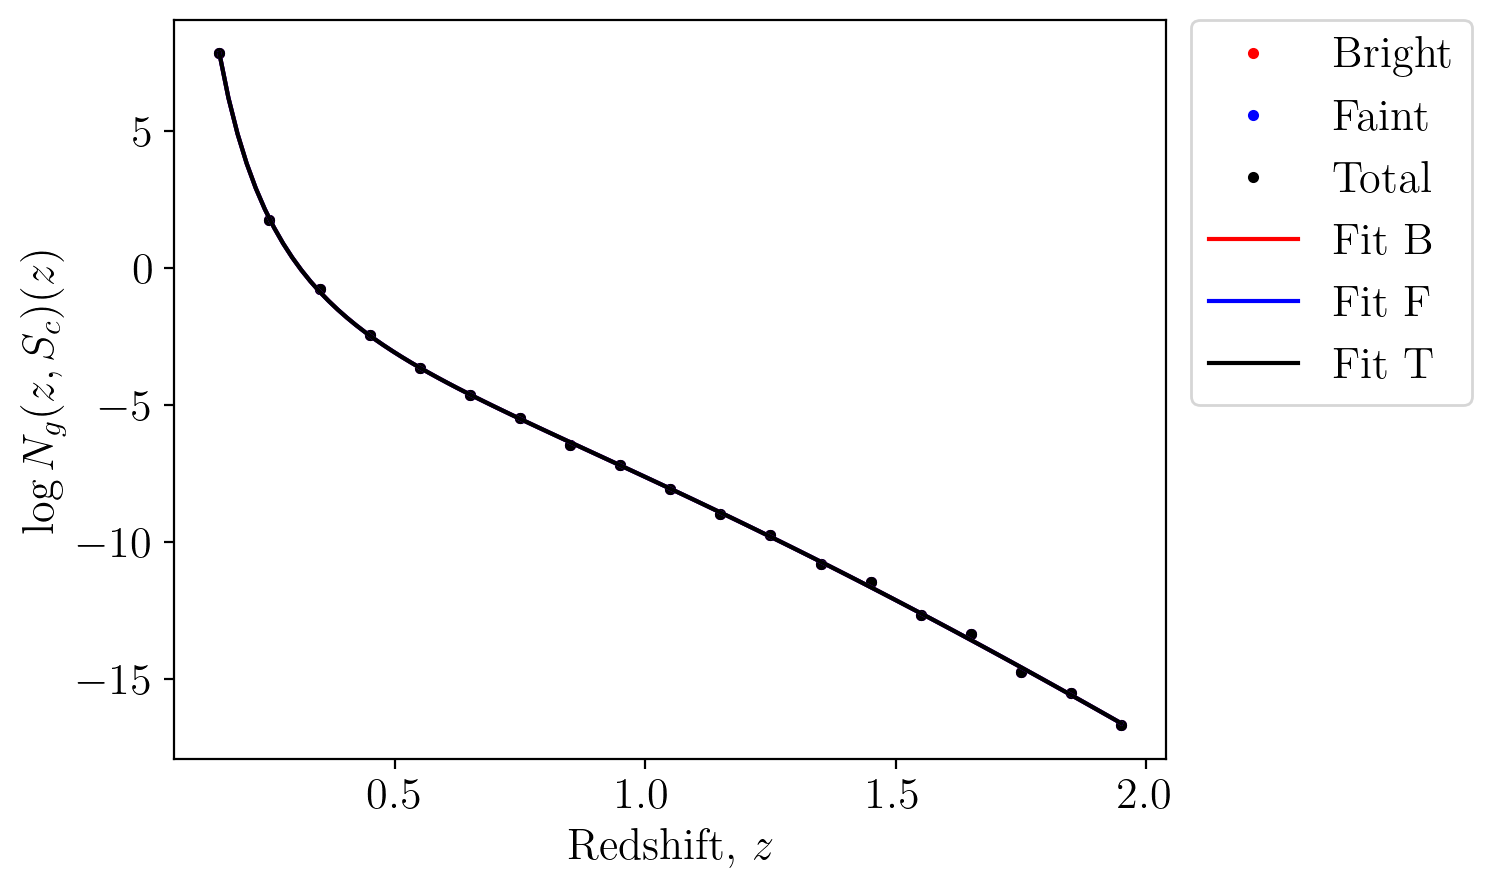

In [91]:
def poly_linlog(x, a, b, c, d):
    return a + b * x + c * (1/x) + d * np.exp(-x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, dLogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, dLogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, dLogN)

zbins_ = np.linspace(0.15, 1.95, 100)


dLogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
dLogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
dLogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k.', label='Total')
plt.plot(zbins_, dLogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, dLogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, dLogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [92]:
print(popt), print(poptB), print(poptF)

[  7.94599872 -12.03752386   2.29927261 -15.83887364]
[  7.94599867 -12.03752384   2.2992726  -15.83887354]
[  7.94599918 -12.03752405   2.2992727  -15.83887458]


(None, None, None)

In [93]:
pcov

array([[ 0.38992531, -0.17746371,  0.02525267, -0.59857259],
       [-0.17746371,  0.08155191, -0.0110888 ,  0.26950797],
       [ 0.02525267, -0.0110888 ,  0.0027264 , -0.044107  ],
       [-0.59857259,  0.26950797, -0.044107  ,  0.94925232]])

## Case with $n_{split} = 10$

In this case, bright galaxies are $1/10$ of the total. 

### Magnification bias

In [30]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c):
    return a + b * x + c * x**2

def poly_linlog(x, a, b, c):
    return c + a * x + b * np.log(x)

def poly_linlog2(x, a, b, c, d):
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

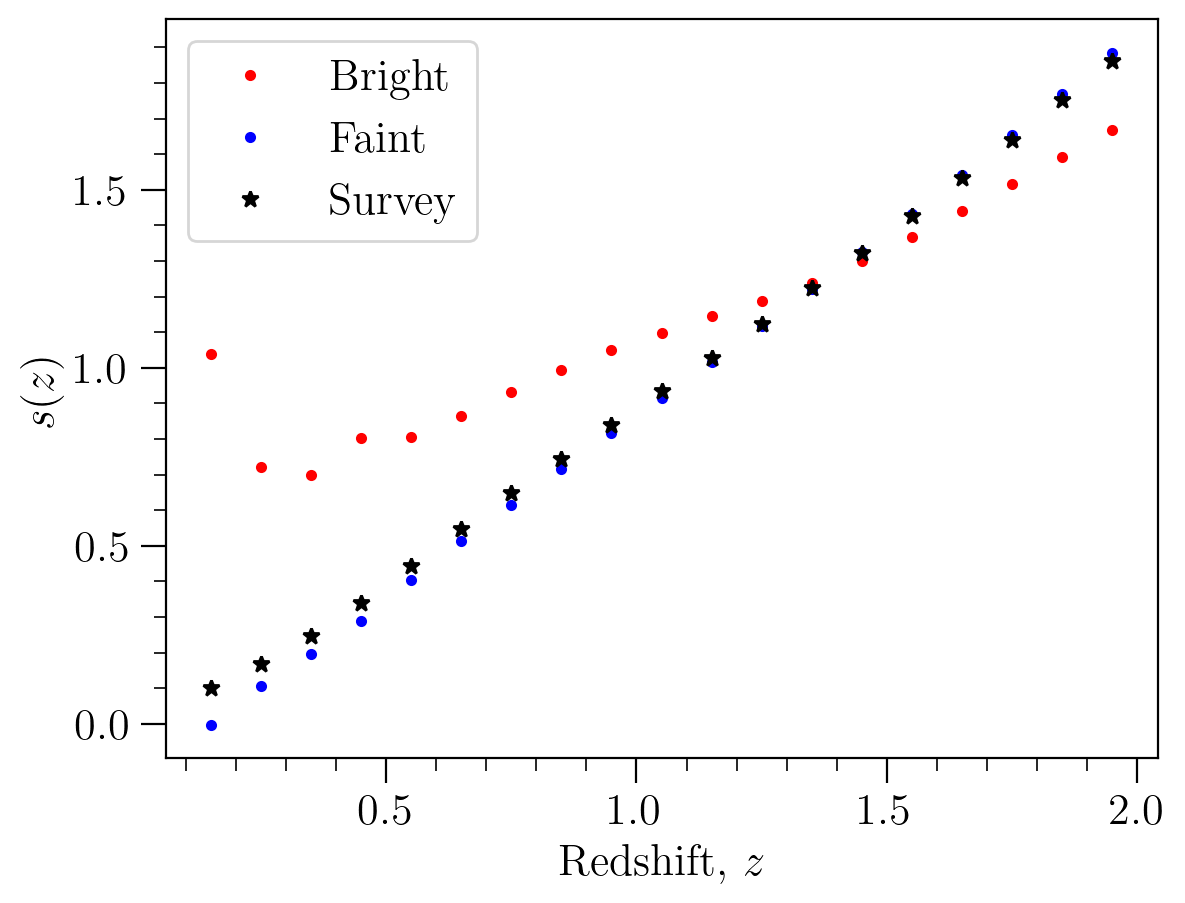

In [31]:
zbins = np.linspace(0.15, 1.95, 19)

myBiases = MagnificationBias(n_split=10.)

sB = myBiases.s_bright(zbins)
sF = myBiases.s_faint(zbins)
smodel = myBiases.s_model(zbins)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$s(z)$')
plt.legend();


In [32]:
sB

array([1.03913831, 0.71999785, 0.70016622, 0.80291617, 0.80509085,
       0.86385634, 0.93133131, 0.99350429, 1.04896737, 1.0983242 ,
       1.14410701, 1.18703114, 1.23676623, 1.29877001, 1.36750798,
       1.44075302, 1.51593195, 1.59199958, 1.66844103])

In [33]:
smodel

array([0.10126775, 0.16794581, 0.24591785, 0.34042118, 0.44359672,
       0.54749941, 0.64724732, 0.74425817, 0.83940737, 0.93348225,
       1.02841809, 1.12429914, 1.2228487 , 1.3231631 , 1.42622787,
       1.53202081, 1.64045919, 1.75174659, 1.86291714])

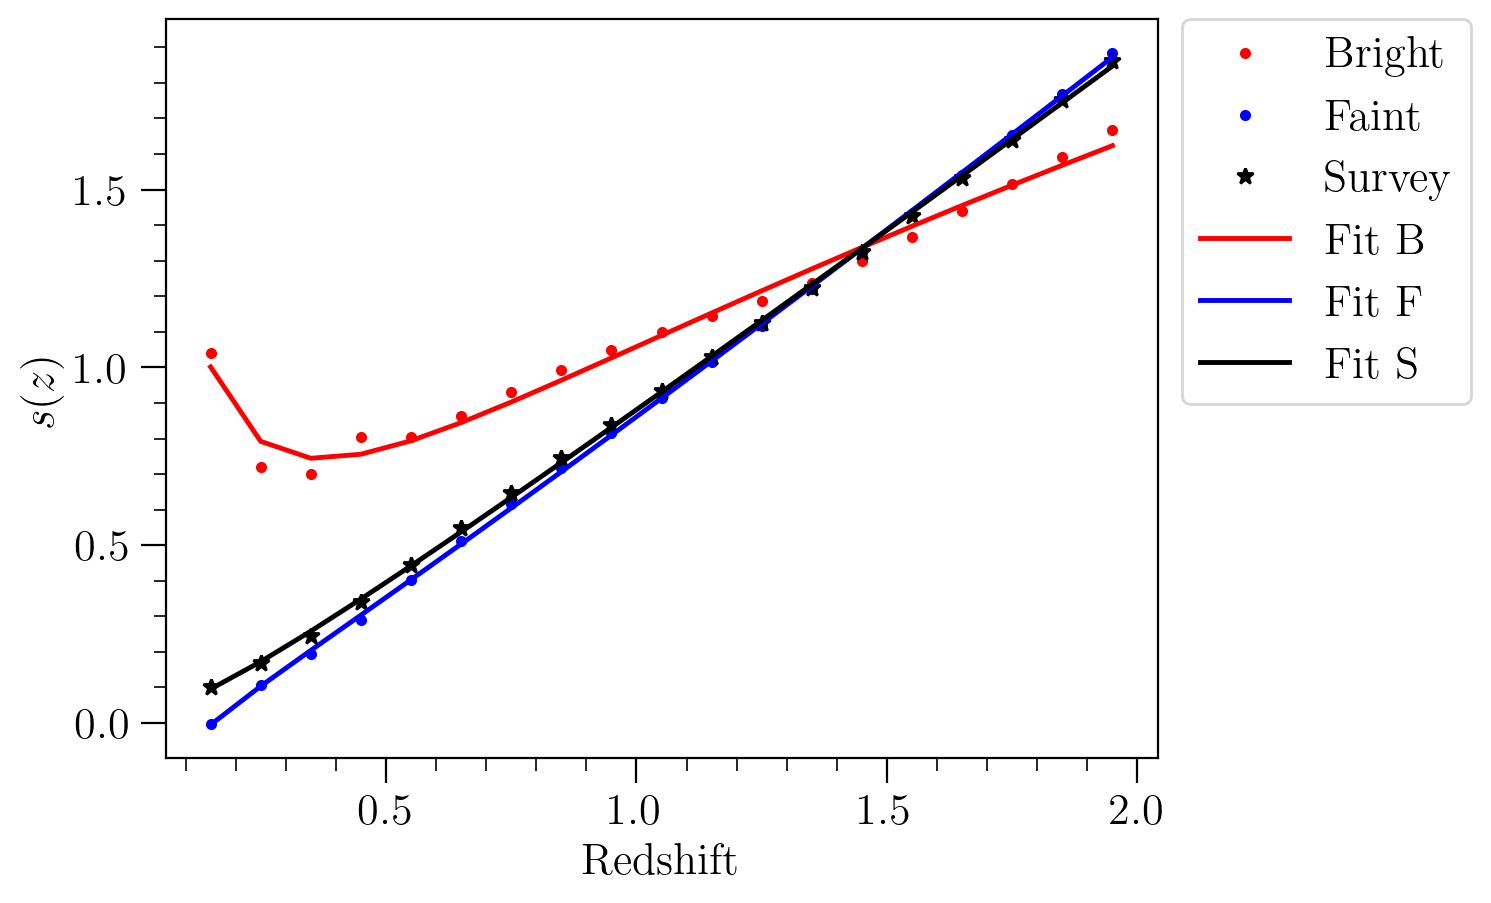

In [34]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, sB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, sF)
popt, pcov = curve_fit(poly_linlog2, zbins, smodel)


sB_predicted = poly_linlog2(np.array(zbins), *poptB)
sF_predicted = poly_linlog2(np.array(zbins), *poptF)
smodel_predictd = poly_linlog2(np.array(zbins), *popt)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')
plt.plot(zbins, sB_predicted, 'r-', label='Fit B')
plt.plot(zbins, sF_predicted, 'b-', label='Fit F')
plt.plot(zbins, smodel_predictd, 'k-', label='Fit S')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$s(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);


In [35]:
print(popt), print(poptB), print(poptF)

[-0.19376092  1.07473357 -0.07806244 -0.00558004]
[1.05341768 0.00485247 0.6281456  0.31643253]
[-0.33233641  1.19360934 -0.15653009 -0.04135924]


(None, None, None)

### Evolution bias

In [36]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3

def poly_linlog(x, a0, a, b, c):
    return a0 + a * x + b * np.log(x) + c * np.exp(x)

def poly_linlog2(x, a0, a, b, c, d):
    return a0 + a * x + b * np.log(x) + c * np.exp(x) + d * (np.log(x))**2
    #return a0 + a * x + b * np.log(x) + d * (np.log(x))**2

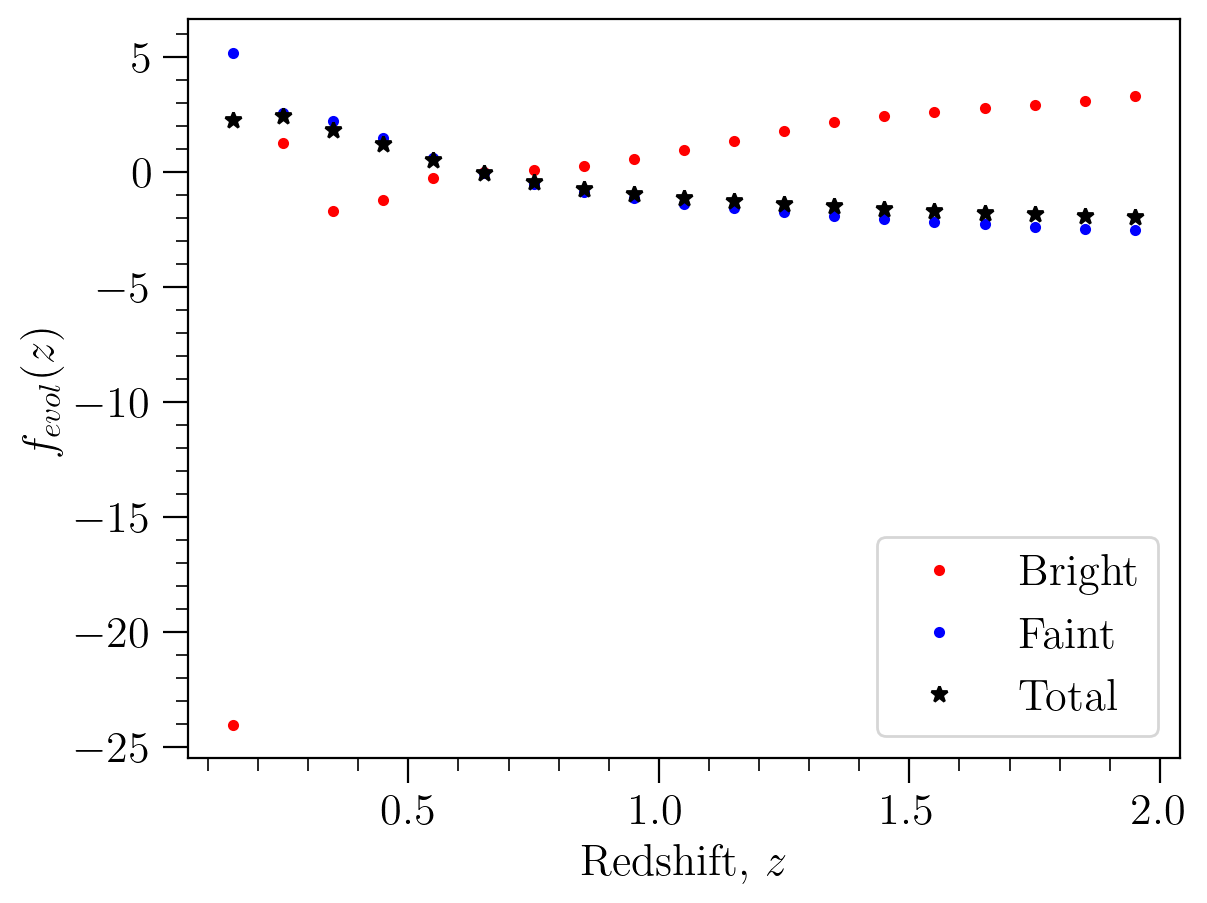

In [37]:
zbins = np.linspace(0.15, 1.95, 19)

myfBiases = EvolutionBias(n_split=10.)

feB = myfBiases.fevol_bright(zbins)
feF = myfBiases.fevol_faint(zbins)
fe = myfBiases.fevol_total(zbins)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$f_{evol}(z)$')
plt.legend();

In [48]:
feB

array([-24.02362577,   1.23631355,  -1.68886235,  -1.2314607 ,
        -0.25657339,  -0.01563204,   0.06640555,   0.27155143,
         0.57179683,   0.94187865,   1.35648053,   1.79696626,
         2.16686823,   2.40966479,   2.59808125,   2.75955326,
         2.92184145,   3.10220004,   3.29514781])

In [49]:
np.format_float_positional(feB[0])


'-24.023625768340658'

In [51]:
feB_ = np.array([float(np.format_float_positional(feB[i])) for i in np.arange(len(feB))])

# Suppress scientific notation in NumPy
np.set_printoptions(suppress=True)

feB_

array([-24.02362577,   1.23631355,  -1.68886235,  -1.2314607 ,
        -0.25657339,  -0.01563204,   0.06640555,   0.27155143,
         0.57179683,   0.94187865,   1.35648053,   1.79696626,
         2.16686823,   2.40966479,   2.59808125,   2.75955326,
         2.92184145,   3.10220004,   3.29514781])

In [52]:
feF

array([ 5.17277222,  2.54206913,  2.22659099,  1.46233479,  0.60197595,
       -0.03827728, -0.50524214, -0.86241689, -1.14009535, -1.37570916,
       -1.57218441, -1.75009982, -1.90570711, -2.03785252, -2.15846779,
       -2.27053596, -2.37692272, -2.47268313, -2.54081985])

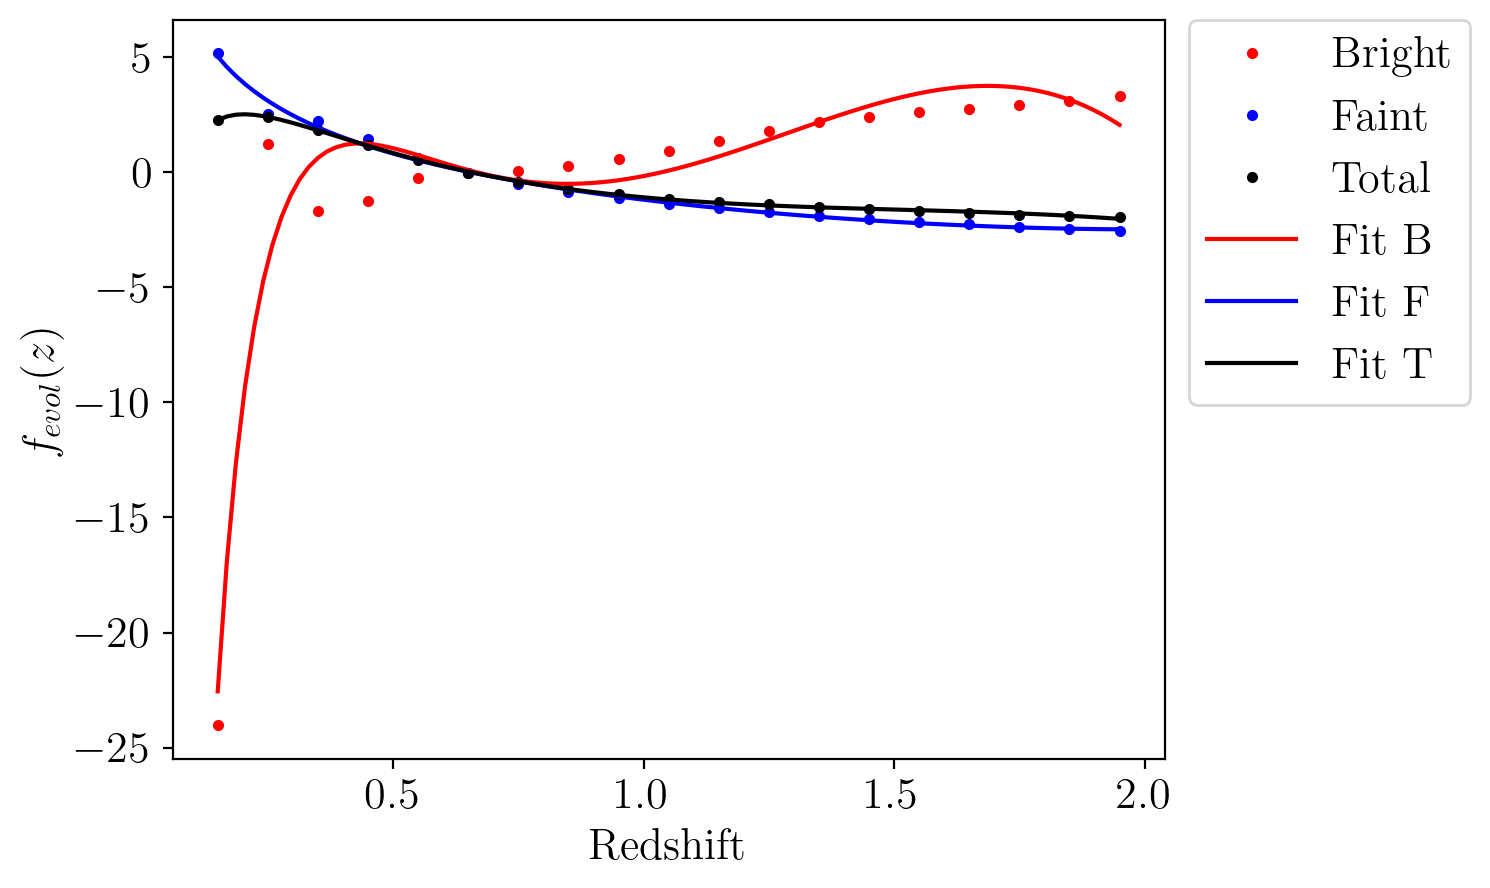

In [106]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, feB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, feF)
popt, pcov = curve_fit(poly_linlog2, zbins, fe)

zbins_ = np.linspace(0.15, 1.95, 100)


feB_predicted = poly_linlog2(np.array(zbins_), *poptB)
feF_predicted = poly_linlog2(np.array(zbins_), *poptF)
fe_predicted = poly_linlog2(np.array(zbins_), *popt)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k.', label='Total')
plt.plot(zbins_, feB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, feF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, fe_predicted, 'k-', label='Fit T')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$f_{evol}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);


In [107]:
print(popt), print(poptB), print(poptF)

[-16.73322399  18.88860736 -17.61467342  -1.19486859  -4.40827881]
[-165.75428526  205.58048377 -161.36537494  -14.71319145  -49.08867878]
[-0.17533087 -1.85493107 -1.64237568  0.30716698  0.55620945]


(None, None, None)

### Number density

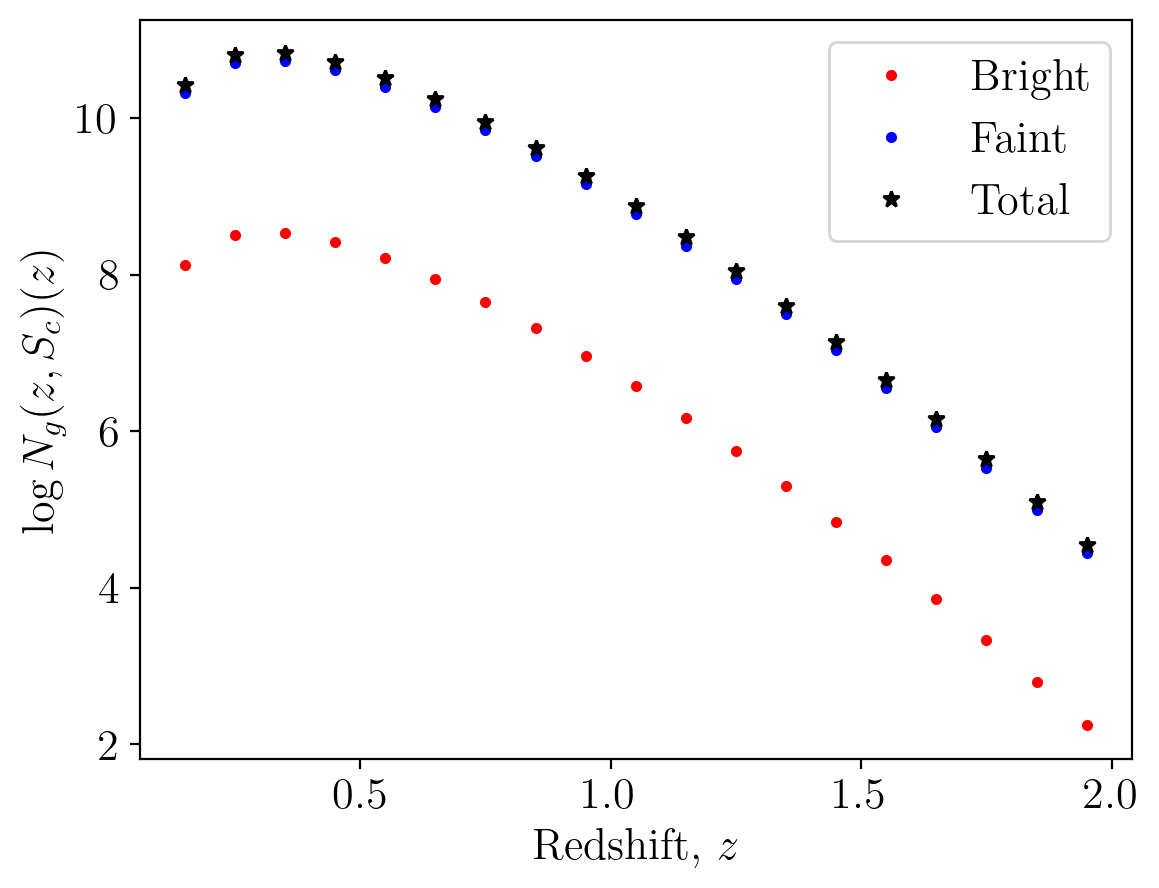

In [108]:
myFluxes = FluxSolver(n_split=10.)

zbins = np.linspace(0.15, 1.95, 19)

LogN_bright = myFluxes.LogNB_z(zbins)
LogN_faint = myFluxes.LogNF_z(zbins)
LogN = myFluxes.LogN_z(zbins)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

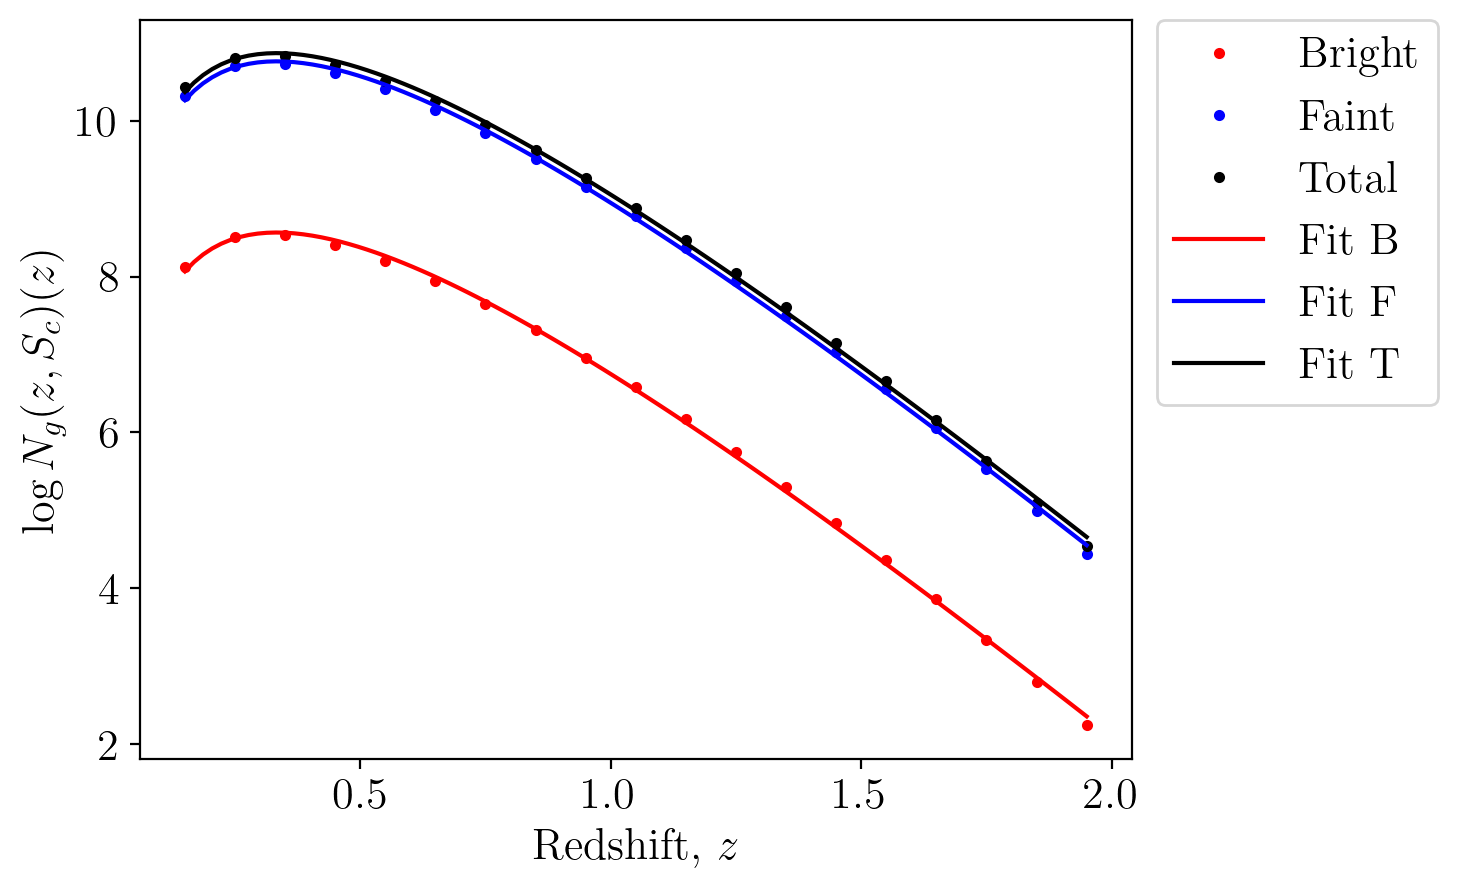

In [109]:
def poly_linlog(x, a, b, c):
    return a + b * x + c * np.log(x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, LogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, LogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, LogN)

zbins_ = np.linspace(0.15, 1.95, 100)


LogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
LogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
LogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k.', label='Total')
plt.plot(zbins_, LogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, LogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, LogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [110]:
print(popt), print(poptB), print(poptF)

[15.09117829 -6.04009428  2.01187384]
[12.78859318 -6.04009427  2.01187382]
[14.98581777 -6.04009428  2.01187383]


(None, None, None)

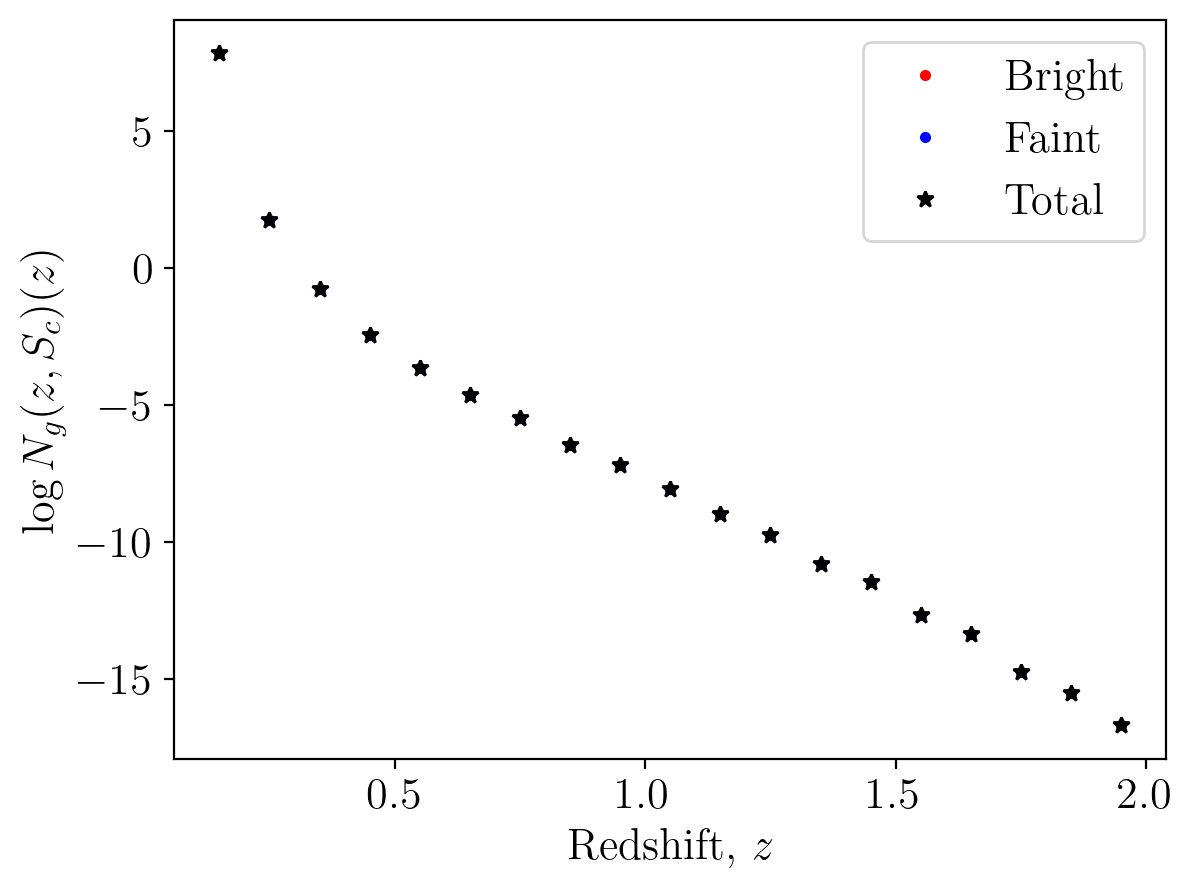

In [111]:
zbins = np.linspace(0.15, 1.95, 19)

dLogN_bright = myFluxes.dLogNB(zbins)
dLogN_faint = myFluxes.dLogNF(zbins)
dLogN = myFluxes.dLogN(zbins)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

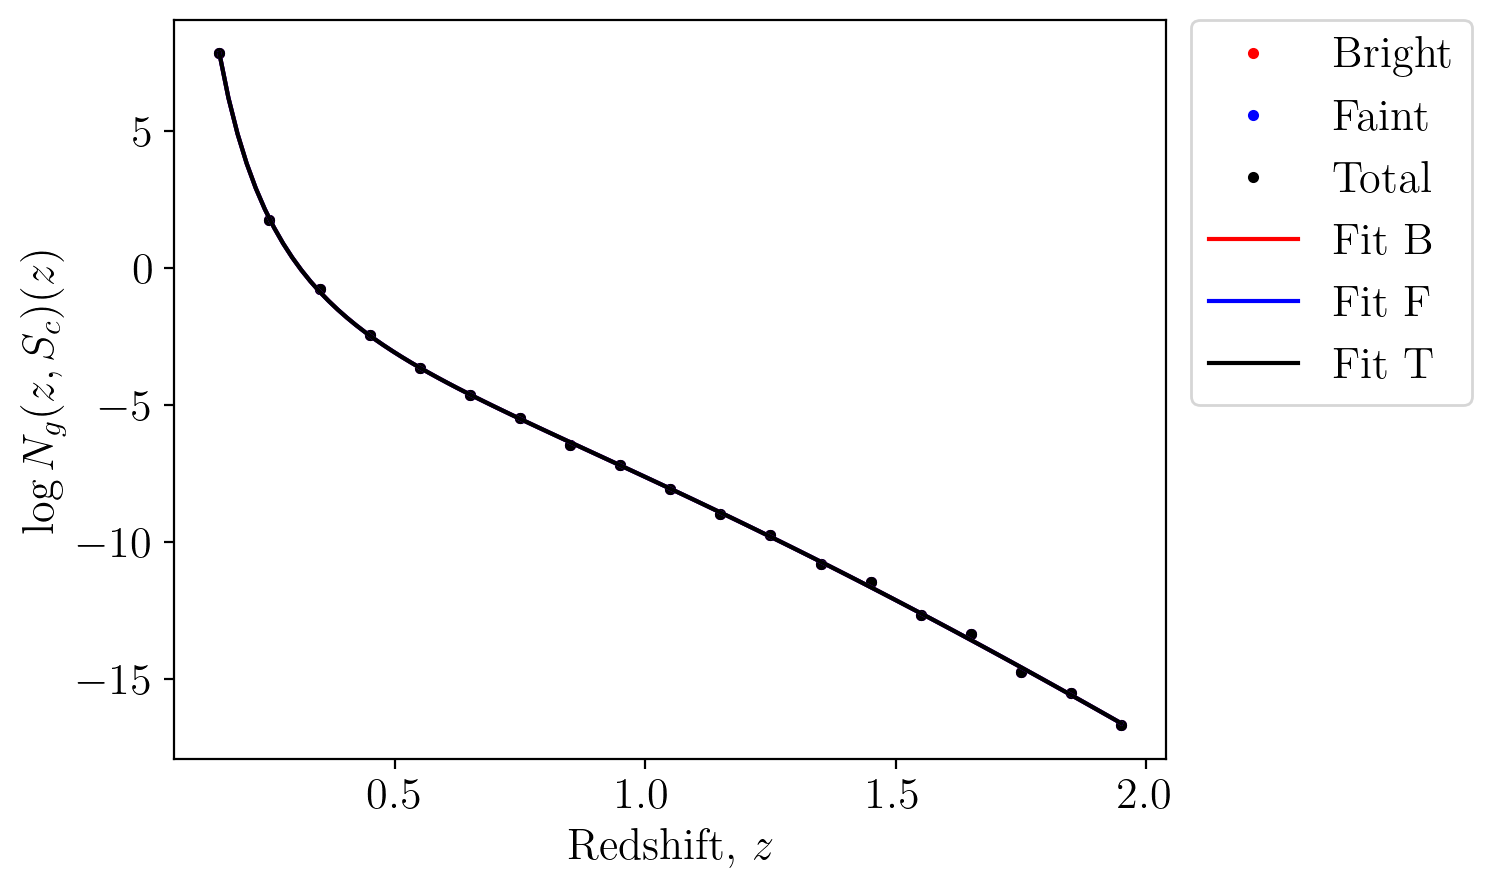

In [112]:
def poly_linlog(x, a, b, c, d):
    return a + b * x + c * (1/x) + d * np.exp(-x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, dLogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, dLogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, dLogN)

zbins_ = np.linspace(0.15, 1.95, 100)


dLogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
dLogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
dLogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k.', label='Total')
plt.plot(zbins_, dLogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, dLogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, dLogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [113]:
print(popt), print(poptB), print(poptF)

[  7.94599872 -12.03752386   2.29927261 -15.83887364]
[  7.94599883 -12.03752391   2.29927262 -15.8388738 ]
[  7.94599868 -12.03752384   2.29927261 -15.83887357]


(None, None, None)

In [114]:
pcov

array([[ 0.38992531, -0.17746371,  0.02525267, -0.59857259],
       [-0.17746371,  0.08155191, -0.0110888 ,  0.26950797],
       [ 0.02525267, -0.0110888 ,  0.0027264 , -0.044107  ],
       [-0.59857259,  0.26950797, -0.044107  ,  0.94925232]])

## Case with $n_{split} = 10/9$

In this case, bright galaxies are $9/10$ of the total. 

### Magnification bias

In [115]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c):
    return a + b * x + c * x**2

def poly_linlog(x, a, b, c):
    return c + a * x + b * np.log(x)

def poly_linlog2(x, a, b, c, d):
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

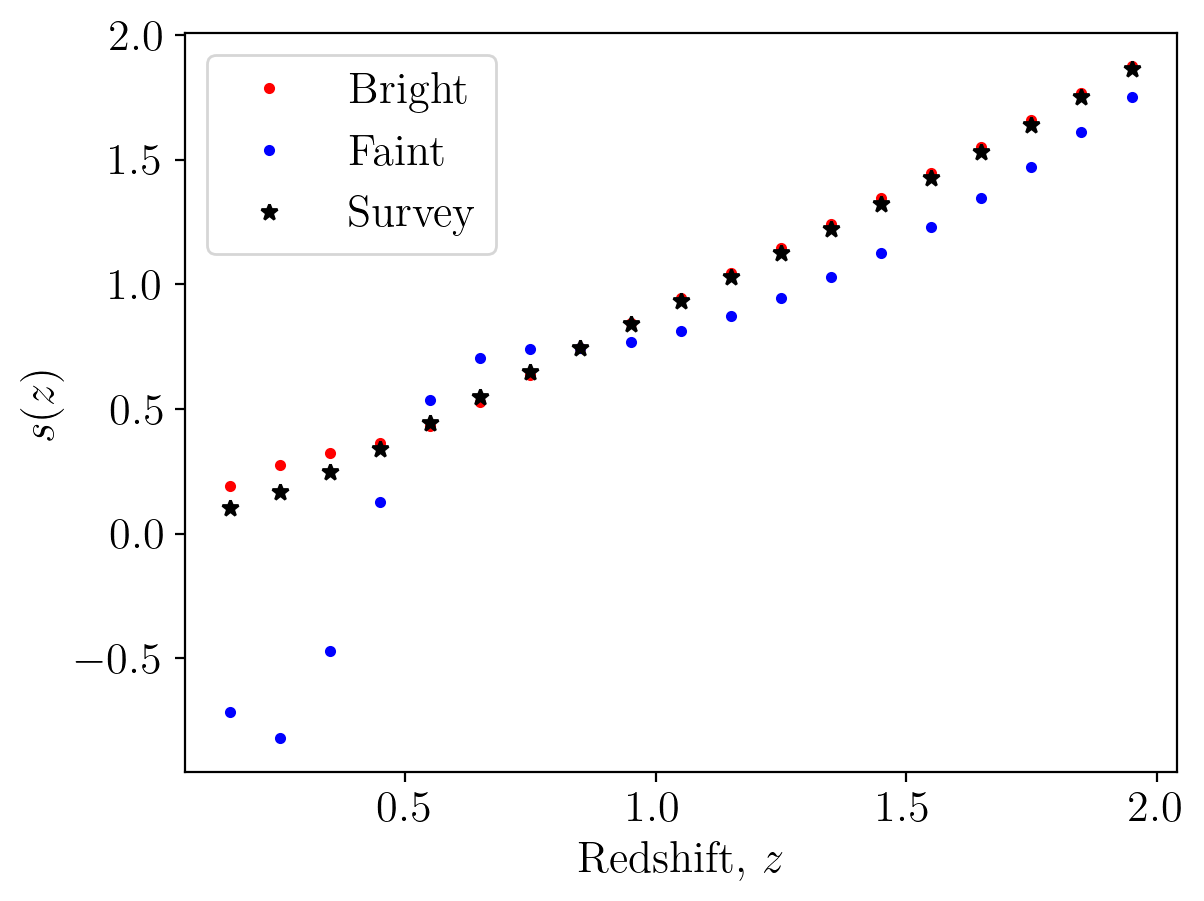

In [116]:
zbins = np.linspace(0.15, 1.95, 19)

myBiases = MagnificationBias(n_split=10/9.)

sB = myBiases.s_bright(zbins)
sF = myBiases.s_faint(zbins)
smodel = myBiases.s_model(zbins)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$s(z)$')
plt.legend();


In [117]:
sB

array([0.19203371, 0.27768186, 0.32537169, 0.36427982, 0.43344703,
       0.53022351, 0.63687381, 0.74431781, 0.84709448, 0.94705308,
       1.04578317, 1.14430064, 1.24416631, 1.34507144, 1.44787822,
       1.55260033, 1.6591283 , 1.76745351, 1.87535129])

In [118]:
smodel

array([0.10126775, 0.16794581, 0.24591785, 0.34042118, 0.44359672,
       0.54749941, 0.64724732, 0.74425817, 0.83940737, 0.93348225,
       1.02841809, 1.12429914, 1.2228487 , 1.3231631 , 1.42622787,
       1.53202081, 1.64045919, 1.75174659, 1.86291714])

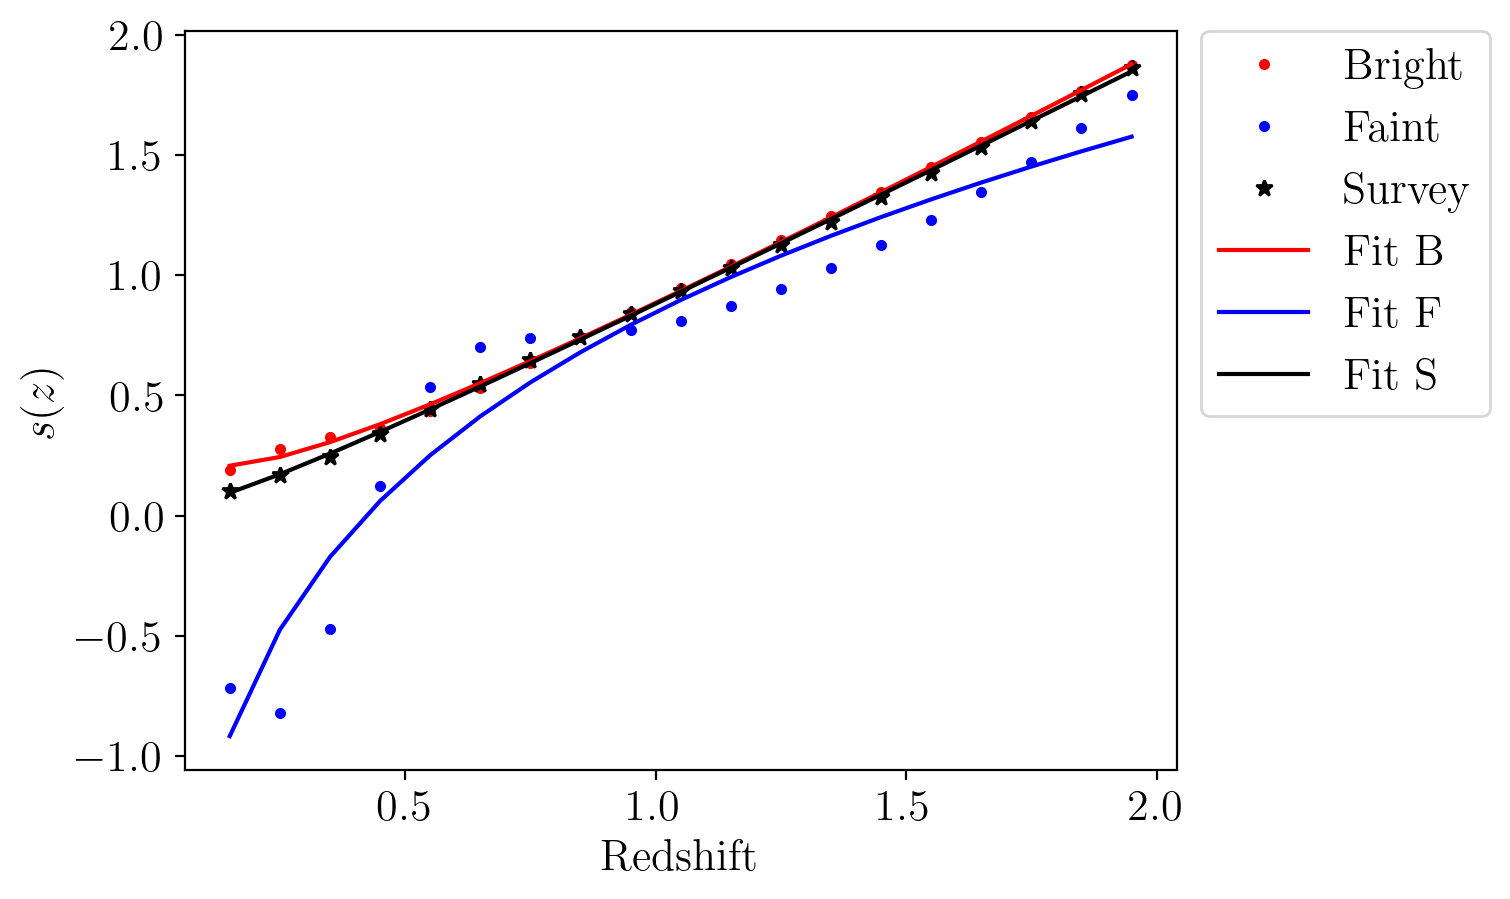

In [119]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, sB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, sF)
popt, pcov = curve_fit(poly_linlog2, zbins, smodel)


sB_predicted = poly_linlog2(np.array(zbins), *poptB)
sF_predicted = poly_linlog2(np.array(zbins), *poptF)
smodel_predictd = poly_linlog2(np.array(zbins), *popt)

plt.plot(zbins, sB, 'r.', label='Bright')
plt.plot(zbins, sF, 'b.', label='Faint')
plt.plot(zbins, smodel, 'k*', label='Survey')
plt.plot(zbins, sB_predicted, 'r-', label='Fit B')
plt.plot(zbins, sF_predicted, 'b-', label='Fit F')
plt.plot(zbins, smodel_predictd, 'k-', label='Fit S')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$s(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);


In [120]:
print(popt), print(poptB), print(poptF)

[-0.19376092  1.07473357 -0.07806244 -0.00558004]
[-0.29907484  1.18392153 -0.19145767 -0.00941003]
[0.75406355 0.09204267 0.94249391 0.02888967]


(None, None, None)

### Evolution bias

In [121]:
from scipy.optimize import curve_fit

def poly_lin(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3

def poly_linlog(x, a0, a, b, c):
    return a0 + a * x + b * np.log(x) + c * np.exp(x)

def poly_linlog2(x, a0, a, b, c, d):
    return a0 + a * x + b * np.log(x) + c * np.exp(x) + d * (np.log(x))**2
    #return a0 + a * x + b * np.log(x) + d * (np.log(x))**2

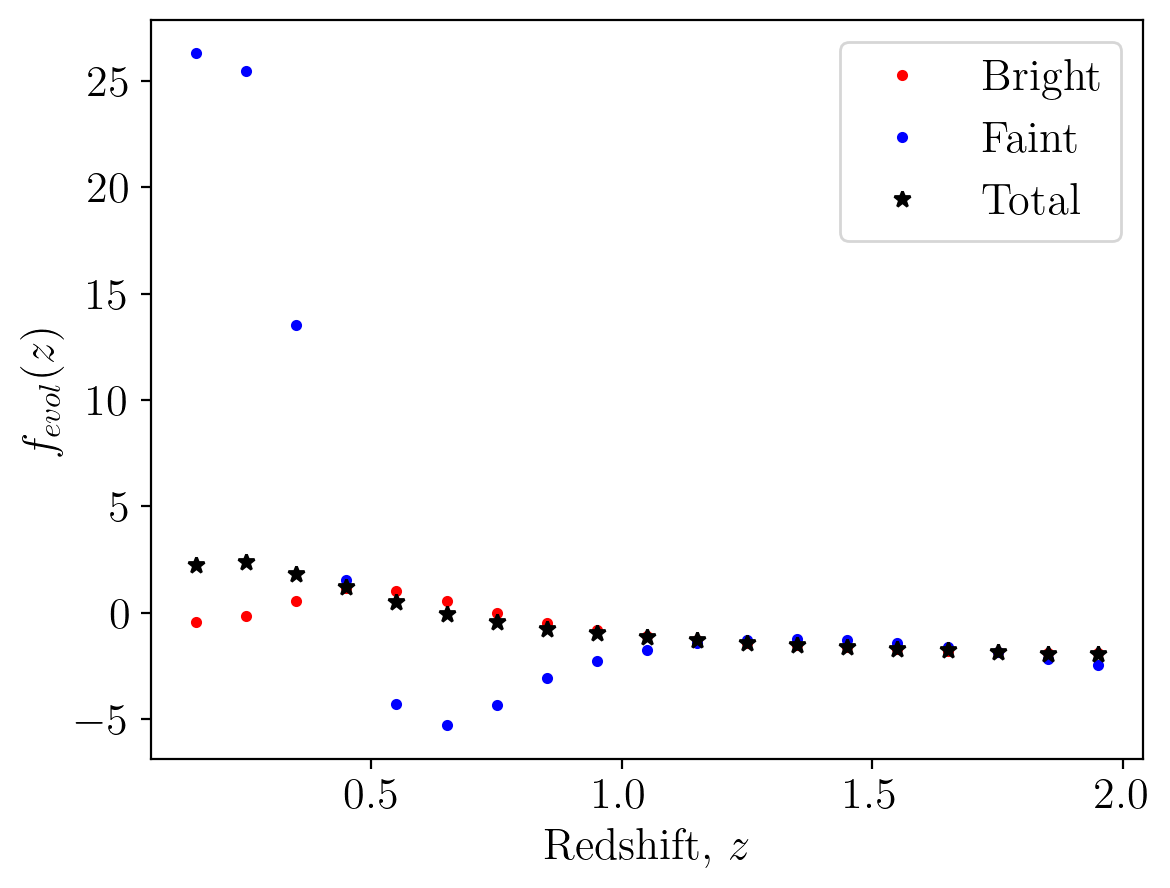

In [122]:
zbins = np.linspace(0.15, 1.95, 19)

myfBiases = EvolutionBias(n_split=10/9.)

feB = myfBiases.fevol_bright(zbins)
feF = myfBiases.fevol_faint(zbins)
fe = myfBiases.fevol_total(zbins)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$f_{evol}(z)$')
plt.legend();

In [123]:
fe

array([ 2.25313242,  2.41149357,  1.83504565,  1.19295524,  0.51612102,
       -0.03601276, -0.44807737, -0.74902006, -0.96890613, -1.14395038,
       -1.27931792, -1.39539321, -1.49844957, -1.59310079, -1.68281289,
       -1.76752704, -1.84704631, -1.91519482, -1.95722309])

In [124]:
feB

array([-0.420583  , -0.15150293,  0.53657932,  1.15229454,  1.04769618,
        0.54662079, -0.01541733, -0.48929458, -0.82300933, -1.07866902,
       -1.2621648 , -1.40936844, -1.52682923, -1.62720927, -1.71364636,
       -1.78708362, -1.84769933, -1.88775017, -1.90019888])

In [125]:
feF

array([26.31657122, 25.47846203, 13.52124266,  1.55890159, -4.26805543,
       -5.27971466, -4.34201776, -3.08654937, -2.28197733, -1.73148262,
       -1.43369597, -1.2696161 , -1.2430327 , -1.28612442, -1.40531164,
       -1.59151781, -1.84116907, -2.16219663, -2.47044096])

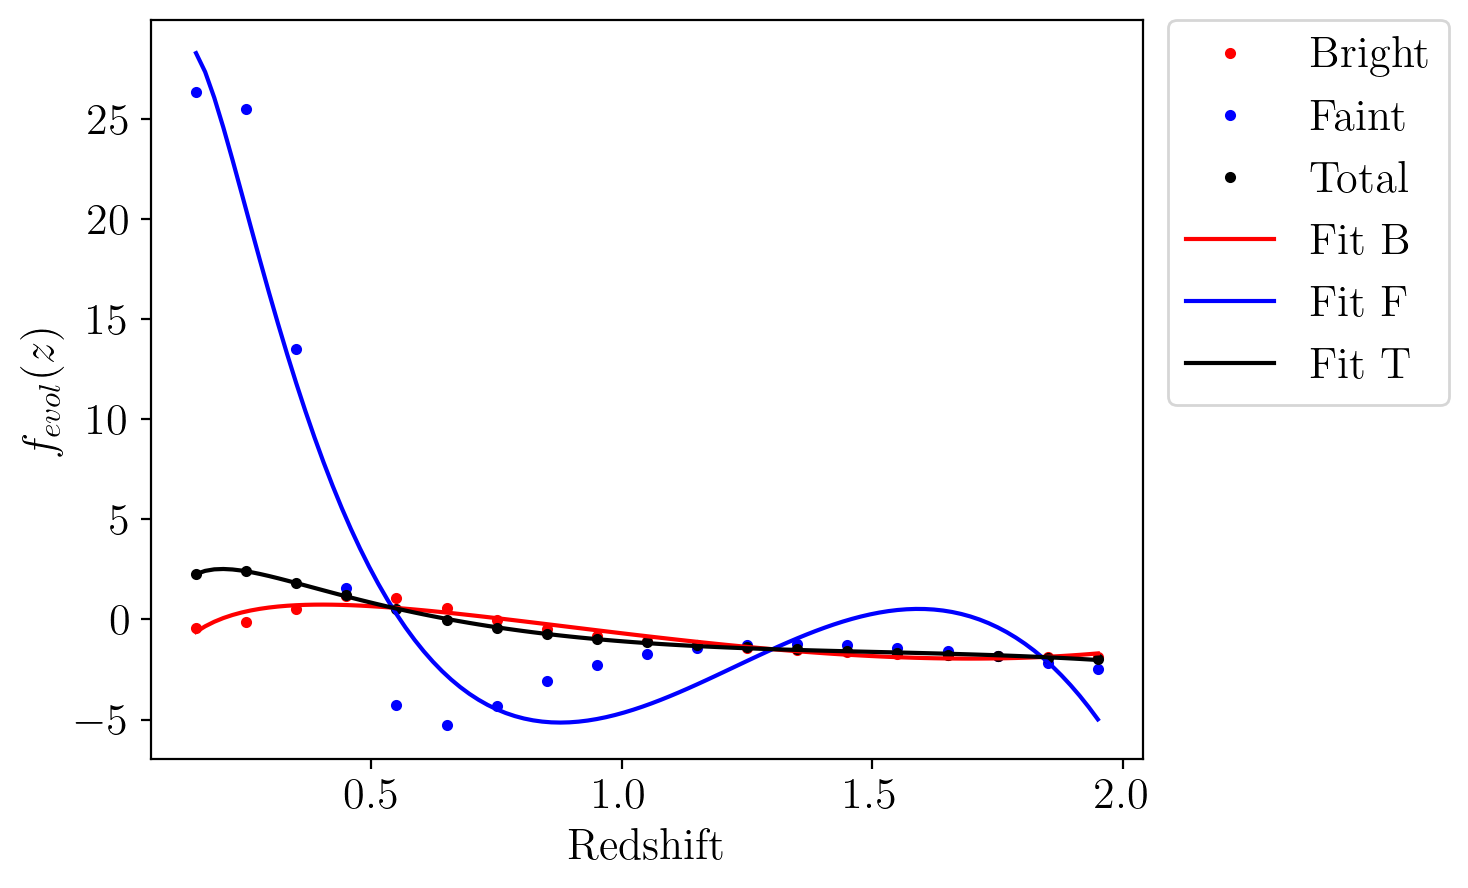

In [126]:
from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog2, zbins, feB)
poptF, pcovF = curve_fit(poly_linlog2, zbins, feF)
popt, pcov = curve_fit(poly_linlog2, zbins, fe)

zbins_ = np.linspace(0.15, 1.95, 100)


feB_predicted = poly_linlog2(np.array(zbins_), *poptB)
feF_predicted = poly_linlog2(np.array(zbins_), *poptF)
fe_predicted = poly_linlog2(np.array(zbins_), *popt)

plt.plot(zbins, feB, 'r.', label='Bright')
plt.plot(zbins, feF, 'b.', label='Faint')
plt.plot(zbins, fe, 'k.', label='Total')
plt.plot(zbins_, feB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, feF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, fe_predicted, 'k-', label='Fit T')

plt.xlabel(r'$\textrm{Redshift}$')
plt.ylabel(r'$f_{evol}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);


In [127]:
print(popt), print(poptB), print(poptF)

[-16.73322399  18.88860736 -17.61467342  -1.19486859  -4.40827881]
[ 3.83477965 -8.46367221  1.54980225  1.44762756 -0.53723707]
[-201.84527067  265.05914094 -190.09496783  -24.97733531  -39.24765806]


(None, None, None)

### Number density

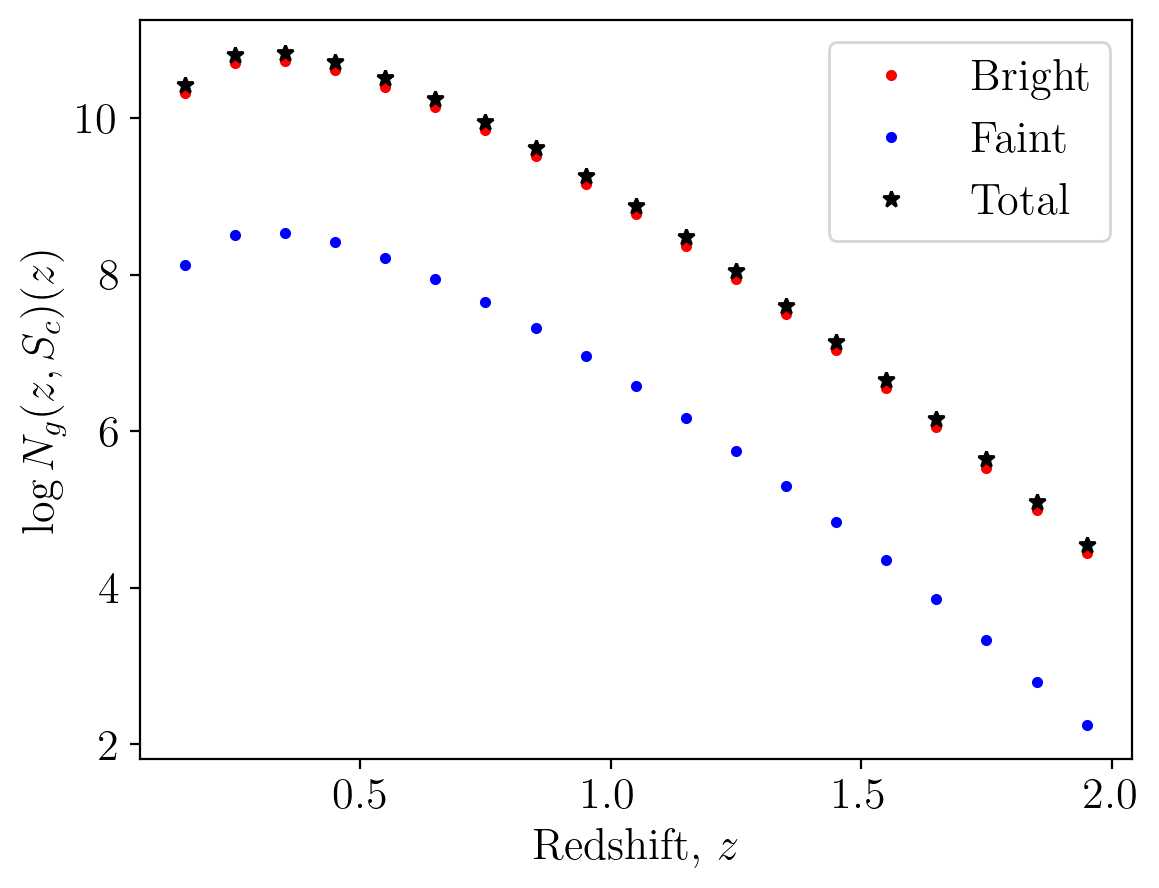

In [128]:
myFluxes = FluxSolver(n_split=10/9.)

zbins = np.linspace(0.15, 1.95, 19)

LogN_bright = myFluxes.LogNB_z(zbins)
LogN_faint = myFluxes.LogNF_z(zbins)
LogN = myFluxes.LogN_z(zbins)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

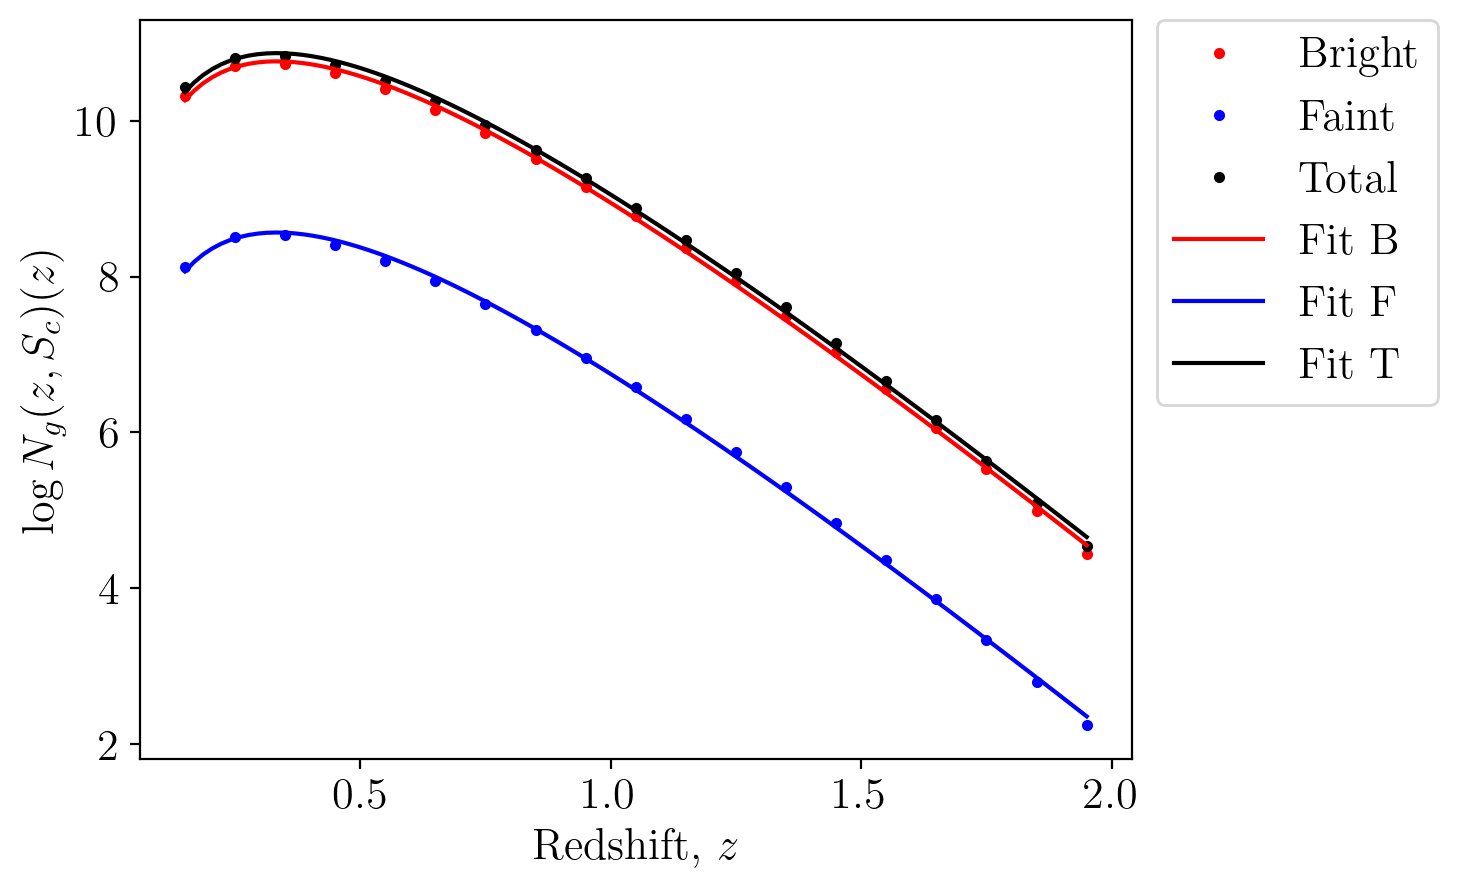

In [129]:
def poly_linlog(x, a, b, c):
    return a + b * x + c * np.log(x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, LogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, LogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, LogN)

zbins_ = np.linspace(0.15, 1.95, 100)


LogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
LogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
LogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, LogN_bright, 'r.', label='Bright')
plt.plot(zbins, LogN_faint, 'b.', label='Faint')
plt.plot(zbins, LogN, 'k.', label='Total')
plt.plot(zbins_, LogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, LogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, LogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [130]:
print(popt), print(poptB), print(poptF)

[15.09117829 -6.04009428  2.01187384]
[14.98581777 -6.04009427  2.01187383]
[12.78859319 -6.04009428  2.01187383]


(None, None, None)

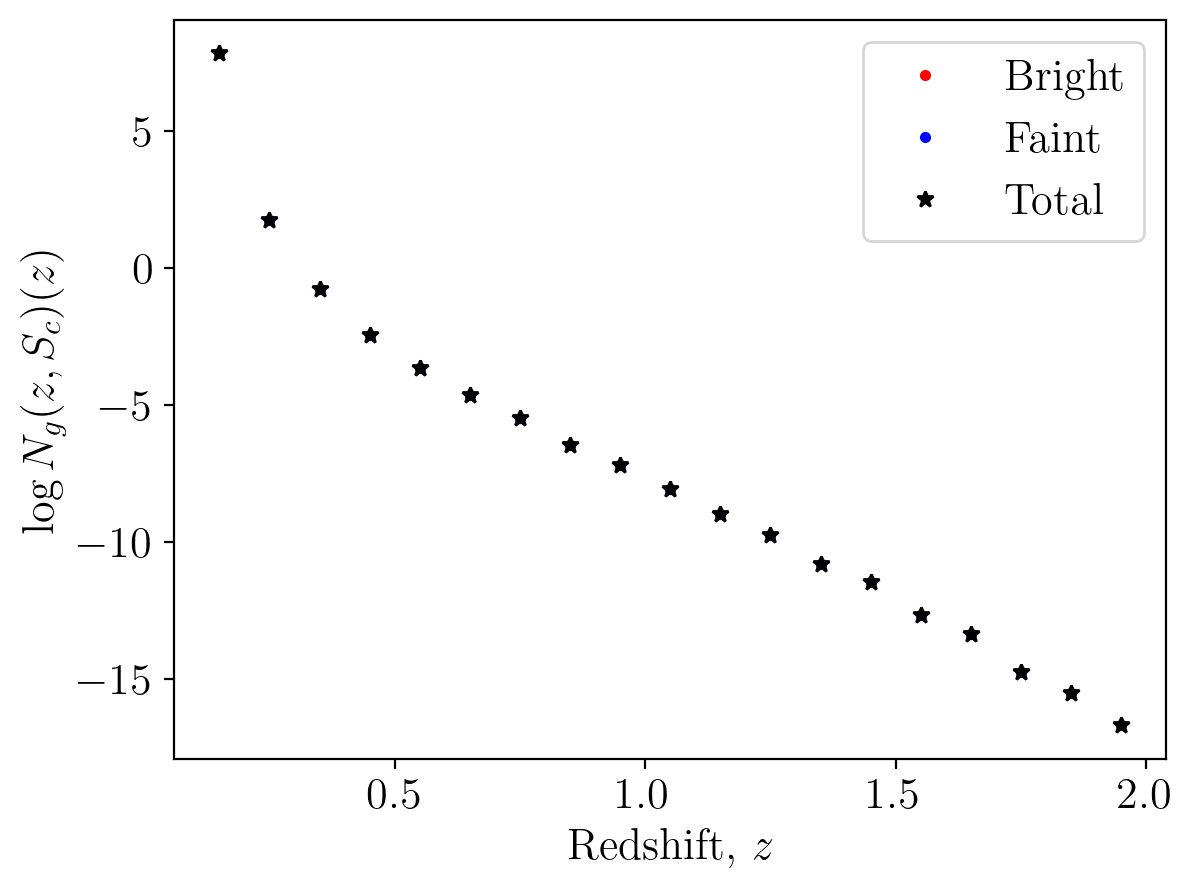

In [131]:
zbins = np.linspace(0.15, 1.95, 19)

dLogN_bright = myFluxes.dLogNB(zbins)
dLogN_faint = myFluxes.dLogNF(zbins)
dLogN = myFluxes.dLogN(zbins)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k*', label = 'Total')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend();

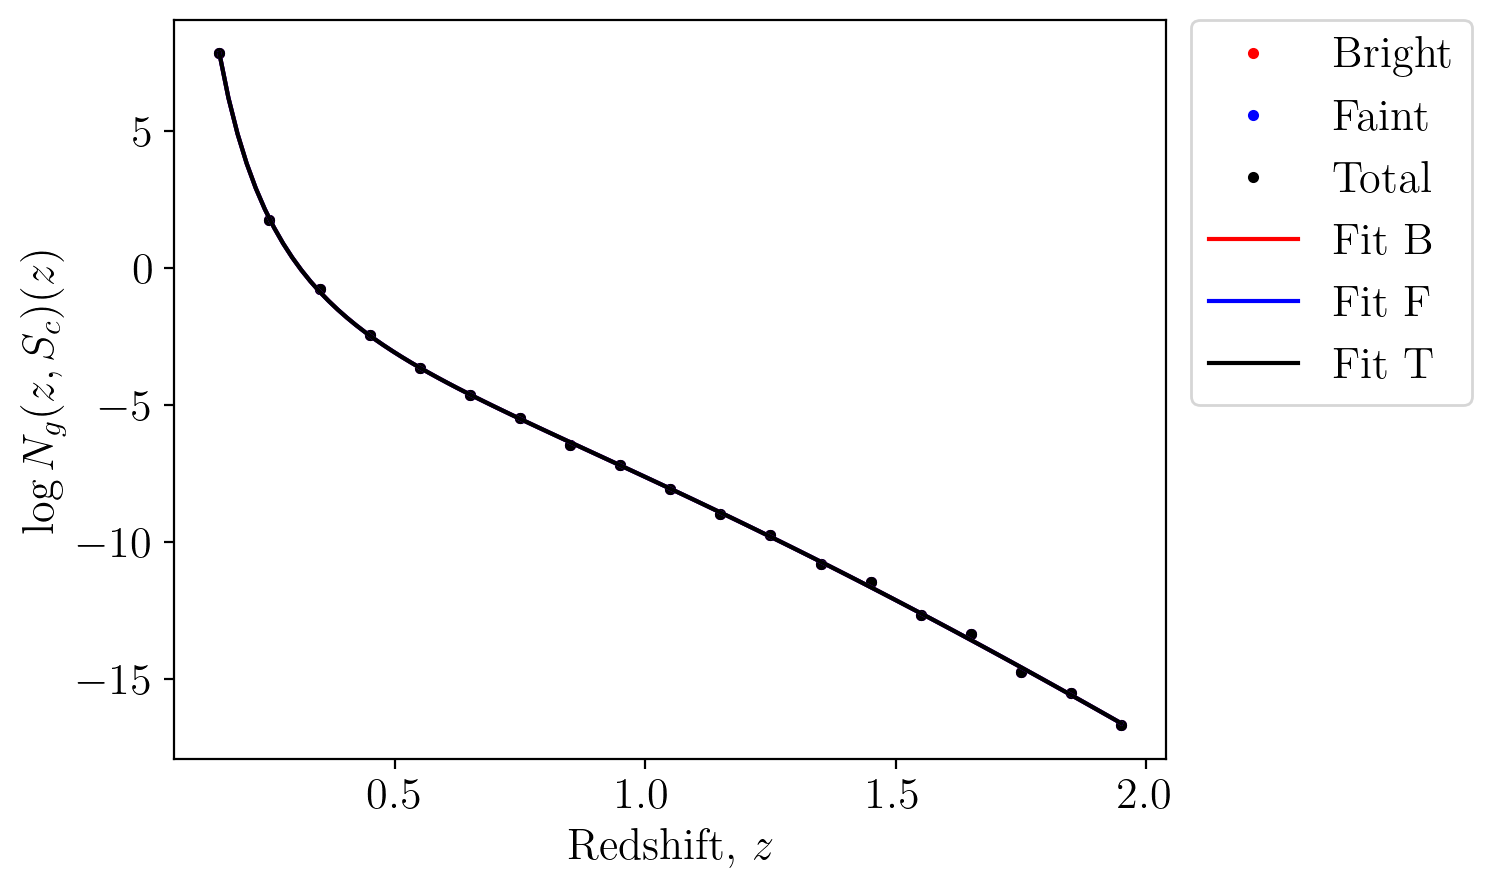

In [132]:
def poly_linlog(x, a, b, c, d):
    return a + b * x + c * (1/x) + d * np.exp(-x)

from scipy.optimize import curve_fit

poptB, pcovB = curve_fit(poly_linlog, zbins, dLogN_bright)
poptF, pcovF = curve_fit(poly_linlog, zbins, dLogN_faint)
popt, pcov = curve_fit(poly_linlog, zbins, dLogN)

zbins_ = np.linspace(0.15, 1.95, 100)


dLogNB_predicted = poly_linlog(np.array(zbins_), *poptB)
dLogNF_predicted = poly_linlog(np.array(zbins_), *poptF)
dLogN_predicted = poly_linlog(np.array(zbins_), *popt)

plt.plot(zbins, dLogN_bright, 'r.', label='Bright')
plt.plot(zbins, dLogN_faint, 'b.', label='Faint')
plt.plot(zbins, dLogN, 'k.', label='Total')
plt.plot(zbins_, dLogNB_predicted, 'r-', label='Fit B')
plt.plot(zbins_, dLogNF_predicted, 'b-', label='Fit F')
plt.plot(zbins_, dLogN_predicted, 'k-', label='Fit T')

plt.xlabel(r'Redshift, $z$')
plt.ylabel(r'$\log{N_g(z,S_c)}(z)$')
plt.legend(bbox_to_anchor=(1.025, 1.), loc='upper left', borderaxespad=0.);

In [133]:
print(popt), print(poptB), print(poptF)

[  7.94599872 -12.03752386   2.29927261 -15.83887364]
[  7.94599861 -12.03752381   2.2992726  -15.83887346]
[  7.94599888 -12.03752393   2.29927263 -15.83887392]


(None, None, None)

In [134]:
pcov

array([[ 0.38992531, -0.17746371,  0.02525267, -0.59857259],
       [-0.17746371,  0.08155191, -0.0110888 ,  0.26950797],
       [ 0.02525267, -0.0110888 ,  0.0027264 , -0.044107  ],
       [-0.59857259,  0.26950797, -0.044107  ,  0.94925232]])

### Galaxy bias

In [135]:
myGalaxyBs_50x50 = GalaxyBiasMultiSplit(n_split=2., delta=1.)
myGalaxyBs_30x70 = GalaxyBiasMultiSplit(n_split=10/3., delta=1.)

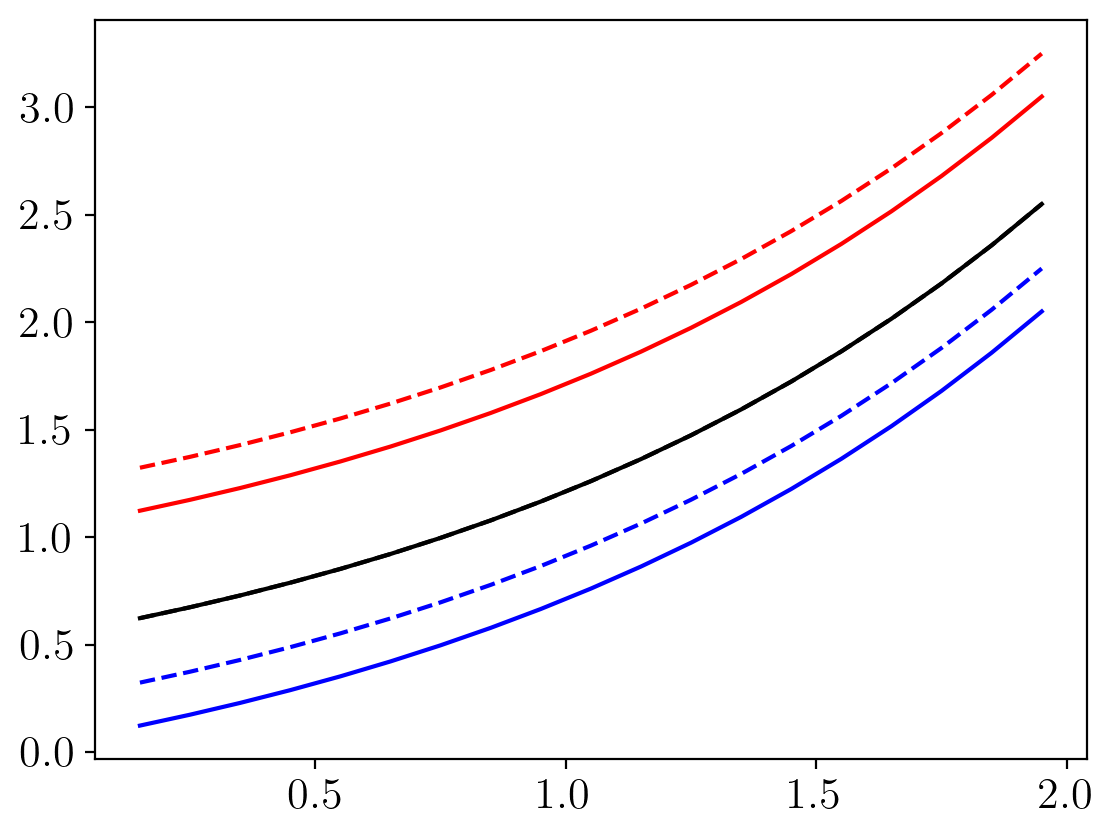

In [136]:
plt.plot(zbins, myGalaxyBs_50x50.gbias_bright(zbins), color='red')
plt.plot(zbins, myGalaxyBs_50x50.gbias_faint(zbins), color='blue')
plt.plot(zbins, myGalaxyBs_50x50.gbias_total(zbins), color='black')

plt.plot(zbins, myGalaxyBs_30x70.gbias_bright(zbins), '--',color='red')
plt.plot(zbins, myGalaxyBs_30x70.gbias_faint(zbins), '--', color='blue')
plt.plot(zbins, myGalaxyBs_30x70.gbias_total(zbins), '--', color='black')


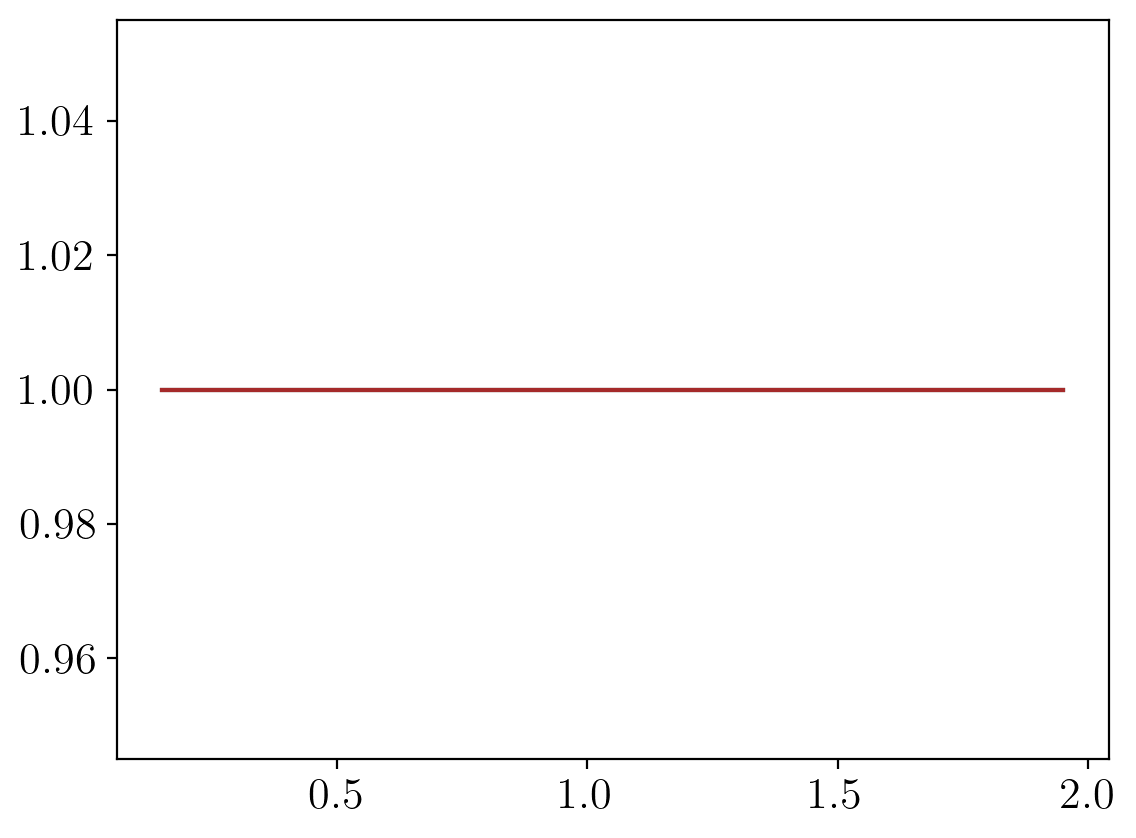

In [137]:
plt.plot(zbins, myGalaxyBs_50x50.gbias_bright(zbins)-myGalaxyBs_50x50.gbias_faint(zbins), color='black')
plt.plot(zbins, myGalaxyBs_30x70.gbias_bright(zbins)-myGalaxyBs_30x70.gbias_faint(zbins), color='brown')

Change the bias difference. Cases with less bright galaxies imply larger galaxy bias for the bright populations. 

In [138]:
myGalaxyBs_30x70_ = GalaxyBiasMultiSplit(n_split=10/3., delta=1.2)

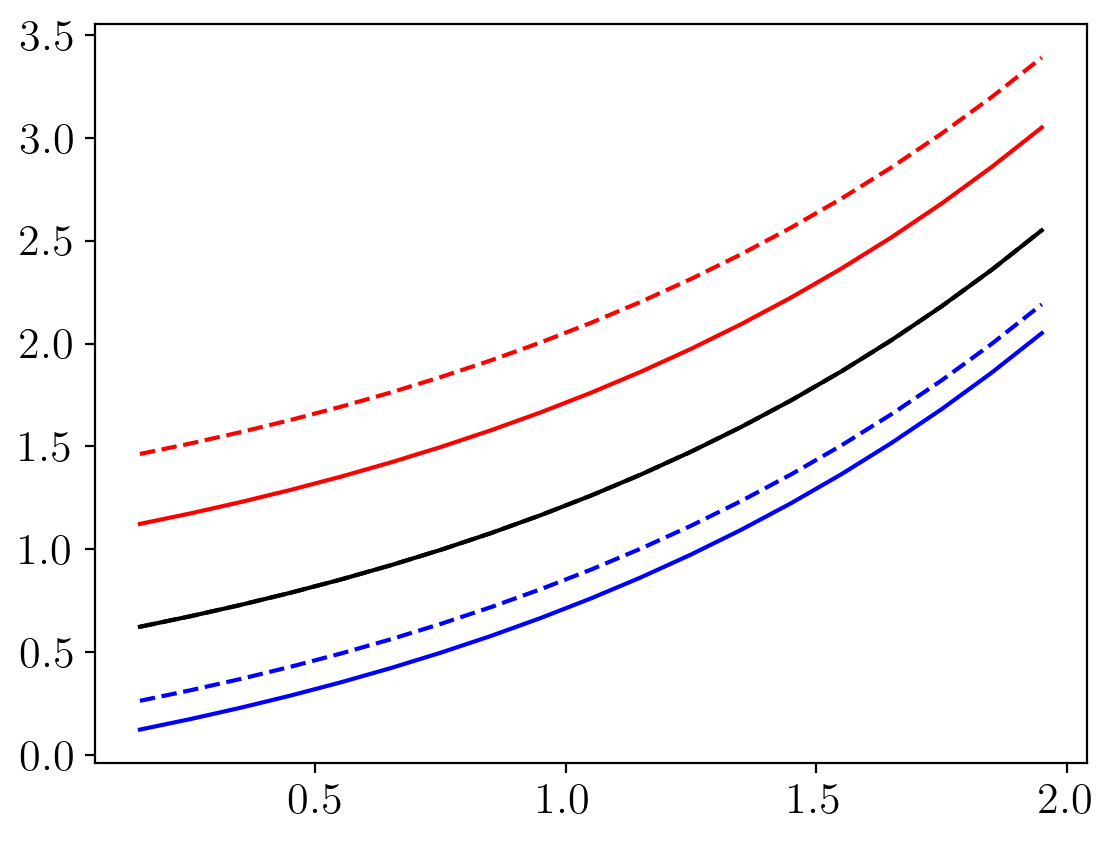

In [139]:
plt.plot(zbins, myGalaxyBs_50x50.gbias_bright(zbins), color='red')
plt.plot(zbins, myGalaxyBs_50x50.gbias_faint(zbins), color='blue')
plt.plot(zbins, myGalaxyBs_50x50.gbias_total(zbins), color='black')

plt.plot(zbins, myGalaxyBs_30x70_.gbias_bright(zbins), '--',color='red')
plt.plot(zbins, myGalaxyBs_30x70_.gbias_faint(zbins), '--', color='blue')
plt.plot(zbins, myGalaxyBs_30x70_.gbias_total(zbins), '--', color='black')

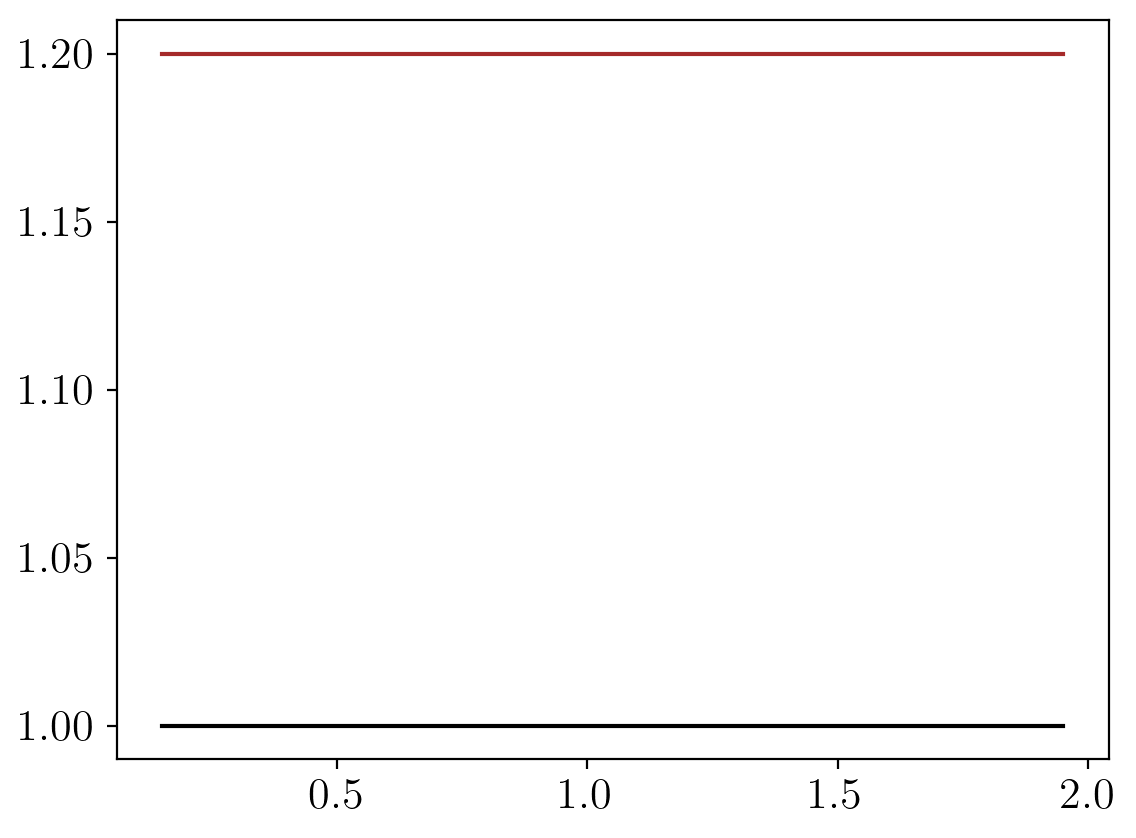

In [140]:
plt.plot(zbins, myGalaxyBs_50x50.gbias_bright(zbins)-myGalaxyBs_50x50.gbias_faint(zbins), color='black')
plt.plot(zbins, myGalaxyBs_30x70_.gbias_bright(zbins)-myGalaxyBs_30x70_.gbias_faint(zbins), color='brown')